# **Django Financial Dashboard Project**

* **Reza Barzegar**
* **Contacting Me**:
  * Telegram ID: [@Lincraf_t](https://t.me/@Lincraf_t)

# 🚀 Interactive Deep Dive: Deconstructing a Django Financial Dashboard

Welcome to this presentation. Today, we will conduct a deep dive into a complete Django web application: a sophisticated internal dashboard designed for managing financial and operational data, likely for an educational institution or a similar organization.

**Project at a Glance:**

* **Technology Stack**:
    * **Backend**: Django 5.1.4
    * **Database**: SQLite
    * **Frontend**: API-driven JavaScript with Chart.js for data visualization.
* **Core Functionality**:
    * Manages a complex database of Payments, Students, Teachers, Courses, and more.
    * Features a dynamic UI with interactive, filterable tables for all data types.
* **Standout Feature**:
    * A custom-built module in the Django admin panel that allows for bulk data importing directly from Excel files, processed using the `pandas` library.

---

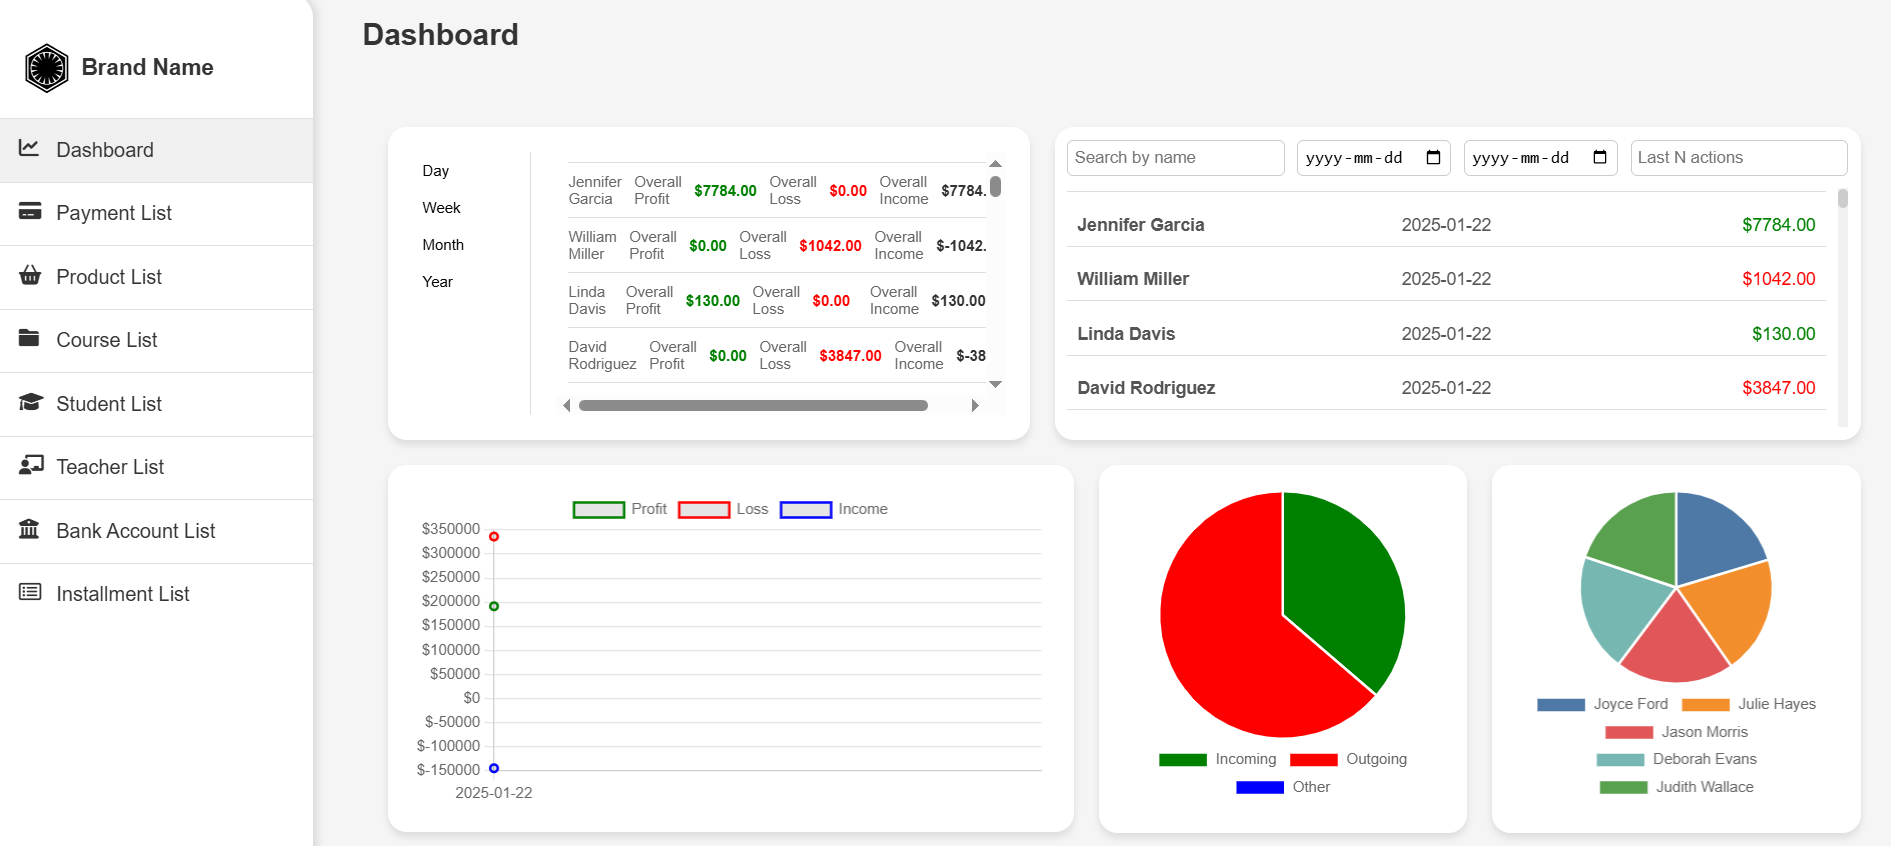

### 🗺️ Our Presentation Roadmap

Over the course of this presentation, we will systematically reconstruct and analyze the entire project. Our agenda is as follows:

1.  **Setup**: We'll begin by installing all the necessary project dependencies.
2.  **Project Reconstruction**: We will recreate the project's entire file and directory structure right here in our cloud environment.
3.  **In-Depth Analysis**: We will then take a closer look at the key files, breaking down the models, views, and templates to understand how they work together.
4.  **Live Demonstration**: Finally, we will initialize the database, create an admin user, and launch the server for a live look at the application.

Let's begin with the setup.

---

## Part 2: ⚙️ Environment Setup

Before we can build the project, our first step is to install all of its dependencies. The project includes a `requirements.txt` file that lists the necessary Python packages.

We will install all of these, plus two additional libraries:
* **`pandas`**: This powerful library is used in the admin panel to handle the Excel file importing, but it was missing from the requirements file.
* **`pyngrok`**: This is a helpful tool that will allow us to run the Django server and access it through a public URL directly from this Colab notebook, which is essential for our live demonstration later.

---

In [ ]:
!pip install django asgiref colorama django-axes django-formtools django-otp django-phonenumber-field django-ratelimit django-two-factor-auth Faker phonenumbers pypng python-dateutil qrcode six sqlparse typing_extensions tzdata pandas pyngrok

## Part 3: 🏗️ Project Reconstruction: Building the File System

Now that our environment is ready, we'll programmatically create the entire project structure and all its files. This will give us a complete, runnable version of the application within this notebook.

Below is the file structure we are about to create. It shows the main project folder `first_project/`, the core application `payments/`, and the `templates/` directory.


├── first_project/

│   ├── init.py

│   ├── asgi.py

│   ├── settings.py

│   ├── urls.py

│   └── wsgi.py

├── payments/

│   ├── init.py

│   ├── admin.py

│   ├── apps.py

│   ├── migrations/

│   │   └── init.py

│   ├── models.py

│   ├── urls.py

│   └── views.py

├── templates/

│   ├── admin/

│   │   ├── excel_upload_changelist.html

│   │   └── upload_excel.html

│   └── payments/

│       ├── dashboard.html

│       ├── login.html

│       ├── payment_list.html

│       └── ... (and all other HTML files)

└── manage.py

---

In [ ]:
!mkdir -p first_project
!mkdir -p payments/migrations
!touch payments/migrations/__init__.py
!mkdir -p templates/payments
!mkdir -p templates/admin
!mkdir -p static/images

### 3.1 Root & Project Configuration Files

We'll start by creating the core files that manage and configure the Django project. This includes `manage.py` for command-line tasks, `settings.py` for all configurations, and the main `urls.py` for routing.

---

In [ ]:
%%writefile manage.py
# --- PASTE THE FULL CONTENT of manage.py HERE ---
# This is Django's command-line utility for administrative tasks.
import os
import sys

def main():
    os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'first_project.settings')
    try:
        from django.core.management import execute_from_command_line
    except ImportError as exc:
        raise ImportError(
        ) from exc
    execute_from_command_line(sys.argv)


if __name__ == '__main__':
    main()

In [ ]:
%%writefile first_project/__init__.py
# This file tells Python that 'first_project' is a Python package.

In [ ]:
%%writefile first_project/settings.py
# --- PASTE THE FULL CONTENT of settings.py HERE ---
# This file contains all the project's configurations, including
# INSTALLED_APPS, DATABASES, TEMPLATES, and LOGIN_URL.
from pathlib import Path
import os

BASE_DIR = Path(__file__).resolve().parent.parent

SECRET_KEY = 'django-insecure--^l8levi9tf9_9m5*^1k$0+e@l!r#h&f0x5-+7-=jmt(dxs2!7'

DEBUG = True

ALLOWED_HOSTS = ['*'] # Changed for Colab/ngrok compatibility

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'payments',
]

MIDDLEWARE = [
    'django.middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.common.CommonMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',
]

ROOT_URLCONF = 'first_project.urls'

TEMPLATES = [
    {
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [os.path.join(BASE_DIR, 'templates')],
        'APP_DIRS': True,
        'OPTIONS': {
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        },
    },
]

WSGI_APPLICATION = 'first_project.wsgi.application'

DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }
}

AUTH_PASSWORD_VALIDATORS = [
    {
        'NAME': 'django.contrib.auth.password_validation.UserAttributeSimilarityValidator',
    },
    {
        'NAME': 'django.contrib.auth.password_validation.MinimumLengthValidator',
    },
    {
        'NAME': 'django.contrib.auth.password_validation.CommonPasswordValidator',
    },
    {
        'NAME': 'django.contrib.auth.password_validation.NumericPasswordValidator',
    },
]

LANGUAGE_CODE = 'en-us'

TIME_ZONE = 'UTC'

USE_I18N = True

USE_TZ = True

STATIC_URL = '/static/'
STATICFILES_DIRS = [BASE_DIR / 'static']

DEFAULT_AUTO_FIELD = 'django.db.models.BigAutoField'

MEDIA_URL = '/media/'
MEDIA_ROOT = BASE_DIR / 'media'

LOGIN_URL = 'login'
LOGIN_REDIRECT_URL = 'dashboard'

In [ ]:
%%writefile first_project/urls.py
# --- PASTE THE FULL CONTENT of the project's urls.py HERE ---
# This is the main URL router for the entire project.
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('', include('payments.urls')),
]

In [ ]:
%%writefile first_project/wsgi.py
# --- PASTE THE FULL CONTENT of wsgi.py HERE ---
import os

from django.core.wsgi import get_wsgi_application

os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'first_project.settings')

application = get_wsgi_application()

In [ ]:
%%writefile first_project/asgi.py
# --- PASTE THE FULL CONTENT of asgi.py HERE ---
import os

from django.core.asgi import get_asgi_application

os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'first_project.settings')

application = get_asgi_application()

### 3.2 The `payments` App

Now we create the files for the `payments` app, which contains the core models, views, and logic of our dashboard.

---

In [ ]:
%%writefile payments/__init__.py
# This file tells Python that 'payments' is a Python package.

In [ ]:
%%writefile payments/apps.py
# --- PASTE THE FULL CONTENT of apps.py HERE ---
from django.apps import AppConfig

class PaymentsConfig(AppConfig):
    default_auto_field = 'django.db.models.BigAutoField'
    name = 'payments'

In [ ]:
%%writefile payments/models.py
# --- PASTE THE FULL CONTENT of models.py HERE ---
# This file defines the database schema: tables, columns, and relationships.

from django.db import models
from django.core.exceptions import ValidationError


class Person(models.Model):
    name = models.CharField(max_length=255)
    national_id = models.CharField(max_length=20, unique=True)

    def clean(self):
        if not self.national_id.isdigit():
            raise ValidationError("National ID must contain only digits.")

    def __str__(self):
        return self.name


class BankAccount(models.Model):
    name = models.CharField(max_length=255)
    bank_number = models.CharField(max_length=50, unique=True)
    description = models.TextField(blank=True, null=True)

    def clean(self):
        if not self.bank_number.isdigit():
            raise ValidationError("Bank number must contain only digits.")

    def __str__(self):
        return self.name


class PaymentMethod(models.Model):
    title = models.CharField(max_length=255)
    description = models.TextField(blank=True, null=True)

    def __str__(self):
        return self.title


class PaymentType(models.Model):
    title = models.CharField(max_length=255)
    description = models.TextField(blank=True, null=True)

    def __str__(self):
        return self.title


class Status(models.Model):
    title = models.CharField(max_length=255)
    description = models.TextField(blank=True, null=True)

    def __str__(self):
        return self.title


class PaymentCategory(models.Model):
    name = models.CharField(max_length=255, unique=True)
    type = models.CharField(max_length=255, blank=True, null=True)

    def __str__(self):
        return self.name


class Payment(models.Model):
    name = models.CharField(max_length=255, db_index=True)
    amount = models.DecimalField(max_digits=10, decimal_places=2)
    datetime = models.DateTimeField(auto_now_add=True, db_index=True)
    related_person = models.ForeignKey(Person, on_delete=models.DO_NOTHING, related_name='payments')
    payment_method = models.ForeignKey(PaymentMethod, on_delete=models.DO_NOTHING, related_name='payments')
    status = models.ForeignKey(Status, on_delete=models.DO_NOTHING, related_name='payments')
    info_text = models.TextField(blank=True, null=True)
    category = models.ForeignKey(PaymentCategory, on_delete=models.DO_NOTHING, related_name='payments')
    payment_type = models.ForeignKey(PaymentType, on_delete=models.DO_NOTHING, related_name='payments')
    related_bank_account = models.ForeignKey(BankAccount, on_delete=models.DO_NOTHING, null=True, blank=True,
                                             related_name='payments')

    def __str__(self):
        return self.name


class PaymentFile(models.Model):
    payment = models.ForeignKey(Payment, on_delete=models.DO_NOTHING, related_name='files')
    file = models.FileField(upload_to='files_record/payment_files/')

    def __str__(self):
        return f"File for {self.payment.name}"


class Student(models.Model):
    person = models.ForeignKey(Person, on_delete=models.DO_NOTHING, related_name='students')
    name = models.CharField(max_length=255)
    national_id = models.CharField(max_length=20, unique=True)

    def clean(self):
        if not self.national_id.isdigit():
            raise ValidationError("National ID must contain only digits.")

    def __str__(self):
        return self.name


class Teacher(models.Model):
    person = models.ForeignKey(Person, on_delete=models.DO_NOTHING, related_name='teachers')
    name = models.CharField(max_length=255)
    national_id = models.CharField(max_length=20, unique=True)

    def clean(self):
        if not self.national_id.isdigit():
            raise ValidationError("National ID must contain only digits.")

    def __str__(self):
        return self.name


class Olympiad(models.Model):
    title = models.CharField(max_length=255)

    def __str__(self):
        return self.title


class Product(models.Model):
    title = models.CharField(max_length=255)
    description = models.TextField(blank=True, null=True)
    amount = models.DecimalField(max_digits=10, decimal_places=2, null=True)
    teacher = models.ForeignKey(Teacher, on_delete=models.DO_NOTHING, related_name='products')

    def __str__(self):
        return self.title


class Course(models.Model):
    related_product = models.ForeignKey(Product, on_delete=models.DO_NOTHING)
    title = models.CharField(max_length=255)
    session_time = models.TimeField(null=True)
    start_date = models.DateField(null=True)
    end_date = models.DateField(null=True)
    teacher = models.ForeignKey(Teacher, on_delete=models.DO_NOTHING, related_name='courses')
    students = models.ManyToManyField(Student, through='StudentAgreement')
    olympiad = models.ForeignKey(Olympiad, on_delete=models.DO_NOTHING, null=True, blank=True, related_name='courses')

    def __str__(self):
        return self.title


class StudentAgreement(models.Model):
    student = models.ForeignKey(Student, on_delete=models.DO_NOTHING)
    course = models.ForeignKey(Course, on_delete=models.DO_NOTHING)
    agreement_date = models.DateField(auto_now_add=True)
    amount = models.DecimalField(max_digits=10, decimal_places=2, null=True)
    attrs = models.TextField(blank=True, null=True)

    def __str__(self):
        return f"{self.student.name} - {self.course.title}"


class TeacherAgreement(models.Model):
    teacher = models.ForeignKey(Teacher, on_delete=models.DO_NOTHING)
    product = models.ForeignKey(Product, on_delete=models.DO_NOTHING)
    agreement_date = models.DateField(auto_now_add=True)
    amount = models.DecimalField(max_digits=10, decimal_places=2, null=True)
    attrs = models.TextField(blank=True, null=True)

    def __str__(self):
        return f"{self.teacher.name} - {self.product.title}"


class PaymentAgreement(models.Model):
    PAYMENT_DIRECTION_CHOICES = [
        ('in', 'In'),
        ('out', 'Out'),
    ]

    student_agreement = models.OneToOneField(
        'StudentAgreement',
        on_delete=models.CASCADE,
        null=True,
        blank=True,
        related_name='payment_agreement'
    )
    teacher_agreement = models.OneToOneField(
        'TeacherAgreement',
        on_delete=models.CASCADE,
        null=True,
        blank=True,
        related_name='payment_agreement'
    )
    payment_direction = models.CharField(
        max_length=3,
        choices=PAYMENT_DIRECTION_CHOICES,
        default='in'
    )
    total_amount = models.IntegerField()

    def __str__(self):
        if self.student_agreement:
            return f"Payment Agreement for Student Agreement: {self.student_agreement.id}"
        elif self.teacher_agreement:
            return f"Payment Agreement for Teacher Agreement: {self.teacher_agreement.id}"
        return "Payment Agreement (No Agreement Linked)"


class Installment(models.Model):
    payment_agreement = models.ForeignKey(
        'PaymentAgreement',
        on_delete=models.CASCADE,
        related_name='installments'
    )
    amount = models.FloatField()
    due_date = models.DateTimeField()
    received_date = models.DateTimeField(null=True, blank=True)
    status = models.ForeignKey(
        'InstallmentStatus',
        on_delete=models.SET_NULL,
        null=True,
        blank=True,
        related_name='installments'
    )

    def __str__(self):
        return f"Installment {self.id} for Payment Agreement {self.payment_agreement.id}"


class InstallmentStatus(models.Model):
    title = models.CharField(max_length=255)

    def __str__(self):
        return self.title


In [ ]:
%%writefile payments/admin.py
# --- PASTE THE FULL CONTENT of admin.py HERE ---
# This file customizes the admin interface and adds the Excel upload feature.
from django.contrib import admin
from django.urls import path
from django.shortcuts import render, redirect
from django.http import JsonResponse
from django.contrib.auth.decorators import user_passes_test
from django.contrib.admin.views.decorators import staff_member_required
from django.contrib.auth import views as auth_views
from .models import (
    Person, BankAccount, PaymentMethod, PaymentType, Status,
    PaymentCategory, Payment, Student, Teacher, Olympiad, Course, Product,
    StudentAgreement, TeacherAgreement, PaymentAgreement, Installment, InstallmentStatus, PaymentFile
)
import pandas as pd


def staff_or_superuser_required(view_func):
    decorated_view_func = user_passes_test(
        lambda u: u.is_active and (u.is_staff or u.is_superuser),
        login_url='/admin/login/'
    )(view_func)
    return decorated_view_func


@staff_or_superuser_required
def custom_admin_index(request):
    return admin.site.index(request)


@staff_or_superuser_required
def custom_admin_app_index(request, app_label):
    return admin.site.app_index(request, app_label)


def custom_admin_login(request):
    if request.user.is_authenticated and request.user.is_staff:
        return redirect('/admin/')
    return auth_views.LoginView.as_view(template_name='admin/login.html')(request)


def custom_admin_logout(request):
    return auth_views.LogoutView.as_view(next_page='/admin/login/')(request)


class ExcelUploadAdmin(admin.ModelAdmin):
    change_list_template = "admin/excel_upload_changelist.html"

    def get_urls(self):
        urls = super().get_urls()
        custom_urls = [
            path('upload-excel/', self.admin_site.admin_view(self.upload_excel),
                 name=f'{self.model.__name__.lower()}_upload_excel'),
        ]
        return custom_urls + urls

    def changelist_view(self, request, extra_context=None):
        extra_context = extra_context or {}
        extra_context['model_name'] = self.model.__name__.lower()
        return super().changelist_view(request, extra_context=extra_context)

    def upload_excel(self, request):
        if request.method == 'POST' and request.headers.get('x-requested-with') == 'XMLHttpRequest':
            excel_file = request.FILES.get('file')
            if excel_file:
                try:
                    df = pd.read_excel(excel_file)
                    if df.empty:
                        return JsonResponse({'success': False, 'message': 'The Excel file is empty.'})
                    model = self.model
                    self.process_excel_data(df, model)
                    return JsonResponse(
                        {'success': True, 'message': 'Excel file uploaded and data processed successfully!'})
                except Exception as e:
                    return JsonResponse({'success': False, 'message': f'Error processing Excel file: {e}'})
            else:
                return JsonResponse({'success': False, 'message': 'No file uploaded.'})
        else:
            return render(request, 'admin/upload_excel.html', {'model_name': self.model.__name__.lower()})

    def process_excel_data(self, df, model):
        for index, row in df.iterrows():
            if row.isnull().all():
                continue
            if model == Person:
                self.process_person(row)
            elif model == BankAccount:
                self.process_bank_account(row)
            elif model == PaymentMethod:
                self.process_payment_method(row)
            elif model == PaymentType:
                self.process_payment_type(row)
            elif model == Status:
                self.process_status(row)
            elif model == PaymentCategory:
                self.process_payment_category(row)
            elif model == Payment:
                self.process_payment(row)
            elif model == Student:
                self.process_student(row)
            elif model == Teacher:
                self.process_teacher(row)
            elif model == Olympiad:
                self.process_olympiad(row)
            elif model == Product:
                self.process_product(row)
            elif model == Course:
                self.process_course(row)
            elif model == StudentAgreement:
                self.process_student_agreement(row)
            elif model == TeacherAgreement:
                self.process_teacher_agreement(row)
            elif model == PaymentAgreement:
                self.process_payment_agreement(row)
            elif model == Installment:
                self.process_installment(row)
            elif model == InstallmentStatus:
                self.process_installment_status(row)
            elif model == PaymentFile:
                self.process_payment_file(row)

    def process_person(self, row):
        person_name = row['person_name'] if pd.notna(row['person_name']) else None
        person_national_id = row['person_national_id'] if pd.notna(row['person_national_id']) else None
        if person_name and person_national_id:
            Person.objects.get_or_create(name=person_name, national_id=person_national_id)

    def process_bank_account(self, row):
        bank_name = row['bank_name'] if pd.notna(row['bank_name']) else None
        bank_number = row['bank_number'] if pd.notna(row['bank_number']) else None
        bank_description = row['bank_description'] if pd.notna(row['bank_description']) else None
        if bank_name and bank_number:
            BankAccount.objects.get_or_create(name=bank_name, bank_number=bank_number,
                                              defaults={'description': bank_description})

    def process_payment_method(self, row):
        title = row['title'] if pd.notna(row['title']) else None
        description = row['description'] if pd.notna(row['description']) else None
        if title:
            PaymentMethod.objects.get_or_create(title=title, defaults={'description': description})

    def process_payment_type(self, row):
        title = row['title'] if pd.notna(row['title']) else None
        description = row['description'] if pd.notna(row['description']) else None
        if title:
            PaymentType.objects.get_or_create(title=title, defaults={'description': description})

    def process_status(self, row):
        title = row['title'] if pd.notna(row['title']) else None
        description = row['description'] if pd.notna(row['description']) else None
        if title:
            Status.objects.get_or_create(title=title, defaults={'description': description})

    def process_payment_category(self, row):
        name = row['name'] if pd.notna(row['name']) else None
        type = row['type'] if pd.notna(row['type']) else None
        if name:
            PaymentCategory.objects.get_or_create(name=name, defaults={'type': type})

    def process_payment(self, row):
        name = row['name'] if pd.notna(row['name']) else None
        amount = row['amount'] if pd.notna(row['amount']) else None
        related_person = Person.objects.filter(id=row['related_person']).first() if pd.notna(
            row['related_person']) else None
        payment_method = PaymentMethod.objects.filter(id=row['payment_method']).first() if pd.notna(
            row['payment_method']) else None
        status = Status.objects.filter(id=row['status']).first() if pd.notna(row['status']) else None
        category = PaymentCategory.objects.filter(id=row['category']).first() if pd.notna(row['category']) else None
        payment_type = PaymentType.objects.filter(id=row['payment_type']).first() if pd.notna(
            row['payment_type']) else None
        related_bank_account = BankAccount.objects.filter(id=row['related_bank_account']).first() if pd.notna(
            row['related_bank_account']) else None

        if not payment_type:
            raise ValueError(f"Payment type is missing or invalid for payment: {name}")

        if name and amount:
            Payment.objects.get_or_create(
                name=name,
                amount=amount,
                related_person=related_person,
                payment_method=payment_method,
                status=status,
                category=category,
                payment_type=payment_type,
                related_bank_account=related_bank_account
            )

    def process_student(self, row):
        name = row['name'] if pd.notna(row['name']) else None
        national_id = row['national_id'] if pd.notna(row['national_id']) else None
        person = Person.objects.filter(id=row['person']).first() if pd.notna(row['person']) else None
        if name and national_id and person:
            Student.objects.get_or_create(name=name, national_id=national_id, person=person)

    def process_teacher(self, row):
        name = row['name'] if pd.notna(row['name']) else None
        national_id = row['national_id'] if pd.notna(row['national_id']) else None
        person = Person.objects.filter(id=row['person']).first() if pd.notna(row['person']) else None
        if name and national_id and person:
            Teacher.objects.get_or_create(name=name, national_id=national_id, person=person)

    def process_olympiad(self, row):
        title = row['title'] if pd.notna(row['title']) else None
        if title:
            Olympiad.objects.get_or_create(title=title)

    def process_product(self, row):
        title = row['title'] if pd.notna(row['title']) else None
        description = row['description'] if pd.notna(row['description']) else None
        amount = row['amount'] if pd.notna(row['amount']) else None
        teacher = Teacher.objects.filter(id=row['teacher']).first() if pd.notna(row['teacher']) else None
        if title and teacher:
            Product.objects.get_or_create(title=title, teacher=teacher,
                                          defaults={'description': description, 'amount': amount})

    def process_course(self, row):
        title = row['title'] if pd.notna(row['title']) else None
        session_time = row['session_time'] if pd.notna(row['session_time']) else None
        start_date = row['start_date'] if pd.notna(row['start_date']) else None
        end_date = row['end_date'] if pd.notna(row['end_date']) else None
        teacher = Teacher.objects.filter(id=row['teacher']).first() if pd.notna(row['teacher']) else None
        olympiad = Olympiad.objects.filter(id=row['olympiad']).first() if pd.notna(row['olympiad']) else None
        if title and teacher:
            Course.objects.get_or_create(
                title=title,
                session_time=session_time,
                start_date=start_date,
                end_date=end_date,
                teacher=teacher,
                olympiad=olympiad
            )

    def process_student_agreement(self, row):
        student = Student.objects.filter(id=row['student']).first() if pd.notna(row['student']) else None
        course = Course.objects.filter(id=row['course']).first() if pd.notna(row['course']) else None
        amount = row['amount'] if pd.notna(row['amount']) else None
        attrs = row['attrs'] if pd.notna(row['attrs']) else None
        if student and course:
            StudentAgreement.objects.get_or_create(student=student, course=course,
                                                   defaults={'amount': amount, 'attrs': attrs})

    def process_teacher_agreement(self, row):
        teacher = Teacher.objects.filter(id=row['teacher']).first() if pd.notna(row['teacher']) else None
        product = Product.objects.filter(id=row['product']).first() if pd.notna(row['product']) else None
        amount = row['amount'] if pd.notna(row['amount']) else None
        attrs = row['attrs'] if pd.notna(row['attrs']) else None
        if teacher and product:
            TeacherAgreement.objects.get_or_create(teacher=teacher, product=product,
                                                   defaults={'amount': amount, 'attrs': attrs})

    def process_payment_agreement(self, row):
        student_agreement = StudentAgreement.objects.filter(id=row['student_agreement']).first() if pd.notna(
            row['student_agreement']) else None
        teacher_agreement = TeacherAgreement.objects.filter(id=row['teacher_agreement']).first() if pd.notna(
            row['teacher_agreement']) else None
        payment_direction = row['payment_direction'] if pd.notna(row['payment_direction']) else 'in'
        total_amount = row['total_amount'] if pd.notna(row['total_amount']) else None
        if student_agreement or teacher_agreement:
            PaymentAgreement.objects.get_or_create(
                student_agreement=student_agreement,
                teacher_agreement=teacher_agreement,
                defaults={'payment_direction': payment_direction, 'total_amount': total_amount}
            )

    def process_installment(self, row):
        payment_agreement = PaymentAgreement.objects.filter(id=row['payment_agreement']).first() if pd.notna(
            row['payment_agreement']) else None
        amount = row['amount'] if pd.notna(row['amount']) else None
        due_date = row['due_date'] if pd.notna(row['due_date']) else None
        received_date = row['received_date'] if pd.notna(row['received_date']) else None
        status = InstallmentStatus.objects.filter(id=row['status']).first() if pd.notna(row['status']) else None
        if payment_agreement and amount and due_date:
            Installment.objects.get_or_create(
                payment_agreement=payment_agreement,
                amount=amount,
                due_date=due_date,
                defaults={'received_date': received_date, 'status': status}
            )

    def process_installment_status(self, row):
        title = row['title'] if pd.notna(row['title']) else None
        if title:
            InstallmentStatus.objects.get_or_create(title=title)

    def process_payment_file(self, row):
        payment = Payment.objects.filter(id=row['payment']).first() if pd.notna(row['payment']) else None
        file = row['file'] if pd.notna(row['file']) else None
        if payment and file:
            PaymentFile.objects.get_or_create(payment=payment, file=file)


@admin.register(Person)
class PersonAdmin(ExcelUploadAdmin):
    list_display = ['name', 'national_id']
    search_fields = ['name', 'national_id']


@admin.register(BankAccount)
class BankAccountAdmin(ExcelUploadAdmin):
    list_display = ['name', 'bank_number']
    search_fields = ['name', 'bank_number']


@admin.register(PaymentMethod)
class PaymentMethodAdmin(ExcelUploadAdmin):
    list_display = ['title', 'description']
    search_fields = ['title', 'description']


@admin.register(PaymentType)
class PaymentTypeAdmin(ExcelUploadAdmin):
    list_display = ['title', 'description']
    search_fields = ['title', 'description']


@admin.register(Status)
class StatusAdmin(ExcelUploadAdmin):
    list_display = ['title', 'description']
    search_fields = ['title', 'description']


@admin.register(PaymentCategory)
class PaymentCategoryAdmin(ExcelUploadAdmin):
    list_display = ['name', 'type']
    search_fields = ['name', 'type']


@admin.register(Payment)
class PaymentAdmin(ExcelUploadAdmin):
    list_display = ['name', 'amount', 'category', 'payment_type', 'status', 'related_person', 'related_bank_account']
    list_filter = ['payment_type', 'status', 'category', 'payment_method']
    search_fields = ['name', 'related_person__name', 'related_bank_account__name']
    autocomplete_fields = ['related_person', 'related_bank_account', 'payment_method', 'payment_type', 'status']


@admin.register(PaymentFile)
class PaymentFileAdmin(ExcelUploadAdmin):
    list_display = ['payment', 'file']
    autocomplete_fields = ['payment']


@admin.register(Student)
class StudentAdmin(ExcelUploadAdmin):
    list_display = ['name', 'national_id']
    search_fields = ['name', 'national_id']
    autocomplete_fields = ['person']


@admin.register(Teacher)
class TeacherAdmin(ExcelUploadAdmin):
    list_display = ['name', 'national_id']
    search_fields = ['name', 'national_id']
    autocomplete_fields = ['person']


@admin.register(Olympiad)
class OlympiadAdmin(ExcelUploadAdmin):
    list_display = ['title']
    search_fields = ['title']


@admin.register(Course)
class CourseAdmin(ExcelUploadAdmin):
    list_display = ['title', 'session_time', 'start_date', 'end_date', 'teacher', 'olympiad']
    search_fields = ['title', 'teacher__name', 'olympiad__title']
    autocomplete_fields = ['teacher', 'olympiad']


@admin.register(Product)
class ProductAdmin(ExcelUploadAdmin):
    list_display = ['title', 'amount', 'teacher']
    search_fields = ['title', 'teacher__name']
    autocomplete_fields = ['teacher']


@admin.register(StudentAgreement)
class StudentAgreementAdmin(ExcelUploadAdmin):
    list_display = ['student', 'course', 'agreement_date', 'amount', 'attrs']
    search_fields = ['student__name', 'course__title']
    autocomplete_fields = ['student', 'course']


@admin.register(TeacherAgreement)
class TeacherAgreementAdmin(ExcelUploadAdmin):
    list_display = ['teacher', 'product', 'agreement_date', 'amount', 'attrs']
    search_fields = ['teacher__name', 'product__title']
    autocomplete_fields = ['teacher', 'product']


@admin.register(PaymentAgreement)
class PaymentAgreementAdmin(ExcelUploadAdmin):
    list_display = ['id', 'student_agreement', 'teacher_agreement', 'payment_direction', 'total_amount']
    search_fields = ['student_agreement__id', 'teacher_agreement__id']
    list_filter = ['payment_direction']
    autocomplete_fields = ['student_agreement', 'teacher_agreement']


@admin.register(Installment)
class InstallmentAdmin(ExcelUploadAdmin):
    list_display = ['id', 'payment_agreement', 'amount', 'due_date', 'received_date', 'status']
    search_fields = ['payment_agreement__id']
    list_filter = ['status', 'due_date']
    autocomplete_fields = ['payment_agreement']


@admin.register(InstallmentStatus)
class InstallmentStatusAdmin(ExcelUploadAdmin):
    list_display = ['id', 'title']
    search_fields = ['title']


admin.site.index = staff_or_superuser_required(admin.site.index)
admin.site.app_index = staff_or_superuser_required(admin.site.app_index)
admin.site.login = custom_admin_login
admin.site.logout = custom_admin_logout


In [ ]:
%%writefile payments/views.py
# --- PASTE THE FULL CONTENT of views.py HERE ---
# This file contains the application's core logic for handling web requests.
from django.shortcuts import render, redirect, get_object_or_404
from django.http import JsonResponse
from django.contrib.auth.decorators import login_required, user_passes_test
from django.contrib.auth import authenticate, login, logout
from django.views.decorators.csrf import csrf_protect
from .models import Payment, PaymentCategory, Course, Product, Student, Teacher, \
    BankAccount, Installment


def is_staff_or_superuser(user):
    return user.is_staff or user.is_superuser


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def dashboard_view(request):
    return render(request, 'payments/dashboard.html')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def payment_list(request):
    categories = PaymentCategory.objects.all()
    payments = Payment.objects.all()
    return render(request, 'payments/payment_list.html', {
        'categories': categories,
        'payments': payments
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def payment_detail(request, payment_id):
    payment = get_object_or_404(Payment, id=payment_id)
    return render(request, 'payments/payment_detail.html', {
        'payment': payment
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def filter_payments(request):
    is_ajax = request.headers.get('X-Requested-With') == 'XMLHttpRequest'

    if request.method == 'GET' and is_ajax:
        category_id = request.GET.get('category_id')
        status_id = request.GET.get('status_id')
        payments = Payment.objects.all()

        if category_id:
            payments = payments.filter(category_id=category_id)
        if status_id:
            payments = payments.filter(status_id=status_id)

        data = [{
            'id': payment.id,
            'name': payment.name,
            'amount': str(payment.amount),
            'datetime': payment.datetime.strftime('%Y-%m-%d %H:%M:%S'),
            'related_person': payment.related_person.name,
            'payment_method': payment.payment_method.title,
            'status': payment.status.title,
            'category': payment.category.name,
            'payment_type': payment.payment_type.title,
            'related_bank_account': payment.related_bank_account.name if payment.related_bank_account else None
        } for payment in payments]

        return JsonResponse(data, safe=False)
    return JsonResponse({'error': 'Invalid request'}, status=400)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def student_list(request):
    return render(request, 'payments/student_list.html')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_students(request):
    students = Student.objects.all().values('name', 'national_id', 'id')
    return JsonResponse(list(students), safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def teacher_list(request):
    return render(request, 'payments/teacher_list.html')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_teachers(request):
    teachers = Teacher.objects.all().values('name', 'national_id', 'id')
    return JsonResponse(list(teachers), safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def bank_account_list(request):
    return render(request, 'payments/bank_account_list.html')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def product_list(request):
    return render(request, 'payments/product_list.html')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_products(request):
    products = Product.objects.all().values('title', 'amount', 'teacher__name', 'id')
    return JsonResponse(list(products), safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def course_list(request):
    return render(request, 'payments/course_list.html')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_courses(request):
    courses = Course.objects.all().values('title', 'session_time', 'start_date', 'end_date', 'teacher__name',
                                          'olympiad__title', 'id')
    return JsonResponse(list(courses), safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_payments(request):
    payments = Payment.objects.all().values('name', 'amount', 'id')
    return JsonResponse(list(payments), safe=False)


@csrf_protect
def login_view(request):
    session_key = request.session.session_key
    if not session_key:
        request.session.save()
        session_key = request.session.session_key

    attempts = request.session.get('login_attempts', 0)

    if attempts >= 5:
        return render(request, 'payments/login.html', {'error': 'Too many login attempts. Please try again later.'})

    if request.method == 'POST':
        username = request.POST.get('username')
        password = request.POST.get('password')

        if not username:
            return render(request, 'payments/login.html', {'error': 'Username is unfilled'})
        if not password:
            return render(request, 'payments/login.html', {'error': 'Password is unfilled'})

        user = authenticate(request, username=username, password=password)
        if user is not None and (user.is_staff or user.is_superuser):
            login(request, user)
            request.session['login_attempts'] = 0
            return redirect('dashboard')
        else:
            request.session['login_attempts'] = attempts + 1
            return render(request, 'payments/login.html',
                          {'error': 'Username or password is incorrect or you do not have access'})

    return render(request, 'payments/login.html')


def logout_view(request):
    logout(request)
    return redirect('login')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_student_detail(request, student_id):
    student = get_object_or_404(Student, id=student_id)

    person = student.person

    payments = Payment.objects.filter(related_person=person).values(
        'name', 'amount', 'datetime', 'status__title',
        'payment_method__title', 'category__name',
        'payment_type__title', 'related_bank_account__name'
    )

    student_data = {
        'name': student.name,
        'national_id': student.national_id,
        'payments': list(payments)
    }
    return JsonResponse(student_data, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_teacher_detail(request, teacher_id):
    teacher = get_object_or_404(Teacher, id=teacher_id)

    person = teacher.person

    payments = Payment.objects.filter(related_person=person).values(
        'name', 'amount', 'datetime', 'status__title',
        'payment_method__title', 'category__name',
        'payment_type__title', 'related_bank_account__name'
    )

    courses = Course.objects.filter(teacher=teacher).values(
        'title', 'session_time', 'start_date', 'end_date', 'olympiad__title'
    )
    products = Product.objects.filter(teacher=teacher).values(
        'title', 'amount', 'description'
    )

    teacher_data = {
        'name': teacher.name,
        'national_id': teacher.national_id,
        'payments': list(payments),
        'courses': list(courses),
        'products': list(products)
    }

    return JsonResponse(teacher_data, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_course_detail(request, course_id):
    course = get_object_or_404(Course, id=course_id)
    products = Product.objects.filter(teacher=course.teacher).values('title', 'amount', 'description')

    course_data = {
        'title': course.title,
        'session_time': course.session_time,
        'start_date': course.start_date,
        'end_date': course.end_date,
        'teacher': course.teacher.name,
        'olympiad': course.olympiad.title if course.olympiad else 'None',
        'products': list(products)
    }
    return JsonResponse(course_data, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_product_detail(request, product_id):
    product = get_object_or_404(Product, id=product_id)
    courses = Course.objects.filter(teacher=product.teacher).values('title', 'session_time', 'start_date', 'end_date',
                                                                    'olympiad__title')

    product_data = {
        'title': product.title,
        'amount': product.amount,
        'teacher': product.teacher.name,
        'courses': list(courses)
    }
    return JsonResponse(product_data, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def bank_account_detail_page(request, bank_account_id):
    bank_account = get_object_or_404(BankAccount, id=bank_account_id)
    payments = Payment.objects.filter(related_bank_account=bank_account).values(
        'name', 'amount', 'datetime', 'status__title',
        'payment_method__title', 'category__name',
        'payment_type__title', 'related_person__name'
    )
    return render(request, 'payments/bank_account_detail.html', {
        'bank_account': bank_account,
        'payments': payments
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_bank_accounts(request):
    bank_accounts = BankAccount.objects.all().values('id', 'name', 'bank_number')
    bank_accounts_list = list(bank_accounts)

    # Add related payments to each bank account
    for bank_account in bank_accounts_list:
        payments = Payment.objects.filter(related_bank_account_id=bank_account['id']).values(
            'name', 'amount', 'datetime', 'status__title',
            'payment_method__title', 'category__name',
            'payment_type__title', 'related_person__name'
        )
        bank_account['payments'] = list(payments)

    return JsonResponse(bank_accounts_list, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_payment_detail(request, payment_id):
    payment = get_object_or_404(Payment, id=payment_id)

    payment_data = {
        'name': payment.name,
        'amount': payment.amount,
        'datetime': payment.datetime,
        'status': payment.status.title,
        'payment_method': payment.payment_method.title,
        'category': payment.category.name,
        'payment_type': payment.payment_type.title,
        'related_person': payment.related_person.name,
        'related_bank_account': payment.related_bank_account.name if payment.related_bank_account else None
    }
    return JsonResponse(payment_data, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_bank_account_detail(request, bank_account_id):
    bank_account = get_object_or_404(BankAccount, id=bank_account_id)
    payments = Payment.objects.filter(related_bank_account=bank_account).values(
        'name', 'amount', 'datetime', 'status__title',
        'payment_method__title', 'category__name',
        'payment_type__title', 'related_person__name'
    )
    data = {
        'name': bank_account.name,
        'bank_number': bank_account.bank_number,
        'payments': list(payments)
    }
    return JsonResponse(data, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def teacher_detail_page(request, teacher_id):
    teacher = get_object_or_404(Teacher, id=teacher_id)
    person = teacher.person

    payments = Payment.objects.filter(related_person=person).values(
        'name', 'amount', 'datetime', 'status__title',
        'payment_method__title', 'category__name',
        'payment_type__title', 'related_bank_account__name'
    )

    courses = Course.objects.filter(teacher=teacher).values(
        'title', 'session_time', 'start_date', 'end_date', 'olympiad__title'
    )

    products = Product.objects.filter(teacher=teacher).values(
        'title', 'amount', 'description'
    )

    return render(request, 'payments/teacher_detail.html', {
        'teacher': teacher,
        'payments': payments,
        'courses': courses,
        'products': products
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def student_detail_page(request, student_id):
    student = get_object_or_404(Student, id=student_id)
    person = student.person

    payments = Payment.objects.filter(related_person=person).values(
        'name', 'amount', 'datetime', 'status__title',
        'payment_method__title', 'category__name',
        'payment_type__title', 'related_bank_account__name'
    )

    return render(request, 'payments/student_detail.html', {
        'student': student,
        'payments': payments
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def course_detail_page(request, course_id):
    course = get_object_or_404(Course, id=course_id)
    products = Product.objects.filter(teacher=course.teacher).values('title', 'amount', 'description')

    return render(request, 'payments/course_detail.html', {
        'course': course,
        'products': products
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def product_detail_page(request, product_id):
    product = get_object_or_404(Product, id=product_id)
    courses = Course.objects.filter(teacher=product.teacher).values('title', 'session_time', 'start_date', 'end_date',
                                                                    'olympiad__title')

    return render(request, 'payments/product_detail.html', {
        'product': product,
        'courses': courses
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def payment_list(request):
    categories = PaymentCategory.objects.all()
    payments = Payment.objects.all()
    return render(request, 'payments/payment_list.html', {
        'categories': categories,
        'payments': payments
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def payment_detail(request, payment_id):
    payment = get_object_or_404(Payment, id=payment_id)
    return render(request, 'payments/payment_detail.html', {
        'payment': payment
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_payments(request):
    payments = Payment.objects.all().values('id', 'name', 'amount', 'datetime', 'status__title',
                                            'payment_method__title', 'category__name', 'payment_type__title',
                                            'related_person__name', 'related_bank_account__name')
    return JsonResponse(list(payments), safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_payment_detail(request, payment_id):
    payment = get_object_or_404(Payment, id=payment_id)
    payment_data = {
        'id': payment.id,
        'name': payment.name,
        'amount': payment.amount,
        'datetime': payment.datetime.strftime('%Y-%m-%d %H:%M:%S'),
        'status': payment.status.title,
        'payment_method': payment.payment_method.title,
        'category': payment.category.name,
        'payment_type': payment.payment_type.title,
        'related_person': payment.related_person.name,
        'related_bank_account': payment.related_bank_account.name if payment.related_bank_account else None,
        'info_text': payment.info_text
    }
    return JsonResponse(payment_data, safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def installment_list(request):
    return render(request, 'payments/installment_list.html')


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_installments(request):
    installments = Installment.objects.all().values(
        'id', 'amount', 'due_date', 'received_date', 'status__title', 'payment_agreement__id'
    )
    return JsonResponse(list(installments), safe=False)


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def installment_detail_page(request, installment_id):
    installment = get_object_or_404(Installment, id=installment_id)
    return render(request, 'payments/installment_detail.html', {
        'installment': installment
    })


@login_required
@user_passes_test(is_staff_or_superuser, login_url='login')
def api_installment_detail(request, installment_id):
    installment = get_object_or_404(Installment, id=installment_id)
    installment_data = {
        'id': installment.id,
        'amount': installment.amount,
        'due_date': installment.due_date.strftime('%Y-%m-%d %H:%M:%S'),
        'received_date': installment.received_date.strftime('%Y-%m-%d %H:%M:%S') if installment.received_date else None,
        'status': installment.status.title if installment.status else None,
        'payment_agreement_id': installment.payment_agreement.id,
    }
    return JsonResponse(installment_data, safe=False)


In [ ]:
%%writefile payments/urls.py
# --- PASTE THE FULL CONTENT of the app's urls.py HERE ---
# This file routes URLs to their corresponding views within the payments app.
from django.urls import path
from . import views

urlpatterns = [
    path('', views.login_view, name='login'),
    path('dashboard/', views.dashboard_view, name='dashboard'),
    path('logout/', views.logout_view, name='logout'),

    # Page URLs
    path('payments/', views.payment_list, name='payment_list'),
    path('payment-detail/<int:payment_id>/', views.payment_detail, name='payment_detail'),
    path('students/', views.student_list, name='student_list'),
    path('student-detail/<int:student_id>/', views.student_detail_page, name='student_detail'),
    path('teachers/', views.teacher_list, name='teacher_list'),
    path('teacher-detail/<int:teacher_id>/', views.teacher_detail_page, name='teacher_detail'),
    path('products/', views.product_list, name='product_list'),
    path('product-detail/<int:product_id>/', views.product_detail_page, name='product_detail'),
    path('courses/', views.course_list, name='course_list'),
    path('course-detail/<int:course_id>/', views.course_detail_page, name='course_detail'),
    path('bank-accounts/', views.bank_account_list, name='bank_account_list'),
    path('bank-account-detail/<int:bank_account_id>/', views.bank_account_detail_page, name='bank_account_detail'),
    path('installments/', views.installment_list, name='installment_list'),
    path('installment-detail/<int:installment_id>/', views.installment_detail_page, name='installment_detail'),

    # API URLs
    path('api/payments/', views.api_payments, name='api_payments'),
    path('api/payment-detail/<int:payment_id>/', views.api_payment_detail, name='api_payment_detail'),
    path('api/students/', views.api_students, name='api_students'),
    path('api/teachers/', views.api_teachers, name='api_teachers'),
    path('api/products/', views.api_products, name='api_products'),
    path('api/courses/', views.api_courses, name='api_courses'),
    path('api/bank-accounts/', views.api_bank_accounts, name='api_bank_accounts'),
    path('api/installments/', views.api_installments, name='api_installments'),
    path('filter-payments/', views.filter_payments, name='filter_payments'),
]

### 3.3 The Presentation Layer (`templates/`)

Finally, we'll create all the HTML files that define the structure and layout of the user interface. These files also contain the client-side JavaScript that makes the dashboard interactive.

---

In [ ]:
%%writefile templates/payments/login.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Login</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;500;700&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Roboto', sans-serif;
            background-color: #f4f4f9;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }

        .login-container {
            background-color: #ffffff;
            padding: 40px;
            border-radius: 10px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            width: 300px;
            text-align: center;
        }

        .login-container h2 {
            color: #0056b3;
            margin-bottom: 20px;
            font-size: 24px;
            font-weight: 700;
        }

        .input-field {
            width: calc(100% - 24px);
            padding: 12px;
            margin: 10px 0 5px;
            border: 1px solid #ddd;
            border-radius: 8px;
            font-size: 16px;
            outline: none;
            text-align: center;
            transition: border-color 0.3s ease;
            display: block;
            margin-left: auto;
            margin-right: auto;
        }

        .input-field:focus {
            border-color: #0056b3;
        }

        .password-wrapper {
            position: relative;
            width: 100%;
            text-align: center;
        }

        .password-wrapper .eye {
            position: absolute;
            top: 50%;
            right: 15px;
            transform: translateY(-50%);
            cursor: pointer;
            color: #333;
            font-size: 18px;
        }

        .login-button {
            background-color: #0056b3;
            color: #ffffff;
            border: none;
            padding: 10px 20px;
            border-radius: 8px;
            cursor: pointer;
            font-size: 16px;
            font-weight: 500;
            width: 100%;
            transition: background-color 0.3s ease;
            margin-top: 20px;
        }

        .login-button:hover {
            background-color: #003d82;
        }

        .error-message {
            color: #e74c3c;
            font-size: 14px;
            margin-top: 5px;
            text-align: center;
        }
        .input-field {
            width: calc(100% - 24px);
            padding: 12px;
            margin: 10px 0 5px;
            border: 1px solid #ddd;
            border-radius: 8px;
            font-size: 16px;
            outline: none;
            text-align: center;
            transition: border-color 0.3s ease;
            display: block;
            margin-left: auto;
            margin-right: auto;
            background-color: #ffffff;
            color: #000;
        }

        .input-field:-webkit-autofill,
        .input-field:-webkit-autofill:hover,
        .input-field:-webkit-autofill:focus,
        .input-field:-webkit-autofill:active {
            -webkit-box-shadow: 0 0 0 30px white inset !important;
            -webkit-text-fill-color: #000 !important;
        }
    </style>
</head>
<body>
    <div class="login-container">
        <h2>Log In</h2>
        <form method="post" action="{% url 'login' %}">
            {% csrf_token %}
            <input type="text" name="username" id="username" class="input-field" placeholder="Enter username">
            <div class="error-message" id="usernameError"></div>

            <div class="password-wrapper">
                <input type="password" name="password" id="password" class="input-field" placeholder="Enter password">
                <span class="eye" onclick="togglePasswordVisibility('password', this)">
                    <svg id="eyeIcon" fill="none" height="24" viewBox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
                        <g stroke="#000" stroke-linecap="round" stroke-linejoin="round" stroke-width="2">
                            <path d="m1 12s4-8 11-8 11 8 11 8"/>
                            <path d="m1 12s4 8 11 8 11-8 11-8"/>
                            <circle cx="12" cy="12" r="3"/>
                        </g>
                    </svg>
                </span>
            </div>
            <div class="error-message" id="passwordError"></div>

            <button type="submit" class="login-button">Log In</button>
        </form>
    </div>

    <script>
        function togglePasswordVisibility(passwordId, eyeIconElement) {
            const passwordField = document.getElementById(passwordId);
            const eyeIcon = eyeIconElement.querySelector('svg');

            if (passwordField.type === "password") {
                passwordField.type = "text";
                eyeIcon.innerHTML = `
                    <svg width="24" height="24" stroke-width="1.5" viewBox="0 0 24 24" fill="none" xmlns="http://www.w3.org/2000/svg">
                        <path d="M3 3L21 21" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round"/>
                        <path d="M10.5 10.6771C10.1888 11.0296 10 11.4928 10 12C10 13.1045 10.8954 14 12 14C12.5072 14 12.9703 13.8112 13.3229 13.5" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round"/>
                        <path d="M7.36185 7.5611C5.68002 8.73968 4.27894 10.4188 3 12C4.88856 14.991 8.2817 18 12 18C13.5499 18 15.0434 17.4772 16.3949 16.6508" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round"/>
                        <path d="M12 6C16.0084 6 18.7015 9.1582 21 12C20.6815 12.5043 20.3203 13.0092 19.922 13.5" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round"/>
                    </svg>
                `;
            } else {
                passwordField.type = "password";
                eyeIcon.innerHTML = `
                    <svg fill="none" height="24" viewBox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
                        <g stroke="#000" stroke-linecap="round" stroke-linejoin="round" stroke-width="2">
                            <path d="m1 12s4-8 11-8 11 8 11 8"/>
                            <path d="m1 12s4 8 11 8 11-8 11-8"/>
                            <circle cx="12" cy="12" r="3"/>
                        </g>
                    </svg>
                `;
            }
        }
    </script>
</body>
</html>

In [ ]:
%%writefile templates/payments/dashboard.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Dashboard</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;500;700&display=swap" rel="stylesheet">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/chartjs-plugin-zoom"></script>
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .container {
            display: flex;
            flex: 1;
            margin: 60px 20px 60px 20px;
        }
        .left-container {
            flex: 4;
            display: flex;
            flex-direction: column;
            gap: 20px;
        }
        .top-container {
            display: flex;
            gap: 20px;
        }
        .scale-container {
            display: flex;
            gap: 20px;
            background: #ffffff;
            border-radius: 15px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            padding: 20px;
            height: 250px;
        }
        .scale-options {
            width: 20%;
            border-right: 1px solid #ddd;
            padding-right: 10px;
        }
        .scale-options button {
            padding: 8px;
            font-size: 12px;
            width: 100%;
            text-align: left;
            border: none;
            background: none;
            cursor: pointer;
        }
        .scale-results {
            flex: 1;
            padding-left: 10px;
            overflow-x: auto;
        }
        .scale-results .row {
            display: flex;
            align-items: center;
            gap: 10px;
            padding: 8px 0;
            border-bottom: 1px solid #ddd;
        }
        .scale-results .row div {
            flex: 1;
            text-align: left;
            font-size: 12px;
            color: #666;
        }
        .scale-results .row .value {
            font-size: 12px;
            font-weight: bold;
            color: #333;
        }
        .scale-options button:hover {
            background-color: #f1f1f1;
        }
        .charts-container {
            display: flex;
            gap: 20px;
            align-items: flex-start;
            flex-wrap: wrap;
            width: 100%;
        }
        .chart-container {
            background: #ffffff;
            border-radius: 15px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            padding: 20px;
            max-height: 300px;
            flex: 2;
            width: 60%;
            margin: 0 auto;
        }
        .pie-chart-container {
            background: #ffffff;
            border-radius: 15px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            padding: 20px;
            max-height: 300px;
            flex: 1;
            width: 30%;
            margin: 0 auto;
        }
        .chart-container canvas,
        .pie-chart-container canvas {
            width: 100% !important;
            height: 100% !important;
        }
        .info-container {
            background: #ffffff;
            border-radius: 15px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            padding: 10px;
            display: flex;
            flex-direction: column;
            max-height: 250px;
            flex: 2;
        }
        .info-container h2 {
            text-align: center;
            color: #0056b3;
            margin-bottom: 10px;
        }
        .search-bar {
            display: flex;
            margin-bottom: 10px;
            gap: 10px;
        }
        .search-bar input {
            flex: 1;
            padding: 5px;
            border: 1px solid #ccc;
            border-radius: 5px;
        }
        .search-bar input[type="date"] {
            flex: 1;
            padding: 5px;
            border: 1px solid #ccc;
            border-radius: 5px;
        }
        .info-list {
            flex: 1;
            overflow-y: auto;
            max-height: 200px;
            padding-right: 10px;
        }
        .info-list-item {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 10px;
            padding: 8px;
            border-bottom: 1px solid #ddd;
            transition: background-color 0.3s ease;
        }
        .info-list-item:hover {
            background-color: #e4e4e4;
            cursor: pointer;
        }
        .info-list-item a {
            text-decoration: none;
            color: inherit;
            display: flex;
            justify-content: space-between;
            width: 100%;
        }
        .info-list-item span {
            font-size: 14px;
            color: #555;
        }
        .info-list-item .name {
            flex: 1;
            font-weight: bold;
        }
        .info-list-item .date {
            flex: 1;
            text-align: center;
        }
        .info-list-item .profit {
            flex: 1;
            text-align: right;
            color: green;
        }
        .info-list-item .loss {
            flex: 1;
            text-align: right;
            color: red;
        }
        .info-list-item .other {
            flex: 1;
            text-align: right;
            color: black;
        }
        .no-results {
            font-size: 16px;
            color: gray;
            text-align: center;
        }
        .info-list::-webkit-scrollbar {
            width: 8px;
        }
        .info-list::-webkit-scrollbar-thumb {
            background: #ccc;
            border-radius: 10px;
        }
        .info-list::-webkit-scrollbar-track {
            background: #f1f1f1;
        }

        /* Responsive Styles */
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .container {
                flex-direction: column;
                margin: 20px 10px;
            }
            .top-container {
                flex-direction: column;
                gap: 10px;
            }
            .scale-container {
                flex-direction: column;
                height: auto;
            }
            .scale-options {
                width: 100%;
                border-right: none;
                padding-right: 0;
            }
            .scale-results {
                padding-left: 0;
            }
            .charts-container {
                flex-direction: column;
                gap: 10px;
            }
            .chart-container, .pie-chart-container {
                width: 100%;
                max-height: none;
            }
            .info-container {
                max-height: none;
            }
            .search-bar {
                flex-direction: column;
            }
            .search-bar input {
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Dashboard</h1>
    </div>
    <div class="container">
        <div class="left-container">
            <div class="top-container">
                <div class="scale-container">
                    <div class="scale-options">
                        <button onclick="updateScale('Day')">Day</button>
                        <button onclick="updateScale('Week')">Week</button>
                        <button onclick="updateScale('Month')">Month</button>
                        <button onclick="updateScale('Year')">Year</button>
                    </div>
                    <div class="scale-results" id="scaleResults"></div>
                </div>
                <div class="info-container">
                    <div class="search-bar">
                        <input type="text" id="searchName" placeholder="Search by name" oninput="filterResults()">
                        <input type="date" id="startDate" onchange="filterResults()">
                        <input type="date" id="endDate" onchange="filterResults()">
                        <input type="number" id="searchLastN" placeholder="Last N actions" oninput="filterResults()">
                    </div>
                    <div class="info-list" id="infoList"></div>
                </div>
            </div>
            <div class="charts-container">
                <div class="chart-container">
                    <canvas id="profitLossChart"></canvas>
                </div>
                <div class="pie-chart-container">
                    <canvas id="pieChart"></canvas>
                </div>
                <div class="pie-chart-container">
                    <canvas id="personPieChart"></canvas>
                </div>
            </div>
        </div>
    </div>
</div>
<script>
    const ctx = document.getElementById('profitLossChart').getContext('2d');
    let profitLossChart;

    const pieCtx = document.getElementById('pieChart').getContext('2d');
    let pieChart;

    let currentScale = 'Week';

    function renderActions(payments) {
        const infoList = document.getElementById('infoList');
        infoList.innerHTML = '';

        if (payments.length === 0) {
            const noResults = document.createElement('div');
            noResults.className = 'no-results';
            noResults.textContent = 'No payments found';
            infoList.appendChild(noResults);
        } else {
            payments.forEach(payment => {
                const item = document.createElement('div');
                item.className = 'info-list-item';

                let amountColor = 'other';
                if (payment.payment_type__title === 'incoming') {
                    amountColor = 'profit';
                } else if (payment.payment_type__title === 'outgoing') {
                    amountColor = 'loss';
                }

                item.innerHTML = `
                    <a href="/payment-detail/${payment.id}/" style="text-decoration: none; color: inherit; display: flex; justify-content: space-between; width: 100%;">
                        <span class="name">${payment.name}</span>
                        <span class="date">${payment.datetime.split('T')[0]}</span>
                        <span class="${amountColor}">$${parseFloat(payment.amount).toFixed(2)}</span>
                    </a>
                `;
                infoList.appendChild(item);
            });
        }
    }

    function filterResults() {
        const nameFilter = document.getElementById('searchName').value.toLowerCase();
        const startDate = document.getElementById('startDate').value;
        const endDate = document.getElementById('endDate').value;
        const lastN = parseInt(document.getElementById('searchLastN').value);

        fetch('/api/payments/')
            .then(response => response.json())
            .then(data => {
                let filteredActions = data
                    .filter(payment => {
                        const matchesName = nameFilter ? payment.name.toLowerCase().includes(nameFilter) : true;

                        const paymentDate = new Date(payment.datetime);
                        const startDateObj = startDate ? new Date(startDate) : null;
                        const endDateObj = endDate ? new Date(endDate) : null;

                        const matchesDateRange = (!startDateObj || paymentDate >= startDateObj) &&
                                                (!endDateObj || paymentDate <= endDateObj);

                        return matchesName && matchesDateRange;
                    });

                filteredActions.sort((a, b) => new Date(b.datetime) - new Date(a.datetime));

                if (!isNaN(lastN) && lastN > 0) {
                    filteredActions = filteredActions.slice(0, lastN);
                }

                // Render the filtered actions
                renderActions(filteredActions);
            })
            .catch(error => {
                console.error('Error fetching payments:', error);
            });
    }

    function updateScale(scale) {
        currentScale = scale;
        fetch('/api/payments/')
            .then(response => {
                if (!response.ok) {
                    throw new Error('Network response was not ok');
                }
                return response.json();
            })
            .then(data => {
                const payments = data;
                const scaleResults = document.getElementById('scaleResults');
                scaleResults.innerHTML = '';

                if (scale === 'Day') {
                    payments.forEach(payment => {
                        const overallProfit = payment.payment_type__title === 'incoming' ? parseFloat(payment.amount) : 0;
                        const overallLoss = payment.payment_type__title === 'outgoing' ? parseFloat(payment.amount) : 0;
                        const overallIncome = overallProfit - overallLoss;

                        const row = document.createElement('div');
                        row.className = 'row';
                        row.innerHTML = `
                            <div>${payment.name}</div>
                            <div>Overall Profit</div>
                            <div class="value" style="color: green;">$${overallProfit.toFixed(2)}</div>
                            <div>Overall Loss</div>
                            <div class="value" style="color: red;">$${overallLoss.toFixed(2)}</div>
                            <div>Overall Income</div>
                            <div class="value">$${overallIncome.toFixed(2)}</div>
                        `;
                        scaleResults.appendChild(row);
                    });
                } else {
                    const groupedPayments = groupPaymentsByScale(payments, scale);

                    groupedPayments.forEach(group => {
                        const row = document.createElement('div');
                        row.className = 'row';
                        row.innerHTML = `
                            <div>${group.key}</div>
                            <div>Overall Profit</div>
                            <div class="value" style="color: green;">$${group.overallProfit.toFixed(2)}</div>
                            <div>Overall Loss</div>
                            <div class="value" style="color: red;">$${group.overallLoss.toFixed(2)}</div>
                            <div>Overall Income</div>
                            <div class="value">$${group.overallIncome.toFixed(2)}</div>
                        `;
                        scaleResults.appendChild(row);
                    });
                }
            })
            .catch(error => {
                console.error('Error fetching payments:', error);
            });
    }

    function groupPaymentsByScale(payments, scale) {
        const groupedPayments = {};

        payments.forEach(payment => {
            const paymentDate = new Date(payment.datetime);
            let key;

            switch (scale) {
                case 'Day':
                    key = paymentDate.toISOString().split('T')[0]; // Group by day (e.g., "2023-10-01")
                    break;
                case 'Week':
                    const weekStart = new Date(paymentDate);
                    weekStart.setDate(paymentDate.getDate() - paymentDate.getDay()); // Start of the week (Sunday)
                    key = `${weekStart.getFullYear()}-W${Math.ceil((weekStart.getDate() + 6 - weekStart.getDay()) / 7)}`;
                    break;
                case 'Month':
                    key = `${paymentDate.getFullYear()}-${String(paymentDate.getMonth() + 1).padStart(2, '0')}`;
                    break;
                case 'Year':
                    key = paymentDate.getFullYear();
                    break;
                default:
                    key = 'All';
            }

            if (!groupedPayments[key]) {
                groupedPayments[key] = {
                    overallProfit: 0,
                    overallLoss: 0,
                    overallIncome: 0,
                };
            }

            const profit = payment.payment_type__title === 'incoming' ? parseFloat(payment.amount) : 0;
            const loss = payment.payment_type__title === 'outgoing' ? parseFloat(payment.amount) : 0;
            const income = profit - loss;

            groupedPayments[key].overallProfit += profit;
            groupedPayments[key].overallLoss += loss;
            groupedPayments[key].overallIncome += income;
        });

        return Object.entries(groupedPayments).map(([key, group]) => ({
            key,
            ...group,
        }));
    }

    function fetchPayments() {
        fetch('/api/payments/')
            .then(response => {
                if (!response.ok) {
                    throw new Error('Network response was not ok');
                }
                return response.json();
            })
            .then(data => {
                const payments = data;

                renderActions(payments);

                const labels = generateLabels(payments, currentScale);
                const groupedData = groupPaymentsByScale(payments, currentScale);

                const profitData = groupedData.map(group => group.overallProfit);
                const lossData = groupedData.map(group => group.overallLoss);
                const incomeData = groupedData.map(group => group.overallIncome);

                if (profitLossChart) {
                    profitLossChart.destroy();
                }

                profitLossChart = new Chart(ctx, {
                    type: 'line',
                    data: {
                        labels: labels,
                        datasets: [
                            {
                                label: 'Profit',
                                data: profitData,
                                borderColor: 'green',
                                borderWidth: 2,
                                fill: false,
                                tension: 0.1,
                            },
                            {
                                label: 'Loss',
                                data: lossData,
                                borderColor: 'red',
                                borderWidth: 2,
                                fill: false,
                                tension: 0.1,
                            },
                            {
                                label: 'Income',
                                data: incomeData,
                                borderColor: 'blue',
                                borderWidth: 2,
                                fill: false,
                                tension: 0.1,
                            },
                        ],
                    },
                    options: {
                        responsive: true,
                        plugins: {
                            legend: {
                                position: 'top',
                            },
                            tooltip: {
                                callbacks: {
                                    label: (context) => `${context.dataset.label}: $${context.raw.toFixed(2)}`,
                                },
                            },
                            zoom: {
                                pan: {
                                    enabled: true,
                                    mode: 'x',
                                    speed: 1,
                                    threshold: 10,
                                },
                                zoom: {
                                    pan: {
                                        enabled: true,
                                        mode: 'x',
                                        speed: 1,
                                        threshold: 10,
                                    },
                                    zoom: {
                                        wheel: { enabled: true }, // Enable zooming with the mouse wheel
                                        pinch: { enabled: true }, // Enable zooming with pinch gestures (touchpad)
                                        mode: 'x', // Zoom only on the x-axis
                                        speed: 0.05, // Control the speed of zooming
                                        limits: {
                                            x: { minRange: 1 }, // Minimum range for the x-axis
                                        },
                                        onZoomComplete: ({ chart }) => {
                                            const xAxis = chart.scales.x;
                                            const range = xAxis.max - xAxis.min;
                                            const newScale = getDynamicScale(range);
                                            if (newScale !== currentScale) {
                                                currentScale = newScale;
                                                updateScale(currentScale); // Update the scale dynamically
                                            }
                                        },
                                    },
                                },
                            },
                        },
                        scales: {
                            y: {
                                ticks: {
                                    callback: (value) => `$${value}`,
                                },
                            },
                            x: {
                                ticks: {
                                    autoSkip: true,
                                },
                            },
                        },
                        animation: {
                            duration: 1000, // Animation duration in milliseconds
                            easing: 'easeInOutQuad', // Smooth animation
                        },
                    },
                });

                const totalIncoming = payments
                    .filter(payment => payment.payment_type__title === 'incoming')
                    .reduce((acc, payment) => acc + parseFloat(payment.amount), 0);

                const totalOutgoing = payments
                    .filter(payment => payment.payment_type__title === 'outgoing')
                    .reduce((acc, payment) => acc + parseFloat(payment.amount), 0);

                const totalOther = payments
                    .filter(payment => payment.payment_type__title !== 'incoming' && payment.payment_type__title !== 'outgoing')
                    .reduce((acc, payment) => acc + parseFloat(payment.amount), 0);

                if (pieChart) {
                    pieChart.destroy();
                }

                pieChart = new Chart(pieCtx, {
                    type: 'pie',
                    data: {
                        labels: ['Incoming', 'Outgoing', 'Other'],
                        datasets: [
                            {
                                data: [totalIncoming, totalOutgoing, totalOther],
                                backgroundColor: ['green', 'red', 'blue'],
                            },
                        ],
                    },
                    options: {
                        responsive: true,
                        plugins: {
                            legend: {
                                position: 'bottom',
                            },
                            tooltip: {
                                callbacks: {
                                    label: (context) => `${context.label}: $${context.raw.toFixed(2)}`,
                                },
                            },
                        },
                        animation: {
                            duration: 1000, // Animation duration in milliseconds
                            easing: 'easeInOutQuad', // Smooth animation
                        },
                    },
                });

                const personPieCtx = document.getElementById('personPieChart').getContext('2d');
                let personPieChart;

                const personPayments = payments.reduce((acc, payment) => {
                    if (!acc[payment.name]) {
                        acc[payment.name] = 0;
                    }
                    acc[payment.name] += parseFloat(payment.amount);
                    return acc;
                }, {});

                const sortedPersons = Object.entries(personPayments)
                    .sort((a, b) => b[1] - a[1])
                    .map(([name, amount]) => ({ name, amount }));

                const topN = 5; // Change this value to control the number of people shown
                const topPersons = sortedPersons.slice(0, topN);

                const personLabels = topPersons.map(person => person.name);
                const personData = topPersons.map(person => person.amount);

                const professionalColors = [
                    '#4e79a7', '#f28e2c', '#e15759', '#76b7b2', '#59a14f',
                    '#edc949', '#af7aa1', '#ff9da7', '#9c755f', '#bab0ac'
                ];

                if (personPieChart) {
                    personPieChart.destroy();
                }

                personPieChart = new Chart(personPieCtx, {
                    type: 'pie',
                    data: {
                        labels: personLabels,
                        datasets: [
                            {
                                data: personData,
                                backgroundColor: professionalColors, // Use professional color palette
                            },
                        ],
                    },
                    options: {
                        responsive: true,
                        plugins: {
                            legend: {
                                position: 'bottom',
                            },
                            tooltip: {
                                callbacks: {
                                    label: (context) => `${context.label}: $${context.raw.toFixed(2)}`,
                                },
                            },
                        },
                        animation: {
                            duration: 1000, // Animation duration in milliseconds
                            easing: 'easeInOutQuad', // Smooth animation
                        },
                    },
                });
            })
            .catch(error => {
                console.error('Error fetching payments:', error);
            });
    }

    function generateLabels(payments, scale) {
        const labels = [];
        const dateMap = {};

        payments.forEach(payment => {
            const paymentDate = new Date(payment.datetime);
            let key;

            switch (scale) {
                case 'Day':
                    key = paymentDate.toISOString().split('T')[0]; // Label by day (e.g., "2023-10-01")
                    break;
                case 'Week':
                    const weekStart = new Date(paymentDate);
                    weekStart.setDate(paymentDate.getDate() - paymentDate.getDay()); // Start of the week (Sunday)
                    key = `${weekStart.getFullYear()}-W${Math.ceil((weekStart.getDate() + 6 - weekStart.getDay()) / 7)}`;
                    break;
                case 'Month':
                    key = `${paymentDate.getFullYear()}-${String(paymentDate.getMonth() + 1).padStart(2, '0')}`;
                    break;
                case 'Year':
                    key = paymentDate.getFullYear();
                    break;
                default:
                    key = 'All';
            }

            if (!dateMap[key]) {
                dateMap[key] = true;
                labels.push(key);
            }
        });

        return labels;
    }

    function getDynamicScale(range) {
        if (range <= 7) {
            return 'Day';
        } else if (range <= 30) {
            return 'Week';
        } else if (range <= 365) {
            return 'Month';
        } else {
            return 'Year';
        }
    }

    document.getElementById('searchName').addEventListener('input', filterResults);
    document.getElementById('startDate').addEventListener('change', filterResults);
    document.getElementById('endDate').addEventListener('change', filterResults);
    document.getElementById('searchLastN').addEventListener('input', filterResults);

    window.onload = function () {
        currentScale = 'Day';
        updateScale(currentScale);
        fetchPayments();
    };
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/bank_acocunt_detail.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Bank Account Detail</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        .back-link {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 15px;
            background-color: #6a6a6a;
            color: #ffffff;
            text-decoration: none;
            border-radius: 5px;
        }
        .back-link:hover {
            background-color: #595959;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease;
        }
        .action-button:hover {
            background-color: #e0e0e0;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Bank Account Detail</h1>
    </div>
    <div class="table-container">
        <table id="bank-account-detail-table">
            <thead>
                <tr>
                    <th>Bank Name</th>
                    <th>Bank Number</th>
                    <th>Name</th>
                    <th>Amount</th>
                    <th>Date</th>
                    <th>Status</th>
                    <th>Method</th>
                    <th>Category</th>
                    <th>Type</th>
                    <th>Related Person</th>
                </tr>
            </thead>
            <tbody>
                {% for payment in payments %}
                <tr>
                    <td>{{ bank_account.name|default:"N/A" }}</td>
                    <td>{{ bank_account.bank_number|default:"N/A" }}</td>
                    <td>{{ payment.name|default:"N/A" }}</td>
                    <td>{{ payment.amount|default:"N/A" }}</td>
                    <td>{{ payment.datetime|default:"N/A" }}</td>
                    <td>{{ payment.status__title|default:"N/A" }}</td>
                    <td>{{ payment.payment_method__title|default:"N/A" }}</td>
                    <td>{{ payment.category__name|default:"N/A" }}</td>
                    <td>{{ payment.payment_type__title|default:"N/A" }}</td>
                    <td>{{ payment.related_person__name|default:"N/A" }}</td>
                </tr>
                {% endfor %}
            </tbody>
        </table>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('bank-account-detail-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('bank-account-detail-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
        <a href="{% url 'bank_account_list' %}" class="back-link">Back to Bank Account List</a>
    </div>
</div>
<script>
    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }
        const printWindow = window.open('', '', 'height=500,width=800');
        printWindow.document.write('<html><head><title>Print Table</title>');
        printWindow.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        printWindow.document.write('</head><body>');
        printWindow.document.write(table.outerHTML);
        printWindow.document.write('</body></html>');
        printWindow.document.close();
        printWindow.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }
        const rows = table.querySelectorAll('tr');
        if (rows.length === 0) {
            alert('No data to export!');
            return;
        }
        let csvContent = '';
        rows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });
        const blob = new Blob([csvContent], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = `${tableId}_data.csv`;
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/bank_acocunt_list.html
<!DOCTYPE html>
{% load static %}
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Bank Account List</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
            margin-right: auto;
        }
        .search-filter {
            display: flex;
            justify-content: flex-start;
            align-items: center;
            margin-bottom: 20px;
            gap: 10px;
            flex-wrap: nowrap;
        }
        .search-bar {
            width: 200px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: width 0.3s ease;
        }
        .edit-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .edit-button:hover {
            transform: scale(1.1);
        }
        .edit-button i {
            font-size: 24px;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
            transition: opacity 0.3s ease;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        tr:hover {
            background-color: #f0f0f0;
            cursor: pointer;
        }
        .select-circle {
            width: 20px;
            height: 20px;
            border: 2px solid #333;
            border-radius: 50%;
            display: inline-block;
            cursor: pointer;
            margin-right: 10px;
            transition: background-color 0.2s ease;
        }
        .select-circle.selected {
            background-color: #333;
        }
        .select-all-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            font-size: 16px;
            color: #333;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .select-all-button:hover {
            transform: scale(1.1);
        }
        .pagination {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 5px;
            margin-top: 20px;
            overflow-x: auto;
            scroll-behavior: smooth;
            padding: 10px;
        }
        .pagination::-webkit-scrollbar {
            display: none;
        }
        .page-button {
            background-color: #f5f5f5;
            color: #333333;
            border: none;
            padding: 10px 15px;
            border-radius: 5px;
            cursor: pointer;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .page-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .page-button.active {
            background-color: #d0d0d0;
        }
        .pagination img {
            width: 20px;
            height: 20px;
            cursor: pointer;
            transition: transform 0.2s ease;
        }
        .pagination img:hover {
            transform: scale(1.1);
        }
        .pagination .dots {
            font-size: 18px;
            margin: 0 10px;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .action-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .selected-rows-container {
            margin-top: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            transition: opacity 0.3s ease;
        }
        .selected-rows-container h2 {
            font-size: 18px;
            color: #333333;
            margin-bottom: 10px;
        }
        .selected-rows-list {
            display: flex;
            flex-direction: column;
            gap: 10px;
        }
        .selected-row {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 10px;
            border: 1px solid #e0e0e0;
            border-radius: 5px;
            background-color: #f5f5f5;
            transition: background-color 0.3s ease;
        }
        .selected-row:hover {
            background-color: #e0e0e0;
        }
        .date-filter-container {
            display: flex;
            align-items: center;
            gap: 10px;
            overflow: hidden;
            transition: width 0.3s ease;
            position: relative;
            width: 0;
        }
        .date-filter-container.visible {
            width: auto;
        }
        .date-filter-bar {
            width: 120px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: opacity 0.3s ease, transform 0.3s ease;
        }
        .toggle-date-filter-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .toggle-date-filter-button:hover {
            transform: scale(1.1);
        }
        .toggle-date-filter-button i {
            font-size: 24px;
        }
        .sort-container {
            display: none;
            align-items: center;
            gap: 10px;
            margin-left: 10px;
        }
        .sort-container.visible {
            display: flex;
        }
        .sort-section {
            display: flex;
            align-items: center;
            gap: 5px;
            cursor: pointer;
        }
        .sort-section i {
            font-size: 18px;
        }
        .sort-section span {
            font-size: 12px;
            color: #333;
        }
        .sort-divider {
            width: 1px;
            height: 20px;
            background-color: #e0e0e0;
            margin: 0 10px;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-filter {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-bar {
                width: 100%;
            }
            .date-filter-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .date-filter-bar {
                width: 100%;
            }
            .sort-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .edit-button {
                margin-left: 0;
            }
            .page-header h1 {
                width: 100%;
                text-align: center;
                margin-bottom: 10px;
            }
            .search-filter {
                width: 100%;
                flex-direction: row;
                flex-wrap: wrap;
                justify-content: space-between;
                align-items: center;
                gap: 10px;
            }
            .search-bar {
                width: calc(100% - 100px);
            }
            .toggle-date-filter-button {
                margin-left: 0;
            }
            .date-filter-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
            .sort-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Bank Account List</h1>
        <div class="search-filter">
            <div class="sort-container hidden" id="sort-container">
                <div class="sort-section" id="sort-bank-name" onclick="sortTable(1, 'sort-bank-name')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Bank Name</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-bank-number" onclick="sortTable(2, 'sort-bank-number')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Bank Number</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-method" onclick="sortTable(7, 'sort-method')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Method</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-type" onclick="sortTable(8, 'sort-type')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Type</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-related-person" onclick="sortTable(9, 'sort-related-person')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Related Person</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-category" onclick="sortTable(6, 'sort-category')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Category</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-status" onclick="sortTable(5, 'sort-status')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Status</span>
                </div>
            </div>
            <button class="toggle-date-filter-button" id="toggle-sort-button">
                <i class="fa-solid fa-angles-left"></i>
            </button>
            <div class="date-filter-container hidden" id="date-filter-container">
                <input type="date" class="date-filter-bar hidden" id="start-date-filter" placeholder="Start Date">
                <input type="date" class="date-filter-bar hidden" id="end-date-filter" placeholder="End Date">
            </div>
            <button class="toggle-date-filter-button" id="toggle-date-filter-button">
                <i class="fa-solid fa-calendar-days"></i>
            </button>
            <input class="search-bar" id="general-filter" placeholder="Search by Name or Amount..." type="text"/>
            <button class="edit-button" id="edit-button">
                <i class="fa-regular fa-pen-to-square"></i>
            </button>
        </div>
    </div>
    <div class="table-container">
        <table id="bank-account-table">
            <thead>
                <tr>
                    <th>
                        <button class="select-all-button" id="select-all-button" style="display: none;">Select All</button>
                    </th>
                    <th>Bank Name</th>
                    <th>Bank Number</th>
                    <th>Name</th>
                    <th>Amount</th>
                    <th>Date</th>
                    <th>Status</th>
                    <th>Method</th>
                    <th>Category</th>
                    <th>Type</th>
                    <th>Related Person</th>
                </tr>
            </thead>
            <tbody>
            </tbody>
        </table>
        <div class="pagination" id="pagination"></div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('bank-account-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('bank-account-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
    </div>
    <div class="selected-rows-container" id="selected-rows-container" style="display: none;">
        <h2>Selected Rows</h2>
        <div class="selected-rows-list" id="selected-rows-list"></div>
    </div>
</div>
<script>
    const bankAccountsPerPage = 5;
    let currentPage = 1;
    let totalPages = 1;
    let totalBankAccounts = 0;
    let filteredDataGlobal = [];
    let isEditMode = false;
    let selectedBankAccounts = new Set();
    let isAllSelected = false;

    const urlParams = new URLSearchParams(window.location.search);
    const pageParam = urlParams.get('page');
    if (pageParam) {
        currentPage = parseInt(pageParam);
    }

    const storedSelectedRows = sessionStorage.getItem('selectedBankAccounts');
    if (storedSelectedRows) {
        selectedBankAccounts = new Set(JSON.parse(storedSelectedRows));
    }

    const toggleSortButton = document.getElementById('toggle-sort-button');
    const sortContainer = document.getElementById('sort-container');
    let isSortVisible = false;

    let sortStates = {
        'sort-bank-name': { asc: true },
        'sort-bank-number': { asc: true },
        'sort-method': { asc: true },
        'sort-type': { asc: true },
        'sort-related-person': { asc: true },
        'sort-category': { asc: true },
        'sort-status': { asc: true }
    };

    toggleSortButton.addEventListener('click', () => {
        isSortVisible = !isSortVisible;
        sortContainer.classList.toggle('hidden', !isSortVisible);
        sortContainer.classList.toggle('visible', isSortVisible);

        const icon = toggleSortButton.querySelector('i');
        icon.className = isSortVisible ? 'fa-solid fa-angles-right' : 'fa-solid fa-angles-left';
    });

    function sortTable(columnIndex, sortId) {
        const table = document.querySelector('#bank-account-table tbody');
        const rows = Array.from(table.rows);
        const sortState = sortStates[sortId];
        sortState.asc = !sortState.asc;

        rows.sort((a, b) => {
            const textA = a.cells[columnIndex].textContent.trim().toLowerCase();
            const textB = b.cells[columnIndex].textContent.trim().toLowerCase();
            return sortState.asc ? textA.localeCompare(textB) : textB.localeCompare(textA);
        });

        table.innerHTML = '';
        rows.forEach(row => table.appendChild(row));

        updateSortIcon(sortId, sortState.asc);
    }

    function updateSortIcon(sortId, isAscending) {
        const sortElement = document.getElementById(sortId);
        const icon = sortElement.querySelector('i');
        icon.className = isAscending ? 'fa-solid fa-arrow-up-wide-short' : 'fa-solid fa-arrow-up-short-wide';
    }

    function resetAndRender() {
        currentPage = 1;
        renderBankAccounts();
    }

    function renderBankAccounts() {
        const bankAccountTableBody = document.querySelector('#bank-account-table tbody');
        bankAccountTableBody.innerHTML = '';

        fetch('/api/bank-accounts/')
            .then(response => response.json())
            .then(data => {
                filteredDataGlobal = filterData(data);
                totalBankAccounts = filteredDataGlobal.length;
                totalPages = Math.ceil(totalBankAccounts / bankAccountsPerPage);
                if (currentPage < 1) currentPage = 1;
                if (currentPage > totalPages) currentPage = totalPages;
                const start = (currentPage - 1) * bankAccountsPerPage;
                const end = start + bankAccountsPerPage;
                const pageData = filteredDataGlobal.slice(start, end);

                pageData.forEach(bankAccount => {
                    const row = document.createElement('tr');
                    row.innerHTML = `
                        <td>
                            ${isEditMode ? `<div class="select-circle ${selectedBankAccounts.has(bankAccount.id) ? 'selected' : ''}" data-id="${bankAccount.id}"></div>` : ''}
                        </td>
                        <td>${bankAccount.name}</td>
                        <td>${bankAccount.bank_number}</td>
                        <td>${bankAccount.payments[0]?.name || 'N/A'}</td>
                        <td>${bankAccount.payments[0]?.amount || 'N/A'}</td>
                        <td>${bankAccount.payments[0]?.datetime || 'N/A'}</td>
                        <td>${bankAccount.payments[0]?.status__title || 'N/A'}</td>
                        <td>${bankAccount.payments[0]?.payment_method__title || 'N/A'}</td>
                        <td>${bankAccount.payments[0]?.category__name || 'N/A'}</td>
                        <td>${bankAccount.payments[0]?.payment_type__title || 'N/A'}</td>
                        <td>${bankAccount.payments[0]?.related_person__name || 'N/A'}</td>
                    `;
                    if (isEditMode) {
                        const circle = row.querySelector('.select-circle');
                        circle.addEventListener('click', (e) => {
                            e.stopPropagation();
                            circle.classList.toggle('selected');
                            const bankAccountId = parseInt(circle.getAttribute('data-id'));
                            if (circle.classList.contains('selected')) {
                                selectedBankAccounts.add(bankAccountId);
                            } else {
                                selectedBankAccounts.delete(bankAccountId);
                            }
                            isAllSelected = false;
                            renderSelectedRows();
                        });
                    } else {
                        row.addEventListener('click', () => {
                            window.location.href = `/bank-account-detail/${bankAccount.id}/`;
                        });
                    }
                    bankAccountTableBody.appendChild(row);
                });

                renderPagination();
                renderSelectedRows();
            })
            .catch(error => {
                console.error('Error fetching bank accounts:', error);
            });
    }

    function renderSelectedRows() {
        const selectedRowsContainer = document.getElementById('selected-rows-container');
        const selectedRowsList = document.getElementById('selected-rows-list');
        selectedRowsList.innerHTML = '';

        if (selectedBankAccounts.size > 0) {
            selectedRowsContainer.style.display = 'block';
            filteredDataGlobal.forEach(bankAccount => {
                if (selectedBankAccounts.has(bankAccount.id)) {
                    const selectedRow = document.createElement('div');
                    selectedRow.className = 'selected-row';
                    selectedRow.innerHTML = `
                        <span>${bankAccount.name}</span>
                        <span>${bankAccount.bank_number}</span>
                        <span>${bankAccount.payments[0]?.name || 'N/A'}</span>
                        <span>${bankAccount.payments[0]?.amount || 'N/A'}</span>
                        <span>${bankAccount.payments[0]?.datetime || 'N/A'}</span>
                        <span>${bankAccount.payments[0]?.status__title || 'N/A'}</span>
                        <span>${bankAccount.payments[0]?.payment_method__title || 'N/A'}</span>
                        <span>${bankAccount.payments[0]?.category__name || 'N/A'}</span>
                        <span>${bankAccount.payments[0]?.payment_type__title || 'N/A'}</span>
                        <span>${bankAccount.payments[0]?.related_person__name || 'N/A'}</span>
                    `;
                    selectedRowsList.appendChild(selectedRow);
                }
            });
        } else {
            selectedRowsContainer.style.display = 'none';
        }
    }

    function renderPagination() {
        const paginationContainer = document.getElementById('pagination');
        paginationContainer.innerHTML = '';

        const firstPageButton = createPageButton(1);
        paginationContainer.appendChild(firstPageButton);

        if (currentPage > 3) {
            const dotsBefore = document.createElement('span');
            dotsBefore.className = 'dots';
            dotsBefore.textContent = '...';
            paginationContainer.appendChild(dotsBefore);
        }

        let startPage = Math.max(2, currentPage - 1);
        let endPage = Math.min(totalPages - 1, currentPage + 1);

        for (let i = startPage; i <= endPage; i++) {
            const button = createPageButton(i);
            paginationContainer.appendChild(button);
        }

        if (currentPage < totalPages - 2) {
            const dotsAfter = document.createElement('span');
            dotsAfter.className = 'dots';
            dotsAfter.textContent = '...';
            paginationContainer.appendChild(dotsAfter);
        }

        if (totalPages > 1) {
            const lastPageButton = createPageButton(totalPages);
            paginationContainer.appendChild(lastPageButton);
        }

        if (currentPage > 1) {
            const leftArrow = document.createElement('img');
            leftArrow.src = '{% static 'images/right to left.png' %}';
            leftArrow.alt = 'Previous Page';
            leftArrow.addEventListener('click', () => {
                currentPage -= 1;
                renderBankAccounts();
            });
            paginationContainer.insertBefore(leftArrow, paginationContainer.firstChild);
        }

        if (currentPage < totalPages) {
            const rightArrow = document.createElement('img');
            rightArrow.src = '{% static 'images/left to right.png' %}';
            rightArrow.alt = 'Next Page';
            rightArrow.addEventListener('click', () => {
                currentPage += 1;
                renderBankAccounts();
            });
            paginationContainer.appendChild(rightArrow);
        }
    }

    function createPageButton(pageNumber) {
        const button = document.createElement('button');
        button.className = 'page-button';
        if (pageNumber === currentPage) {
            button.classList.add('active');
        }
        button.textContent = pageNumber;
        button.addEventListener('click', () => {
            currentPage = pageNumber;
            renderBankAccounts();
        });
        return button;
    }

    function filterData(data) {
        const generalFilter = document.getElementById('general-filter').value.toLowerCase();
        const startDate = document.getElementById('start-date-filter').value;
        const endDate = document.getElementById('end-date-filter').value;

        return data.filter(bankAccount => {
            const nameMatch = bankAccount.name.toLowerCase().includes(generalFilter);
            const bankNumberMatch = bankAccount.bank_number.toLowerCase().includes(generalFilter);
            const paymentNameMatch = bankAccount.payments.some(payment => payment.name.toLowerCase().includes(generalFilter));
            const amountMatch = bankAccount.payments.some(payment => payment.amount.toString().includes(generalFilter));

            const paymentDate = new Date(bankAccount.payments[0]?.datetime || '');
            const filterStartDate = startDate ? new Date(startDate) : null;
            const filterEndDate = endDate ? new Date(endDate) : null;

            const dateMatch = (!filterStartDate || paymentDate >= filterStartDate) &&
                             (!filterEndDate || paymentDate <= filterEndDate);

            return (nameMatch || bankNumberMatch || paymentNameMatch || amountMatch) && dateMatch;
        });
    }

    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToPrint = [];
        if (isEditMode && selectedBankAccounts.size > 0) {
            rowsToPrint = filteredDataGlobal.filter(bankAccount => selectedBankAccounts.has(bankAccount.id));
        } else {
            rowsToPrint = filteredDataGlobal;
        }

        if (rowsToPrint.length === 0) {
            alert('No rows selected to print!');
            return;
        }

        const w = window.open('', '', 'height=500,width=800');
        w.document.write('<html><head><title>Print Table</title>');
        w.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        w.document.write('</head><body>');
        w.document.write('<table>');
        w.document.write('<thead><tr><th>Bank Name</th><th>Bank Number</th><th>Name</th><th>Amount</th><th>Date</th><th>Status</th><th>Method</th><th>Category</th><th>Type</th><th>Related Person</th></tr></thead>');
        w.document.write('<tbody>');
        rowsToPrint.forEach(bankAccount => {
            w.document.write(`
                <tr>
                    <td>${bankAccount.name}</td>
                    <td>${bankAccount.bank_number}</td>
                    <td>${bankAccount.payments[0]?.name || 'N/A'}</td>
                    <td>${bankAccount.payments[0]?.amount || 'N/A'}</td>
                    <td>${bankAccount.payments[0]?.datetime || 'N/A'}</td>
                    <td>${bankAccount.payments[0]?.status__title || 'N/A'}</td>
                    <td>${bankAccount.payments[0]?.payment_method__title || 'N/A'}</td>
                    <td>${bankAccount.payments[0]?.category__name || 'N/A'}</td>
                    <td>${bankAccount.payments[0]?.payment_type__title || 'N/A'}</td>
                    <td>${bankAccount.payments[0]?.related_person__name || 'N/A'}</td>
                </tr>
            `);
        });
        w.document.write('</tbody>');
        w.document.write('</table>');
        w.document.write('</body></html>');
        w.document.close();
        w.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToExport = [];
        if (isEditMode && selectedBankAccounts.size > 0) {
            rowsToExport = filteredDataGlobal.filter(bankAccount => selectedBankAccounts.has(bankAccount.id));
        } else {
            rowsToExport = filteredDataGlobal;
        }

        if (rowsToExport.length === 0) {
            alert('No rows selected to export!');
            return;
        }

        let csv = 'Bank Name,Bank Number,Name,Amount,Date,Status,Method,Category,Type,Related Person\n';
        rowsToExport.forEach(bankAccount => {
            csv += `${bankAccount.name},${bankAccount.bank_number},${bankAccount.payments[0]?.name || 'N/A'},${bankAccount.payments[0]?.amount || 'N/A'},${bankAccount.payments[0]?.datetime || 'N/A'},${bankAccount.payments[0]?.status__title || 'N/A'},${bankAccount.payments[0]?.payment_method__title || 'N/A'},${bankAccount.payments[0]?.category__name || 'N/A'},${bankAccount.payments[0]?.payment_type__title || 'N/A'},${bankAccount.payments[0]?.related_person__name || 'N/A'}\n`;
        });
        const blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = tableId + '_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }

    document.getElementById('edit-button').addEventListener('click', () => {
        isEditMode = !isEditMode;
        selectedBankAccounts.clear();
        isAllSelected = false;
        document.getElementById('select-all-button').style.display = isEditMode ? 'inline-block' : 'none';
        document.getElementById('selected-rows-container').style.display = isEditMode ? 'block' : 'none';
        renderBankAccounts();
    });

    document.getElementById('select-all-button').addEventListener('click', () => {
        const currentPageData = filteredDataGlobal.slice(
            (currentPage - 1) * bankAccountsPerPage,
            currentPage * bankAccountsPerPage
        );
        if (isAllSelected) {
            currentPageData.forEach(bankAccount => selectedBankAccounts.delete(bankAccount.id));
            isAllSelected = false;
        } else {
            currentPageData.forEach(bankAccount => selectedBankAccounts.add(bankAccount.id));
            isAllSelected = true;
        }
        renderBankAccounts();
    });

    document.getElementById('general-filter').addEventListener('input', resetAndRender);

    const toggleDateFilterButton = document.getElementById('toggle-date-filter-button');
    const dateFilterContainer = document.getElementById('date-filter-container');
    let isDateFilterVisible = false;

    toggleDateFilterButton.addEventListener('click', () => {
        isDateFilterVisible = !isDateFilterVisible;
        dateFilterContainer.classList.toggle('hidden', !isDateFilterVisible);
        dateFilterContainer.classList.toggle('visible', isDateFilterVisible);

        const icon = toggleDateFilterButton.querySelector('i');
        icon.className = isDateFilterVisible ? 'fa-solid fa-calendar-days' : 'fa-solid fa-calendar-days';
    });

    document.getElementById('start-date-filter').addEventListener('change', resetAndRender);
    document.getElementById('end-date-filter').addEventListener('change', resetAndRender);

    renderBankAccounts();
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/course_detail.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Course Detail</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        .back-link {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 15px;
            background-color: #6a6a6a;
            color: #ffffff;
            text-decoration: none;
            border-radius: 5px;
        }
        .back-link:hover {
            background-color: #595959;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease;
        }
        .action-button:hover {
            background-color: #e0e0e0;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Course Detail</h1>
    </div>
    <div class="table-container">
        <table id="course-detail-table">
            <thead>
                <tr>
                    <th>Title</th>
                    <th>Session Time</th>
                    <th>Start Date</th>
                    <th>End Date</th>
                    <th>Teacher</th>
                    <th>Olympiad</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>{{ course.title }}</td>
                    <td>{{ course.session_time }}</td>
                    <td>{{ course.start_date }}</td>
                    <td>{{ course.end_date }}</td>
                    <td>{{ course.teacher.name }}</td>
                    <td>{{ course.olympiad.title }}</td>
                </tr>
            </tbody>
        </table>
        <div class="table-gap">
            <h2>Related Products</h2>
            <table id="related-products-table">
                <thead>
                    <tr>
                        <th>Title</th>
                        <th>Amount</th>
                        <th>Description</th>
                    </tr>
                </thead>
                <tbody>
                    {% for product in products %}
                    <tr>
                        <td>{{ product.title }}</td>
                        <td>{{ product.amount }}</td>
                        <td>{{ product.description }}</td>
                    </tr>
                    {% endfor %}
                </tbody>
            </table>
        </div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printAllTables()" class="action-button"><i class="fa-solid fa-print"></i> Print All Tables</button>
            <button onclick="exportAllTablesToCSV()" class="action-button"><i class="fa-solid fa-file-csv"></i> Download All Tables CSV</button>
        </div>
        <a href="{% url 'course_list' %}?page={{ request.GET.page }}" class="back-link">Back to Course List</a>
    </div>
</div>
<script>
    function printAllTables() {
        const courseDetailTable = document.getElementById('course-detail-table');
        const relatedProductsTable = document.getElementById('related-products-table');
        if (!courseDetailTable || !relatedProductsTable) {
            alert('Tables not found!');
            return;
        }
        const printWindow = window.open('', '', 'height=500,width=800');
        printWindow.document.write('<html><head><title>Print All Tables</title>');
        printWindow.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        printWindow.document.write('</head><body>');
        printWindow.document.write('<h1>Course Details</h1>');
        printWindow.document.write(courseDetailTable.outerHTML);
        printWindow.document.write('<h1>Related Products</h1>');
        printWindow.document.write(relatedProductsTable.outerHTML);
        printWindow.document.write('</body></html>');
        printWindow.document.close();
        printWindow.print();
    }

    function exportAllTablesToCSV() {
        const courseDetailTable = document.getElementById('course-detail-table');
        const relatedProductsTable = document.getElementById('related-products-table');
        if (!courseDetailTable || !relatedProductsTable) {
            alert('Tables not found!');
            return;
        }
        let csvContent = '';
        csvContent += 'Course Details\n';
        const courseRows = courseDetailTable.querySelectorAll('tr');
        courseRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });
        csvContent += '\nRelated Products\n';
        const productRows = relatedProductsTable.querySelectorAll('tr');
        productRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });
        const blob = new Blob([csvContent], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = 'all_tables_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/course_list.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Course List</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
            margin-right: auto;
        }
        .search-filter {
            display: flex;
            justify-content: flex-start;
            align-items: center;
            margin-bottom: 20px;
            gap: 10px;
            flex-wrap: nowrap;
        }
        .search-bar {
            width: 200px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: width 0.3s ease;
        }
        .edit-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .edit-button:hover {
            transform: scale(1.1);
        }
        .edit-button i {
            font-size: 24px;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
            transition: opacity 0.3s ease;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        tr:hover {
            background-color: #f0f0f0;
            cursor: pointer;
        }
        .select-circle {
            width: 20px;
            height: 20px;
            border: 2px solid #333;
            border-radius: 50%;
            display: inline-block;
            cursor: pointer;
            margin-right: 10px;
            transition: background-color 0.2s ease;
        }
        .select-circle.selected {
            background-color: #333;
        }
        .select-all-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            font-size: 16px;
            color: #333;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .select-all-button:hover {
            transform: scale(1.1);
        }
        .pagination {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 5px;
            margin-top: 20px;
            overflow-x: auto;
            scroll-behavior: smooth;
            padding: 10px;
        }
        .pagination::-webkit-scrollbar {
            display: none;
        }
        .page-button {
            background-color: #f5f5f5;
            color: #333333;
            border: none;
            padding: 10px 15px;
            border-radius: 5px;
            cursor: pointer;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .page-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .page-button.active {
            background-color: #d0d0d0;
        }
        .pagination img {
            width: 20px;
            height: 20px;
            cursor: pointer;
            transition: transform 0.2s ease;
        }
        .pagination img:hover {
            transform: scale(1.1);
        }
        .pagination .dots {
            font-size: 18px;
            margin: 0 10px;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .action-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .selected-rows-container {
            margin-top: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            transition: opacity 0.3s ease;
        }
        .selected-rows-container h2 {
            font-size: 18px;
            color: #333333;
            margin-bottom: 10px;
        }
        .selected-rows-list {
            display: flex;
            flex-direction: column;
            gap: 10px;
        }
        .selected-row {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 10px;
            border: 1px solid #e0e0e0;
            border-radius: 5px;
            background-color: #f5f5f5;
            transition: background-color 0.3s ease;
        }
        .selected-row:hover {
            background-color: #e0e0e0;
        }
        .date-filter-container {
            display: flex;
            align-items: center;
            gap: 10px;
            overflow: hidden;
            transition: width 0.3s ease;
            position: relative;
            width: 0;
        }
        .date-filter-container.visible {
            width: auto;
        }
        .date-filter-bar {
            width: 120px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: opacity 0.3s ease, transform 0.3s ease;
        }
        .toggle-date-filter-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .toggle-date-filter-button:hover {
            transform: scale(1.1);
        }
        .toggle-date-filter-button i {
            font-size: 24px;
        }
        .sort-container {
            display: none;
            align-items: center;
            gap: 10px;
            margin-left: 10px;
        }
        .sort-container.visible {
            display: flex;
        }
        .sort-section {
            display: flex;
            align-items: center;
            gap: 5px;
            cursor: pointer;
        }
        .sort-section i {
            font-size: 18px;
        }
        .sort-section span {
            font-size: 12px;
            color: #333;
        }
        .sort-divider {
            width: 1px;
            height: 20px;
            background-color: #e0e0e0;
            margin: 0 10px;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-filter {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-bar {
                width: 100%;
            }
            .date-filter-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .date-filter-bar {
                width: 100%;
            }
            .sort-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .edit-button {
                margin-left: 0;
            }
            .page-header h1 {
                width: 100%;
                text-align: center;
                margin-bottom: 10px;
            }
            .search-filter {
                width: 100%;
                flex-direction: row;
                flex-wrap: wrap;
                justify-content: space-between;
                align-items: center;
                gap: 10px;
            }
            .search-bar {
                width: calc(100% - 100px);
            }
            .toggle-date-filter-button {
                margin-left: 0;
            }
            .date-filter-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
            .sort-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Course List</h1>
        <div class="search-filter">
            <div class="date-filter-container hidden" id="date-filter-container">
                <input type="date" class="date-filter-bar" id="start-date-filter" placeholder="Start Date">
                <input type="date" class="date-filter-bar" id="end-date-filter" placeholder="End Date">
            </div>
            <div class="sort-container hidden" id="sort-container">
                <div class="sort-section" id="sort-title" onclick="sortTable(1, 'sort-title')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Title</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-teacher" onclick="sortTable(2, 'sort-teacher')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Teacher</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-olympiad" onclick="sortTable(3, 'sort-olympiad')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Olympiad</span>
                </div>
            </div>
            <button class="toggle-date-filter-button" id="toggle-date-filter-button">
                <i class="fa-solid fa-angles-left"></i>
            </button>
            <input class="search-bar" id="general-filter" placeholder="Search by Title, Teacher, or Olympiad..." type="text"/>
            <button class="edit-button" id="edit-button">
                <i class="fa-regular fa-pen-to-square"></i>
            </button>
        </div>
    </div>
    <div class="table-container">
        <table id="course-table">
            <thead>
                <tr>
                    <th>
                        <button class="select-all-button" id="select-all-button" style="display: none;">Select All</button>
                    </th>
                    <th>Title</th>
                    <th>Teacher</th>
                    <th>Olympiad</th>
                    <th>Session Time</th>
                    <th>Start Date</th>
                    <th>End Date</th>
                </tr>
            </thead>
            <tbody>
            </tbody>
        </table>
        <div class="pagination" id="pagination"></div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('course-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('course-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
    </div>
    <div class="selected-rows-container" id="selected-rows-container" style="display: none;">
        <h2>Selected Rows</h2>
        <div class="selected-rows-list" id="selected-rows-list"></div>
    </div>
</div>
<script>
    const coursesPerPage = 5;
    let currentPage = 1;
    let totalPages = 1;
    let totalCourses = 0;
    let filteredDataGlobal = [];
    let isEditMode = false;
    let selectedCourses = new Set();
    let isAllSelected = false;

    const urlParams = new URLSearchParams(window.location.search);
    const pageParam = urlParams.get('page');
    if (pageParam) {
        currentPage = parseInt(pageParam);
    }

    const storedSelectedRows = sessionStorage.getItem('selectedCourses');
    if (storedSelectedRows) {
        selectedCourses = new Set(JSON.parse(storedSelectedRows));
    }

    const toggleDateFilterButton = document.getElementById('toggle-date-filter-button');
    const dateFilterContainer = document.getElementById('date-filter-container');
    const startDateFilter = document.getElementById('start-date-filter');
    const endDateFilter = document.getElementById('end-date-filter');
    const sortContainer = document.getElementById('sort-container');
    let isDateFilterVisible = false;

    let sortStates = {
        'sort-title': { asc: true },
        'sort-teacher': { asc: true },
        'sort-olympiad': { asc: true }
    };

    toggleDateFilterButton.addEventListener('click', () => {
        isDateFilterVisible = !isDateFilterVisible;
        dateFilterContainer.classList.toggle('hidden', !isDateFilterVisible);
        dateFilterContainer.classList.toggle('visible', isDateFilterVisible);
        sortContainer.classList.toggle('hidden', !isDateFilterVisible);
        sortContainer.classList.toggle('visible', isDateFilterVisible);

        const icon = toggleDateFilterButton.querySelector('i');
        icon.className = isDateFilterVisible ? 'fa-solid fa-angles-right' : 'fa-solid fa-angles-left';

        if (!isDateFilterVisible) {
            startDateFilter.value = '';
            endDateFilter.value = '';
            resetAndRender();
        }
    });

    startDateFilter.addEventListener('change', resetAndRender);
    endDateFilter.addEventListener('change', resetAndRender);

    function sortTable(columnIndex, sortId) {
        const table = document.querySelector('#course-table tbody');
        const rows = Array.from(table.rows);
        const sortState = sortStates[sortId];
        sortState.asc = !sortState.asc;

        rows.sort((a, b) => {
            const textA = a.cells[columnIndex].textContent.trim().toLowerCase();
            const textB = b.cells[columnIndex].textContent.trim().toLowerCase();
            return sortState.asc ? textA.localeCompare(textB) : textB.localeCompare(textA);
        });

        table.innerHTML = '';
        rows.forEach(row => table.appendChild(row));

        updateSortIcon(sortId, sortState.asc);
    }

    function updateSortIcon(sortId, isAscending) {
        const sortElement = document.getElementById(sortId);
        const icon = sortElement.querySelector('i');
        icon.className = isAscending ? 'fa-solid fa-arrow-up-wide-short' : 'fa-solid fa-arrow-up-short-wide';
    }

    function resetAndRender() {
        currentPage = 1;
        renderCourses();
    }

    function renderCourses() {
        const courseTableBody = document.querySelector('#course-table tbody');
        courseTableBody.innerHTML = '';

        fetch('/api/courses/')
            .then(response => response.json())
            .then(data => {
                filteredDataGlobal = filterData(data);
                totalCourses = filteredDataGlobal.length;
                totalPages = Math.ceil(totalCourses / coursesPerPage);
                if (currentPage < 1) currentPage = 1;
                if (currentPage > totalPages) currentPage = totalPages;
                const start = (currentPage - 1) * coursesPerPage;
                const end = start + coursesPerPage;
                const pageData = filteredDataGlobal.slice(start, end);

                pageData.forEach(course => {
                    const row = document.createElement('tr');
                    row.innerHTML = `
                        <td>
                            ${isEditMode ? `<div class="select-circle ${selectedCourses.has(course.id) ? 'selected' : ''}" data-id="${course.id}"></div>` : ''}
                        </td>
                        <td>${course.title}</td>
                        <td>${course.teacher__name}</td>
                        <td>${course.olympiad__title || 'None'}</td>
                        <td>${course.session_time}</td>
                        <td>${course.start_date}</td>
                        <td>${course.end_date}</td>
                    `;
                    if (isEditMode) {
                        const circle = row.querySelector('.select-circle');
                        circle.addEventListener('click', (e) => {
                            e.stopPropagation();
                            circle.classList.toggle('selected');
                            const courseId = parseInt(circle.getAttribute('data-id'));
                            if (circle.classList.contains('selected')) {
                                selectedCourses.add(courseId);
                            } else {
                                selectedCourses.delete(courseId);
                            }
                            isAllSelected = false;
                            renderSelectedRows();
                        });
                    } else {
                        row.addEventListener('click', () => {
                            window.location.href = `/course-detail/${course.id}/`;
                        });
                    }
                    courseTableBody.appendChild(row);
                });

                renderPagination();
                renderSelectedRows();
            })
            .catch(error => {
                console.error('Error fetching courses:', error);
            });
    }

    function renderSelectedRows() {
        const selectedRowsContainer = document.getElementById('selected-rows-container');
        const selectedRowsList = document.getElementById('selected-rows-list');
        selectedRowsList.innerHTML = '';

        if (selectedCourses.size > 0) {
            selectedRowsContainer.style.display = 'block';
            filteredDataGlobal.forEach(course => {
                if (selectedCourses.has(course.id)) {
                    const selectedRow = document.createElement('div');
                    selectedRow.className = 'selected-row';
                    selectedRow.innerHTML = `
                        <span>${course.title}</span>
                        <span>${course.teacher__name}</span>
                        <span>${course.olympiad__title || 'None'}</span>
                        <span>${course.session_time}</span>
                        <span>${course.start_date}</span>
                        <span>${course.end_date}</span>
                    `;
                    selectedRowsList.appendChild(selectedRow);
                }
            });
        } else {
            selectedRowsContainer.style.display = 'none';
        }
    }

    function renderPagination() {
        const paginationContainer = document.getElementById('pagination');
        paginationContainer.innerHTML = '';

        const firstPageButton = createPageButton(1);
        paginationContainer.appendChild(firstPageButton);

        if (currentPage > 3) {
            const dotsBefore = document.createElement('span');
            dotsBefore.className = 'dots';
            dotsBefore.textContent = '...';
            paginationContainer.appendChild(dotsBefore);
        }

        let startPage = Math.max(2, currentPage - 1);
        let endPage = Math.min(totalPages - 1, currentPage + 1);

        for (let i = startPage; i <= endPage; i++) {
            const button = createPageButton(i);
            paginationContainer.appendChild(button);
        }

        if (currentPage < totalPages - 2) {
            const dotsAfter = document.createElement('span');
            dotsAfter.className = 'dots';
            dotsAfter.textContent = '...';
            paginationContainer.appendChild(dotsAfter);
        }

        if (totalPages > 1) {
            const lastPageButton = createPageButton(totalPages);
            paginationContainer.appendChild(lastPageButton);
        }

        if (currentPage > 1) {
            const leftArrow = document.createElement('img');
            leftArrow.src = '{% static 'images/right to left.png' %}';
            leftArrow.alt = 'Previous Page';
            leftArrow.addEventListener('click', () => {
                currentPage -= 1;
                renderCourses();
            });
            paginationContainer.insertBefore(leftArrow, paginationContainer.firstChild);
        }

        if (currentPage < totalPages) {
            const rightArrow = document.createElement('img');
            rightArrow.src = '{% static 'images/left to right.png' %}';
            rightArrow.alt = 'Next Page';
            rightArrow.addEventListener('click', () => {
                currentPage += 1;
                renderCourses();
            });
            paginationContainer.appendChild(rightArrow);
        }
    }

    function createPageButton(pageNumber) {
        const button = document.createElement('button');
        button.className = 'page-button';
        if (pageNumber === currentPage) {
            button.classList.add('active');
        }
        button.textContent = pageNumber;
        button.addEventListener('click', () => {
            currentPage = pageNumber;
            renderCourses();
        });
        return button;
    }

    function filterData(data) {
        const generalFilter = document.getElementById('general-filter').value.toLowerCase();
        const startDate = document.getElementById('start-date-filter').value;
        const endDate = document.getElementById('end-date-filter').value;

        return data.filter(course => {
            const titleMatch = course.title.toLowerCase().includes(generalFilter);
            const teacherMatch = course.teacher__name.toLowerCase().includes(generalFilter);
            const olympiadMatch = course.olympiad__title && course.olympiad__title.toLowerCase().includes(generalFilter);

            const courseStartDate = new Date(course.start_date);
            const courseEndDate = new Date(course.end_date);
            const filterStartDate = startDate ? new Date(startDate) : null;
            const filterEndDate = endDate ? new Date(endDate) : null;

            const dateMatch = (!filterStartDate || courseStartDate >= filterStartDate) &&
                              (!filterEndDate || courseEndDate <= filterEndDate);

            return (titleMatch || teacherMatch || olympiadMatch) && dateMatch;
        });
    }

    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToPrint = [];
        if (isEditMode && selectedCourses.size > 0) {
            rowsToPrint = filteredDataGlobal.filter(course => selectedCourses.has(course.id));
        } else {
            rowsToPrint = filteredDataGlobal;
        }

        if (rowsToPrint.length === 0) {
            alert('No rows selected to print!');
            return;
        }

        const w = window.open('', '', 'height=500,width=800');
        w.document.write('<html><head><title>Print Table</title>');
        w.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        w.document.write('</head><body>');
        w.document.write('<table>');
        w.document.write('<thead><tr><th>Title</th><th>Teacher</th><th>Olympiad</th><th>Session Time</th><th>Start Date</th><th>End Date</th></tr></thead>');
        w.document.write('<tbody>');
        rowsToPrint.forEach(course => {
            w.document.write(`
                <tr>
                    <td>${course.title}</td>
                    <td>${course.teacher__name}</td>
                    <td>${course.olympiad__title || 'None'}</td>
                    <td>${course.session_time}</td>
                    <td>${course.start_date}</td>
                    <td>${course.end_date}</td>
                </tr>
            `);
        });
        w.document.write('</tbody>');
        w.document.write('</table>');
        w.document.write('</body></html>');
        w.document.close();
        w.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToExport = [];
        if (isEditMode && selectedCourses.size > 0) {
            rowsToExport = filteredDataGlobal.filter(course => selectedCourses.has(course.id));
        } else {
            rowsToExport = filteredDataGlobal;
        }

        if (rowsToExport.length === 0) {
            alert('No rows selected to export!');
            return;
        }

        let csv = 'Title,Teacher,Olympiad,Session Time,Start Date,End Date\n';
        rowsToExport.forEach(course => {
            csv += `${course.title},${course.teacher__name},${course.olympiad__title || 'None'},${course.session_time},${course.start_date},${course.end_date}\n`;
        });
        const blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = tableId + '_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }

    document.getElementById('edit-button').addEventListener('click', () => {
        isEditMode = !isEditMode;
        selectedCourses.clear();
        isAllSelected = false;
        document.getElementById('select-all-button').style.display = isEditMode ? 'inline-block' : 'none';
        document.getElementById('selected-rows-container').style.display = isEditMode ? 'block' : 'none';
        renderCourses();
    });

    document.getElementById('select-all-button').addEventListener('click', () => {
        const currentPageData = filteredDataGlobal.slice(
            (currentPage - 1) * coursesPerPage,
            currentPage * coursesPerPage
        );
        if (isAllSelected) {
            currentPageData.forEach(course => selectedCourses.delete(course.id));
            isAllSelected = false;
        } else {
            currentPageData.forEach(course => selectedCourses.add(course.id));
            isAllSelected = true;
        }
        renderCourses();
    });

    document.getElementById('general-filter').addEventListener('input', resetAndRender);

    renderCourses();
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/installment_detail.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Installment Detail</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        .back-link {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 15px;
            background-color: #6a6a6a;
            color: #ffffff;
            text-decoration: none;
            border-radius: 5px;
        }
        .back-link:hover {
            background-color: #595959;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease;
        }
        .action-button:hover {
            background-color: #e0e0e0;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Installment Detail</h1>
    </div>
    <div class="table-container">
        <table id="installment-detail-table">
            <thead>
                <tr>
                    <th>ID</th>
                    <th>Amount</th>
                    <th>Due Date</th>
                    <th>Received Date</th>
                    <th>Status</th>
                    <th>Payment Agreement ID</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>{{ installment.id }}</td>
                    <td>{{ installment.amount }}</td>
                    <td>{{ installment.due_date }}</td>
                    <td>{{ installment.received_date|default:"N/A" }}</td>
                    <td>{{ installment.status.title|default:"N/A" }}</td>
                    <td>{{ installment.payment_agreement.id }}</td>
                </tr>
            </tbody>
        </table>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('installment-detail-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('installment-detail-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
        <a href="{% url 'installment_list' %}" class="back-link">Back to Installment List</a>
    </div>
</div>
<script>
    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }
        const printWindow = window.open('', '', 'height=500,width=800');
        printWindow.document.write('<html><head><title>Print Table</title>');
        printWindow.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        printWindow.document.write('</head><body>');
        printWindow.document.write(table.outerHTML);
        printWindow.document.write('</body></html>');
        printWindow.document.close();
        printWindow.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }
        const rows = table.querySelectorAll('tr');
        if (rows.length === 0) {
            alert('No data to export!');
            return;
        }
        let csvContent = '';
        rows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });
        const blob = new Blob([csvContent], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = `${tableId}_data.csv`;
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/installment_list.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Installment List</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
            margin-right: auto;
        }
        .search-filter {
            display: flex;
            justify-content: flex-start;
            align-items: center;
            margin-bottom: 20px;
            gap: 10px;
            flex-wrap: nowrap;
        }
        .search-bar {
            width: 200px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: width 0.3s ease;
        }
        .edit-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .edit-button:hover {
            transform: scale(1.1);
        }
        .edit-button i {
            font-size: 24px;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
            transition: opacity 0.3s ease;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        tr:hover {
            background-color: #f0f0f0;
            cursor: pointer;
        }
        .select-circle {
            width: 20px;
            height: 20px;
            border: 2px solid #333;
            border-radius: 50%;
            display: inline-block;
            cursor: pointer;
            margin-right: 10px;
            transition: background-color 0.2s ease;
        }
        .select-circle.selected {
            background-color: #333;
        }
        .select-all-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            font-size: 16px;
            color: #333;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .select-all-button:hover {
            transform: scale(1.1);
        }
        .pagination {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 5px;
            margin-top: 20px;
            overflow-x: auto;
            scroll-behavior: smooth;
            padding: 10px;
        }
        .pagination::-webkit-scrollbar {
            display: none;
        }
        .page-button {
            background-color: #f5f5f5;
            color: #333333;
            border: none;
            padding: 10px 15px;
            border-radius: 5px;
            cursor: pointer;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .page-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .page-button.active {
            background-color: #d0d0d0;
        }
        .pagination img {
            width: 20px;
            height: 20px;
            cursor: pointer;
            transition: transform 0.2s ease;
        }
        .pagination img:hover {
            transform: scale(1.1);
        }
        .pagination .dots {
            font-size: 18px;
            margin: 0 10px;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .action-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .selected-rows-container {
            margin-top: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            transition: opacity 0.3s ease;
        }
        .selected-rows-container h2 {
            font-size: 18px;
            color: #333333;
            margin-bottom: 10px;
        }
        .selected-rows-list {
            display: flex;
            flex-direction: column;
            gap: 10px;
        }
        .selected-row {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 10px;
            border: 1px solid #e0e0e0;
            border-radius: 5px;
            background-color: #f5f5f5;
            transition: background-color 0.3s ease;
        }
        .selected-row:hover {
            background-color: #e0e0e0;
        }
        .date-filter-container {
            display: flex;
            align-items: center;
            gap: 10px;
            overflow: hidden;
            transition: width 0.3s ease;
            position: relative;
            width: 0;
        }
        .date-filter-container.visible {
            width: auto;
        }
        .date-filter-bar {
            width: 120px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: opacity 0.3s ease, transform 0.3s ease;
        }
        .toggle-date-filter-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .toggle-date-filter-button:hover {
            transform: scale(1.1);
        }
        .toggle-date-filter-button i {
            font-size: 24px;
        }
        .sort-container {
            display: none;
            align-items: center;
            gap: 10px;
            margin-left: 10px;
        }
        .sort-container.visible {
            display: flex;
        }
        .sort-section {
            display: flex;
            align-items: center;
            gap: 5px;
            cursor: pointer;
        }
        .sort-section i {
            font-size: 18px;
        }
        .sort-section span {
            font-size: 12px;
            color: #333;
        }
        .sort-divider {
            width: 1px;
            height: 20px;
            background-color: #e0e0e0;
            margin: 0 10px;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-filter {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-bar {
                width: 100%;
            }
            .date-filter-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .date-filter-bar {
                width: 100%;
            }
            .sort-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .edit-button {
                margin-left: 0;
            }
            .page-header h1 {
                width: 100%;
                text-align: center;
                margin-bottom: 10px;
            }
            .search-filter {
                width: 100%;
                flex-direction: row;
                flex-wrap: wrap;
                justify-content: space-between;
                align-items: center;
                gap: 10px;
            }
            .search-bar {
                width: calc(100% - 100px);
            }
            .toggle-date-filter-button {
                margin-left: 0;
            }
            .date-filter-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
            .sort-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Installment List</h1>
        <div class="search-filter">
            <div class="sort-container hidden" id="sort-container">
                <div class="sort-section" id="sort-amount" onclick="sortTable(2, 'sort-amount')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Amount</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-status" onclick="sortTable(5, 'sort-status')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Status</span>
                </div>
            </div>
            <button class="toggle-date-filter-button" id="toggle-sort-button">
                <i class="fa-solid fa-angles-left"></i>
            </button>
            <div class="date-filter-container hidden" id="date-filter-container">
                <input type="date" class="date-filter-bar hidden" id="start-date-filter" placeholder="Start Date">
                <input type="date" class="date-filter-bar hidden" id="end-date-filter" placeholder="End Date">
            </div>
            <button class="toggle-date-filter-button" id="toggle-date-filter-button">
                <i class="fa-solid fa-calendar-days"></i>
            </button>
            <input class="search-bar" id="general-filter" placeholder="Search by Amount or Status..." type="text"/>
            <button class="edit-button" id="edit-button">
                <i class="fa-regular fa-pen-to-square"></i>
            </button>
        </div>
    </div>
    <div class="table-container">
        <table id="installment-table">
            <thead>
                <tr>
                    <th>
                        <button class="select-all-button" id="select-all-button" style="display: none;">Select All</button>
                    </th>
                    <th>ID</th>
                    <th>Amount</th>
                    <th>Due Date</th>
                    <th>Received Date</th>
                    <th>Status</th>
                    <th>Payment Agreement ID</th>
                </tr>
            </thead>
            <tbody>
            </tbody>
        </table>
        <div class="pagination" id="pagination"></div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('installment-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('installment-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
    </div>
    <div class="selected-rows-container" id="selected-rows-container" style="display: none;">
        <h2>Selected Rows</h2>
        <div class="selected-rows-list" id="selected-rows-list"></div>
    </div>
</div>
<script>
    const installmentsPerPage = 5;
    let currentPage = 1;
    let totalPages = 1;
    let totalInstallments = 0;
    let filteredDataGlobal = [];
    let isEditMode = false;
    let selectedInstallments = new Set();
    let isAllSelected = false;

    const urlParams = new URLSearchParams(window.location.search);
    const pageParam = urlParams.get('page');
    if (pageParam) {
        currentPage = parseInt(pageParam);
    }

    const storedSelectedRows = sessionStorage.getItem('selectedInstallments');
    if (storedSelectedRows) {
        selectedInstallments = new Set(JSON.parse(storedSelectedRows));
    }

    const toggleSortButton = document.getElementById('toggle-sort-button');
    const sortContainer = document.getElementById('sort-container');
    let isSortVisible = false;

    let sortStates = {
        'sort-amount': { asc: true },
        'sort-status': { asc: true }
    };

    toggleSortButton.addEventListener('click', () => {
        isSortVisible = !isSortVisible;
        sortContainer.classList.toggle('hidden', !isSortVisible);
        sortContainer.classList.toggle('visible', isSortVisible);

        const icon = toggleSortButton.querySelector('i');
        icon.className = isSortVisible ? 'fa-solid fa-angles-right' : 'fa-solid fa-angles-left';
    });

    function sortTable(columnIndex, sortId) {
        const table = document.querySelector('#installment-table tbody');
        const rows = Array.from(table.rows);
        const sortState = sortStates[sortId];
        sortState.asc = !sortState.asc;

        rows.sort((a, b) => {
            const textA = a.cells[columnIndex].textContent.trim().toLowerCase();
            const textB = b.cells[columnIndex].textContent.trim().toLowerCase();
            if (columnIndex === 2) {
                return sortState.asc ? parseFloat(textA) - parseFloat(textB) : parseFloat(textB) - parseFloat(textA);
            } else {
                return sortState.asc ? textA.localeCompare(textB) : textB.localeCompare(textA);
            }
        });

        table.innerHTML = '';
        rows.forEach(row => table.appendChild(row));

        updateSortIcon(sortId, sortState.asc);
    }

    function updateSortIcon(sortId, isAscending) {
        const sortElement = document.getElementById(sortId);
        const icon = sortElement.querySelector('i');
        icon.className = isAscending ? 'fa-solid fa-arrow-up-wide-short' : 'fa-solid fa-arrow-up-short-wide';
    }

    function resetAndRender() {
        currentPage = 1;
        renderInstallments();
    }

    function renderInstallments() {
        const installmentTableBody = document.querySelector('#installment-table tbody');
        installmentTableBody.innerHTML = '';

        fetch('/api/installments/')
            .then(response => response.json())
            .then(data => {
                filteredDataGlobal = filterData(data);
                totalInstallments = filteredDataGlobal.length;
                totalPages = Math.ceil(totalInstallments / installmentsPerPage);
                if (currentPage < 1) currentPage = 1;
                if (currentPage > totalPages) currentPage = totalPages;
                const start = (currentPage - 1) * installmentsPerPage;
                const end = start + installmentsPerPage;
                const pageData = filteredDataGlobal.slice(start, end);

                pageData.forEach(installment => {
                    const row = document.createElement('tr');
                    row.innerHTML = `
                        <td>
                            ${isEditMode ? `<div class="select-circle ${selectedInstallments.has(installment.id) ? 'selected' : ''}" data-id="${installment.id}"></div>` : ''}
                        </td>
                        <td>${installment.id}</td>
                        <td>${installment.amount}</td>
                        <td>${installment.due_date}</td>
                        <td>${installment.received_date || 'N/A'}</td>
                        <td>${installment.status__title || 'N/A'}</td>
                        <td>${installment.payment_agreement__id}</td>
                    `;
                    if (isEditMode) {
                        const circle = row.querySelector('.select-circle');
                        circle.addEventListener('click', (e) => {
                            e.stopPropagation();
                            circle.classList.toggle('selected');
                            const installmentId = parseInt(circle.getAttribute('data-id'));
                            if (circle.classList.contains('selected')) {
                                selectedInstallments.add(installmentId);
                            } else {
                                selectedInstallments.delete(installmentId);
                            }
                            isAllSelected = false;
                            renderSelectedRows();
                        });
                    } else {
                        row.addEventListener('click', () => {
                            window.location.href = `/installment-detail/${installment.id}/`;
                        });
                    }
                    installmentTableBody.appendChild(row);
                });

                renderPagination();
                renderSelectedRows();
            })
            .catch(error => {
                console.error('Error fetching installments:', error);
            });
    }

    function renderSelectedRows() {
        const selectedRowsContainer = document.getElementById('selected-rows-container');
        const selectedRowsList = document.getElementById('selected-rows-list');
        selectedRowsList.innerHTML = '';

        if (selectedInstallments.size > 0) {
            selectedRowsContainer.style.display = 'block';
            filteredDataGlobal.forEach(installment => {
                if (selectedInstallments.has(installment.id)) {
                    const selectedRow = document.createElement('div');
                    selectedRow.className = 'selected-row';
                    selectedRow.innerHTML = `
                        <span>${installment.id}</span>
                        <span>${installment.amount}</span>
                        <span>${installment.due_date}</span>
                        <span>${installment.received_date || 'N/A'}</span>
                        <span>${installment.status__title || 'N/A'}</span>
                        <span>${installment.payment_agreement__id}</span>
                    `;
                    selectedRowsList.appendChild(selectedRow);
                }
            });
        } else {
            selectedRowsContainer.style.display = 'none';
        }
    }

    function filterData(data) {
        const generalFilter = document.getElementById('general-filter').value.toLowerCase();
        const startDate = document.getElementById('start-date-filter').value;
        const endDate = document.getElementById('end-date-filter').value;

        return data.filter(installment => {
            const amountMatch = installment.amount.toString().includes(generalFilter);
            const statusMatch = installment.status__title.toLowerCase().includes(generalFilter);

            const installmentDate = new Date(installment.due_date);
            const filterStartDate = startDate ? new Date(startDate) : null;
            const filterEndDate = endDate ? new Date(endDate) : null;

            const dateMatch = (!filterStartDate || installmentDate >= filterStartDate) &&
                             (!filterEndDate || installmentDate <= filterEndDate);

            return (amountMatch || statusMatch) && dateMatch;
        });
    }

    function renderPagination() {
        const paginationContainer = document.getElementById('pagination');
        paginationContainer.innerHTML = '';

        const firstPageButton = createPageButton(1);
        paginationContainer.appendChild(firstPageButton);

        if (currentPage > 3) {
            const dotsBefore = document.createElement('span');
            dotsBefore.className = 'dots';
            dotsBefore.textContent = '...';
            paginationContainer.appendChild(dotsBefore);
        }

        let startPage = Math.max(2, currentPage - 1);
        let endPage = Math.min(totalPages - 1, currentPage + 1);

        for (let i = startPage; i <= endPage; i++) {
            const button = createPageButton(i);
            paginationContainer.appendChild(button);
        }

        if (currentPage < totalPages - 2) {
            const dotsAfter = document.createElement('span');
            dotsAfter.className = 'dots';
            dotsAfter.textContent = '...';
            paginationContainer.appendChild(dotsAfter);
        }

        if (totalPages > 1) {
            const lastPageButton = createPageButton(totalPages);
            paginationContainer.appendChild(lastPageButton);
        }

        if (currentPage > 1) {
            const leftArrow = document.createElement('img');
            leftArrow.src = '{% static 'images/right to left.png' %}';
            leftArrow.alt = 'Previous Page';
            leftArrow.addEventListener('click', () => {
                currentPage -= 1;
                renderInstallments();
            });
            paginationContainer.insertBefore(leftArrow, paginationContainer.firstChild);
        }

        if (currentPage < totalPages) {
            const rightArrow = document.createElement('img');
            rightArrow.src = '{% static 'images/left to right.png' %}';
            rightArrow.alt = 'Next Page';
            rightArrow.addEventListener('click', () => {
                currentPage += 1;
                renderInstallments();
            });
            paginationContainer.appendChild(rightArrow);
        }
    }

    function createPageButton(pageNumber) {
        const button = document.createElement('button');
        button.className = 'page-button';
        if (pageNumber === currentPage) {
            button.classList.add('active');
        }
        button.textContent = pageNumber;
        button.addEventListener('click', () => {
            currentPage = pageNumber;
            renderInstallments();
        });
        return button;
    }

    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToPrint = [];
        if (isEditMode && selectedInstallments.size > 0) {
            rowsToPrint = filteredDataGlobal.filter(installment => selectedInstallments.has(installment.id));
        } else {
            rowsToPrint = filteredDataGlobal;
        }

        if (rowsToPrint.length === 0) {
            alert('No rows selected to print!');
            return;
        }

        const w = window.open('', '', 'height=500,width=800');
        w.document.write('<html><head><title>Print Table</title>');
        w.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        w.document.write('</head><body>');
        w.document.write('<table>');
        w.document.write('<thead><tr><th>ID</th><th>Amount</th><th>Due Date</th><th>Received Date</th><th>Status</th><th>Payment Agreement ID</th></tr></thead>');
        w.document.write('<tbody>');
        rowsToPrint.forEach(installment => {
            w.document.write(`
                <tr>
                    <td>${installment.id}</td>
                    <td>${installment.amount}</td>
                    <td>${installment.due_date}</td>
                    <td>${installment.received_date || 'N/A'}</td>
                    <td>${installment.status__title || 'N/A'}</td>
                    <td>${installment.payment_agreement__id}</td>
                </tr>
            `);
        });
        w.document.write('</tbody>');
        w.document.write('</table>');
        w.document.write('</body></html>');
        w.document.close();
        w.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToExport = [];
        if (isEditMode && selectedInstallments.size > 0) {
            rowsToExport = filteredDataGlobal.filter(installment => selectedInstallments.has(installment.id));
        } else {
            rowsToExport = filteredDataGlobal;
        }

        if (rowsToExport.length === 0) {
            alert('No rows selected to export!');
            return;
        }

        let csv = 'ID,Amount,Due Date,Received Date,Status,Payment Agreement ID\n';
        rowsToExport.forEach(installment => {
            csv += `${installment.id},${installment.amount},${installment.due_date},${installment.received_date || 'N/A'},${installment.status__title || 'N/A'},${installment.payment_agreement__id}\n`;
        });
        const blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = tableId + '_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }

    document.getElementById('edit-button').addEventListener('click', () => {
        isEditMode = !isEditMode;
        selectedInstallments.clear();
        isAllSelected = false;
        document.getElementById('select-all-button').style.display = isEditMode ? 'inline-block' : 'none';
        document.getElementById('selected-rows-container').style.display = isEditMode ? 'block' : 'none';
        renderInstallments();
    });

    document.getElementById('select-all-button').addEventListener('click', () => {
        const currentPageData = filteredDataGlobal.slice(
            (currentPage - 1) * installmentsPerPage,
            currentPage * installmentsPerPage
        );
        if (isAllSelected) {
            currentPageData.forEach(installment => selectedInstallments.delete(installment.id));
            isAllSelected = false;
        } else {
            currentPageData.forEach(installment => selectedInstallments.add(installment.id));
            isAllSelected = true;
        }
        renderInstallments();
    });

    document.getElementById('general-filter').addEventListener('input', resetAndRender);

    const toggleDateFilterButton = document.getElementById('toggle-date-filter-button');
    const dateFilterContainer = document.getElementById('date-filter-container');
    let isDateFilterVisible = false;

    toggleDateFilterButton.addEventListener('click', () => {
        isDateFilterVisible = !isDateFilterVisible;
        dateFilterContainer.classList.toggle('hidden', !isDateFilterVisible);
        dateFilterContainer.classList.toggle('visible', isDateFilterVisible);

        const icon = toggleDateFilterButton.querySelector('i');
        icon.className = isDateFilterVisible ? 'fa-solid fa-calendar-days' : 'fa-solid fa-calendar-days';
    });

    document.getElementById('start-date-filter').addEventListener('change', resetAndRender);
    document.getElementById('end-date-filter').addEventListener('change', resetAndRender);

    renderInstallments();
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/payment_detail.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Payment Detail</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        .back-link {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 15px;
            background-color: #6a6a6a;
            color: #ffffff;
            text-decoration: none;
            border-radius: 5px;
        }
        .back-link:hover {
            background-color: #595959;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease;
        }
        .action-button:hover {
            background-color: #e0e0e0;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Payment Detail</h1>
    </div>
    <div class="table-container">
        <table id="payment-detail-table">
            <thead>
                <tr>
                    <th>Name</th>
                    <th>Amount</th>
                    <th>Category</th>
                    <th>Payment Method</th>
                    <th>Status</th>
                    <th>Type</th>
                    <th>Related Person</th>
                    <th>Bank Account</th>
                    <th>Date</th>
                    <th>Info</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>{{ payment.name }}</td>
                    <td>{{ payment.amount }}</td>
                    <td>{{ payment.category.name }}</td>
                    <td>{{ payment.payment_method.title }}</td>
                    <td>{{ payment.status.title }}</td>
                    <td>{{ payment.payment_type.title }}</td>
                    <td>{{ payment.related_person.name }}</td>
                    <td>{{ payment.related_bank_account.name|default:"None" }}</td>
                    <td>{{ payment.datetime }}</td>
                    <td>{{ payment.info_text }}</td>
                </tr>
            </tbody>
        </table>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('payment-detail-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('payment-detail-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
        <a href="{% url 'payment_list' %}" class="back-link">Back to Payment List</a>
    </div>
</div>
<script>
    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }
        const printWindow = window.open('', '', 'height=500,width=800');
        printWindow.document.write('<html><head><title>Print Table</title>');
        printWindow.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        printWindow.document.write('</head><body>');
        printWindow.document.write(table.outerHTML);
        printWindow.document.write('</body></html>');
        printWindow.document.close();
        printWindow.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }
        const rows = table.querySelectorAll('tr');
        if (rows.length === 0) {
            alert('No data to export!');
            return;
        }
        let csvContent = '';
        rows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });
        const blob = new Blob([csvContent], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = `${tableId}_data.csv`;
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/payment_list.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Payment List</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
            margin-right: auto;
        }
        .search-filter {
            display: flex;
            justify-content: flex-start;
            align-items: center;
            margin-bottom: 20px;
            gap: 10px;
            flex-wrap: nowrap;
        }
        .search-bar {
            width: 200px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: width 0.3s ease;
        }
        .edit-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .edit-button:hover {
            transform: scale(1.1);
        }
        .edit-button i {
            font-size: 24px;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
            transition: opacity 0.3s ease;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        tr:hover {
            background-color: #f0f0f0;
            cursor: pointer;
        }
        .select-circle {
            width: 20px;
            height: 20px;
            border: 2px solid #333;
            border-radius: 50%;
            display: inline-block;
            cursor: pointer;
            margin-right: 10px;
            transition: background-color 0.2s ease;
        }
        .select-circle.selected {
            background-color: #333;
        }
        .select-all-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            font-size: 16px;
            color: #333;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .select-all-button:hover {
            transform: scale(1.1);
        }
        .pagination {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 5px;
            margin-top: 20px;
            overflow-x: auto;
            scroll-behavior: smooth;
            padding: 10px;
        }
        .pagination::-webkit-scrollbar {
            display: none;
        }
        .page-button {
            background-color: #f5f5f5;
            color: #333333;
            border: none;
            padding: 10px 15px;
            border-radius: 5px;
            cursor: pointer;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .page-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .page-button.active {
            background-color: #d0d0d0;
        }
        .pagination img {
            width: 20px;
            height: 20px;
            cursor: pointer;
            transition: transform 0.2s ease;
        }
        .pagination img:hover {
            transform: scale(1.1);
        }
        .pagination .dots {
            font-size: 18px;
            margin: 0 10px;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .action-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .selected-rows-container {
            margin-top: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            transition: opacity 0.3s ease;
        }
        .selected-rows-container h2 {
            font-size: 18px;
            color: #333333;
            margin-bottom: 10px;
        }
        .selected-rows-list {
            display: flex;
            flex-direction: column;
            gap: 10px;
        }
        .selected-row {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 10px;
            border: 1px solid #e0e0e0;
            border-radius: 5px;
            background-color: #f5f5f5;
            transition: background-color 0.3s ease;
        }
        .selected-row:hover {
            background-color: #e0e0e0;
        }
        .date-filter-container {
            display: flex;
            align-items: center;
            gap: 10px;
            overflow: hidden;
            transition: width 0.3s ease;
            position: relative;
            width: 0;
        }
        .date-filter-container.visible {
            width: auto;
        }
        .date-filter-bar {
            width: 120px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: opacity 0.3s ease, transform 0.3s ease;
        }
        .toggle-date-filter-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .toggle-date-filter-button:hover {
            transform: scale(1.1);
        }
        .toggle-date-filter-button i {
            font-size: 24px;
        }
        .sort-container {
            display: none;
            align-items: center;
            gap: 10px;
            margin-left: 10px;
        }
        .sort-container.visible {
            display: flex;
        }
        .sort-section {
            display: flex;
            align-items: center;
            gap: 5px;
            cursor: pointer;
        }
        .sort-section i {
            font-size: 18px;
        }
        .sort-section span {
            font-size: 12px;
            color: #333;
        }
        .sort-divider {
            width: 1px;
            height: 20px;
            background-color: #e0e0e0;
            margin: 0 10px;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-filter {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-bar {
                width: 100%;
            }
            .date-filter-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .date-filter-bar {
                width: 100%;
            }
            .sort-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .edit-button {
                margin-left: 0;
            }
            .page-header h1 {
                width: 100%;
                text-align: center;
                margin-bottom: 10px;
            }
            .search-filter {
                width: 100%;
                flex-direction: row;
                flex-wrap: wrap;
                justify-content: space-between;
                align-items: center;
                gap: 10px;
            }
            .search-bar {
                width: calc(100% - 100px);
            }
            .toggle-date-filter-button {
                margin-left: 0;
            }
            .date-filter-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
            .sort-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Payment List</h1>
        <div class="search-filter">
            <div class="sort-container hidden" id="sort-container">
                <div class="sort-section" id="sort-name" onclick="sortTable(1, 'sort-name')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Name</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-amount" onclick="sortTable(2, 'sort-amount')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Amount</span>
                </div>
            </div>
            <button class="toggle-date-filter-button" id="toggle-sort-button">
                <i class="fa-solid fa-angles-left"></i>
            </button>
            <div class="date-filter-container hidden" id="date-filter-container">
                <input type="date" class="date-filter-bar hidden" id="start-date-filter" placeholder="Start Date">
                <input type="date" class="date-filter-bar hidden" id="end-date-filter" placeholder="End Date">
            </div>
            <button class="toggle-date-filter-button" id="toggle-date-filter-button">
                <i class="fa-solid fa-calendar-days"></i>
            </button>
            <input class="search-bar" id="general-filter" placeholder="Search by Name or Amount..." type="text"/>
            <button class="edit-button" id="edit-button">
                <i class="fa-regular fa-pen-to-square"></i>
            </button>
        </div>
    </div>
    <div class="table-container">
        <table id="payment-table">
            <thead>
                <tr>
                    <th>
                        <button class="select-all-button" id="select-all-button" style="display: none;">Select All</button>
                    </th>
                    <th>Name</th>
                    <th>Amount</th>
                    <th>Date</th>
                </tr>
            </thead>
            <tbody>
            </tbody>
        </table>
        <div class="pagination" id="pagination"></div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('payment-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('payment-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
    </div>
    <div class="selected-rows-container" id="selected-rows-container" style="display: none;">
        <h2>Selected Rows</h2>
        <div class="selected-rows-list" id="selected-rows-list"></div>
    </div>
</div>
<script>
    const paymentsPerPage = 5;
    let currentPage = 1;
    let totalPages = 1;
    let totalPayments = 0;
    let filteredDataGlobal = [];
    let isEditMode = false;
    let selectedPayments = new Set();
    let isAllSelected = false;

    const urlParams = new URLSearchParams(window.location.search);
    const pageParam = urlParams.get('page');
    if (pageParam) {
        currentPage = parseInt(pageParam);
    }

    const storedSelectedRows = sessionStorage.getItem('selectedPayments');
    if (storedSelectedRows) {
        selectedPayments = new Set(JSON.parse(storedSelectedRows));
    }

    const toggleSortButton = document.getElementById('toggle-sort-button');
    const sortContainer = document.getElementById('sort-container');
    let isSortVisible = false;

    let sortStates = {
        'sort-name': { asc: true },
        'sort-amount': { asc: true }
    };

    toggleSortButton.addEventListener('click', () => {
        isSortVisible = !isSortVisible;
        sortContainer.classList.toggle('hidden', !isSortVisible);
        sortContainer.classList.toggle('visible', isSortVisible);

        const icon = toggleSortButton.querySelector('i');
        icon.className = isSortVisible ? 'fa-solid fa-angles-right' : 'fa-solid fa-angles-left';
    });

    function sortTable(columnIndex, sortId) {
        const table = document.querySelector('#payment-table tbody');
        const rows = Array.from(table.rows);
        const sortState = sortStates[sortId];
        sortState.asc = !sortState.asc;

        rows.sort((a, b) => {
            const textA = a.cells[columnIndex].textContent.trim().toLowerCase();
            const textB = b.cells[columnIndex].textContent.trim().toLowerCase();
            if (columnIndex === 2) {
                return sortState.asc ? parseFloat(textA) - parseFloat(textB) : parseFloat(textB) - parseFloat(textA);
            } else {
                return sortState.asc ? textA.localeCompare(textB) : textB.localeCompare(textA);
            }
        });

        table.innerHTML = '';
        rows.forEach(row => table.appendChild(row));

        updateSortIcon(sortId, sortState.asc);
    }

    function updateSortIcon(sortId, isAscending) {
        const sortElement = document.getElementById(sortId);
        const icon = sortElement.querySelector('i');
        icon.className = isAscending ? 'fa-solid fa-arrow-up-wide-short' : 'fa-solid fa-arrow-up-short-wide';
    }

    function resetAndRender() {
        currentPage = 1;
        renderPayments();
    }

    function renderPayments() {
        const paymentTableBody = document.querySelector('#payment-table tbody');
        paymentTableBody.innerHTML = '';

        fetch('/api/payments/')
            .then(response => response.json())
            .then(data => {
                filteredDataGlobal = filterData(data);
                totalPayments = filteredDataGlobal.length;
                totalPages = Math.ceil(totalPayments / paymentsPerPage);
                if (currentPage < 1) currentPage = 1;
                if (currentPage > totalPages) currentPage = totalPages;
                const start = (currentPage - 1) * paymentsPerPage;
                const end = start + paymentsPerPage;
                const pageData = filteredDataGlobal.slice(start, end);

                pageData.forEach(payment => {
                    const row = document.createElement('tr');
                    row.innerHTML = `
                        <td>
                            ${isEditMode ? `<div class="select-circle ${selectedPayments.has(payment.id) ? 'selected' : ''}" data-id="${payment.id}"></div>` : ''}
                        </td>
                        <td>${payment.name}</td>
                        <td>${payment.amount}</td>
                        <td>${payment.datetime}</td>
                    `;
                    if (isEditMode) {
                        const circle = row.querySelector('.select-circle');
                        circle.addEventListener('click', (e) => {
                            e.stopPropagation();
                            circle.classList.toggle('selected');
                            const paymentId = parseInt(circle.getAttribute('data-id'));
                            if (circle.classList.contains('selected')) {
                                selectedPayments.add(paymentId);
                            } else {
                                selectedPayments.delete(paymentId);
                            }
                            isAllSelected = false;
                            renderSelectedRows();
                        });
                    } else {
                        row.addEventListener('click', () => {
                            window.location.href = `/payment-detail/${payment.id}/`;
                        });
                    }
                    paymentTableBody.appendChild(row);
                });

                renderPagination();
                renderSelectedRows();
            })
            .catch(error => {
                console.error('Error fetching payments:', error);
            });
    }

    function renderSelectedRows() {
        const selectedRowsContainer = document.getElementById('selected-rows-container');
        const selectedRowsList = document.getElementById('selected-rows-list');
        selectedRowsList.innerHTML = '';

        if (selectedPayments.size > 0) {
            selectedRowsContainer.style.display = 'block';
            filteredDataGlobal.forEach(payment => {
                if (selectedPayments.has(payment.id)) {
                    const selectedRow = document.createElement('div');
                    selectedRow.className = 'selected-row';
                    selectedRow.innerHTML = `
                        <span>${payment.name}</span>
                        <span>${payment.amount}</span>
                        <span>${payment.datetime}</span>
                    `;
                    selectedRowsList.appendChild(selectedRow);
                }
            });
        } else {
            selectedRowsContainer.style.display = 'none';
        }
    }

    function renderPagination() {
        const paginationContainer = document.getElementById('pagination');
        paginationContainer.innerHTML = '';

        const firstPageButton = createPageButton(1);
        paginationContainer.appendChild(firstPageButton);

        if (currentPage > 3) {
            const dotsBefore = document.createElement('span');
            dotsBefore.className = 'dots';
            dotsBefore.textContent = '...';
            paginationContainer.appendChild(dotsBefore);
        }

        let startPage = Math.max(2, currentPage - 1);
        let endPage = Math.min(totalPages - 1, currentPage + 1);

        for (let i = startPage; i <= endPage; i++) {
            const button = createPageButton(i);
            paginationContainer.appendChild(button);
        }

        if (currentPage < totalPages - 2) {
            const dotsAfter = document.createElement('span');
            dotsAfter.className = 'dots';
            dotsAfter.textContent = '...';
            paginationContainer.appendChild(dotsAfter);
        }

        if (totalPages > 1) {
            const lastPageButton = createPageButton(totalPages);
            paginationContainer.appendChild(lastPageButton);
        }

        if (currentPage > 1) {
            const leftArrow = document.createElement('img');
            leftArrow.src = '{% static 'images/right to left.png' %}';
            leftArrow.alt = 'Previous Page';
            leftArrow.addEventListener('click', () => {
                currentPage -= 1;
                renderPayments();
            });
            paginationContainer.insertBefore(leftArrow, paginationContainer.firstChild);
        }

        if (currentPage < totalPages) {
            const rightArrow = document.createElement('img');
            rightArrow.src = '{% static 'images/left to right.png' %}';
            rightArrow.alt = 'Next Page';
            rightArrow.addEventListener('click', () => {
                currentPage += 1;
                renderPayments();
            });
            paginationContainer.appendChild(rightArrow);
        }
    }

    function createPageButton(pageNumber) {
        const button = document.createElement('button');
        button.className = 'page-button';
        if (pageNumber === currentPage) {
            button.classList.add('active');
        }
        button.textContent = pageNumber;
        button.addEventListener('click', () => {
            currentPage = pageNumber;
            renderPayments();
        });
        return button;
    }

    function filterData(data) {
        const generalFilter = document.getElementById('general-filter').value.toLowerCase();
        const startDate = document.getElementById('start-date-filter').value;
        const endDate = document.getElementById('end-date-filter').value;

        return data.filter(payment => {
            const nameMatch = payment.name.toLowerCase().includes(generalFilter);
            const amountMatch = payment.amount.toString().includes(generalFilter);

            const paymentDate = new Date(payment.datetime);
            const filterStartDate = startDate ? new Date(startDate) : null;
            const filterEndDate = endDate ? new Date(endDate) : null;

            const dateMatch = (!filterStartDate || paymentDate >= filterStartDate) &&
                             (!filterEndDate || paymentDate <= filterEndDate);

            return (nameMatch || amountMatch) && dateMatch;
        });
    }

    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToPrint = [];
        if (isEditMode && selectedPayments.size > 0) {
            rowsToPrint = filteredDataGlobal.filter(payment => selectedPayments.has(payment.id));
        } else {
            rowsToPrint = filteredDataGlobal;
        }

        if (rowsToPrint.length === 0) {
            alert('No rows selected to print!');
            return;
        }

        const w = window.open('', '', 'height=500,width=800');
        w.document.write('<html><head><title>Print Table</title>');
        w.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        w.document.write('</head><body>');
        w.document.write('<table>');
        w.document.write('<thead><tr><th>Name</th><th>Amount</th><th>Date</th></tr></thead>');
        w.document.write('<tbody>');
        rowsToPrint.forEach(payment => {
            w.document.write(`
                <tr>
                    <td>${payment.name}</td>
                    <td>${payment.amount}</td>
                    <td>${payment.datetime}</td>
                </tr>
            `);
        });
        w.document.write('</tbody>');
        w.document.write('</table>');
        w.document.write('</body></html>');
        w.document.close();
        w.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToExport = [];
        if (isEditMode && selectedPayments.size > 0) {
            rowsToExport = filteredDataGlobal.filter(payment => selectedPayments.has(payment.id));
        } else {
            rowsToExport = filteredDataGlobal;
        }

        if (rowsToExport.length === 0) {
            alert('No rows selected to export!');
            return;
        }

        let csv = 'Name,Amount,Date\n';
        rowsToExport.forEach(payment => {
            csv += `${payment.name},${payment.amount},${payment.datetime}\n`;
        });
        const blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = tableId + '_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }

    document.getElementById('edit-button').addEventListener('click', () => {
        isEditMode = !isEditMode;
        selectedPayments.clear();
        isAllSelected = false;
        document.getElementById('select-all-button').style.display = isEditMode ? 'inline-block' : 'none';
        document.getElementById('selected-rows-container').style.display = isEditMode ? 'block' : 'none';
        renderPayments();
    });

    document.getElementById('select-all-button').addEventListener('click', () => {
        const currentPageData = filteredDataGlobal.slice(
            (currentPage - 1) * paymentsPerPage,
            currentPage * paymentsPerPage
        );
        if (isAllSelected) {
            currentPageData.forEach(payment => selectedPayments.delete(payment.id));
            isAllSelected = false;
        } else {
            currentPageData.forEach(payment => selectedPayments.add(payment.id));
            isAllSelected = true;
        }
        renderPayments();
    });

    document.getElementById('general-filter').addEventListener('input', resetAndRender);

    const toggleDateFilterButton = document.getElementById('toggle-date-filter-button');
    const dateFilterContainer = document.getElementById('date-filter-container');
    let isDateFilterVisible = false;

    toggleDateFilterButton.addEventListener('click', () => {
        isDateFilterVisible = !isDateFilterVisible;
        dateFilterContainer.classList.toggle('hidden', !isDateFilterVisible);
        dateFilterContainer.classList.toggle('visible', isDateFilterVisible);

        const icon = toggleDateFilterButton.querySelector('i');
        icon.className = isDateFilterVisible ? 'fa-solid fa-calendar-days' : 'fa-solid fa-calendar-days';
    });

    document.getElementById('start-date-filter').addEventListener('change', resetAndRender);
    document.getElementById('end-date-filter').addEventListener('change', resetAndRender);

    renderPayments();
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/product_detail.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Product Detail</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        .back-link {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 15px;
            background-color: #6a6a6a;
            color: #ffffff;
            text-decoration: none;
            border-radius: 5px;
        }
        .back-link:hover {
            background-color: #595959;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease;
        }
        .action-button:hover {
            background-color: #e0e0e0;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Product Detail</h1>
    </div>
    <div class="table-container">
        <table id="product-detail-table">
            <thead>
                <tr>
                    <th>Title</th>
                    <th>Amount</th>
                    <th>Teacher</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>{{ product.title }}</td>
                    <td>{{ product.amount }}</td>
                    <td>{{ product.teacher__name }}</td>
                </tr>
            </tbody>
        </table>
        <div class="table-gap">
            <h2>Related Courses</h2>
            <table id="related-courses-table">
                <thead>
                    <tr>
                        <th>Title</th>
                        <th>Session Time</th>
                        <th>Start Date</th>
                        <th>End Date</th>
                        <th>Olympiad</th>
                    </tr>
                </thead>
                <tbody>
                    {% for course in courses %}
                    <tr>
                        <td>{{ course.title }}</td>
                        <td>{{ course.session_time }}</td>
                        <td>{{ course.start_date }}</td>
                        <td>{{ course.end_date }}</td>
                        <td>{{ course.olympiad__title }}</td>
                    </tr>
                    {% endfor %}
                </tbody>
            </table>
        </div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printAllTables()" class="action-button"><i class="fa-solid fa-print"></i> Print All Tables</button>
            <button onclick="exportAllTablesToCSV()" class="action-button"><i class="fa-solid fa-file-csv"></i> Download All Tables CSV</button>
        </div>
        <a href="{% url 'product_list' %}" class="back-link">Back to Product List</a>
    </div>
</div>
<script>
    function printAllTables() {
        const productDetailTable = document.getElementById('product-detail-table');
        const relatedCoursesTable = document.getElementById('related-courses-table');

        if (!productDetailTable || !relatedCoursesTable) {
            alert('Tables not found!');
            return;
        }

        const printWindow = window.open('', '', 'height=500,width=800');
        printWindow.document.write('<html><head><title>Print All Tables</title>');
        printWindow.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        printWindow.document.write('</head><body>');
        printWindow.document.write('<h1>Product Details</h1>');
        printWindow.document.write(productDetailTable.outerHTML);
        printWindow.document.write('<h1>Related Courses</h1>');
        printWindow.document.write(relatedCoursesTable.outerHTML);
        printWindow.document.write('</body></html>');
        printWindow.document.close();
        printWindow.print();
    }

    function exportAllTablesToCSV() {
        const productDetailTable = document.getElementById('product-detail-table');
        const relatedCoursesTable = document.getElementById('related-courses-table');

        if (!productDetailTable || !relatedCoursesTable) {
            alert('Tables not found!');
            return;
        }

        let csvContent = '';

        csvContent += 'Product Details\n';
        const productRows = productDetailTable.querySelectorAll('tr');
        productRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        csvContent += '\nRelated Courses\n';
        const courseRows = relatedCoursesTable.querySelectorAll('tr');
        courseRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        const blob = new Blob([csvContent], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = 'all_tables_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/product_list.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Product List</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
            margin-right: auto;
        }
        .search-filter {
            display: flex;
            justify-content: flex-start;
            align-items: center;
            margin-bottom: 20px;
            gap: 10px;
            flex-wrap: nowrap;
        }
        .search-bar {
            width: 200px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: width 0.3s ease;
        }
        .edit-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .edit-button:hover {
            transform: scale(1.1);
        }
        .edit-button i {
            font-size: 24px;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
            transition: opacity 0.3s ease;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        tr:hover {
            background-color: #f0f0f0;
            cursor: pointer;
        }
        .select-circle {
            width: 20px;
            height: 20px;
            border: 2px solid #333;
            border-radius: 50%;
            display: inline-block;
            cursor: pointer;
            margin-right: 10px;
            transition: background-color 0.2s ease;
        }
        .select-circle.selected {
            background-color: #333;
        }
        .select-all-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            font-size: 16px;
            color: #333;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .select-all-button:hover {
            transform: scale(1.1);
        }
        .pagination {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 5px;
            margin-top: 20px;
            overflow-x: auto;
            scroll-behavior: smooth;
            padding: 10px;
        }
        .pagination::-webkit-scrollbar {
            display: none;
        }
        .page-button {
            background-color: #f5f5f5;
            color: #333333;
            border: none;
            padding: 10px 15px;
            border-radius: 5px;
            cursor: pointer;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .page-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .page-button.active {
            background-color: #d0d0d0;
        }
        .pagination img {
            width: 20px;
            height: 20px;
            cursor: pointer;
            transition: transform 0.2s ease;
        }
        .pagination img:hover {
            transform: scale(1.1);
        }
        .pagination .dots {
            font-size: 18px;
            margin: 0 10px;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .action-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .selected-rows-container {
            margin-top: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            transition: opacity 0.3s ease;
        }
        .selected-rows-container h2 {
            font-size: 18px;
            color: #333333;
            margin-bottom: 10px;
        }
        .selected-rows-list {
            display: flex;
            flex-direction: column;
            gap: 10px;
        }
        .selected-row {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 10px;
            border: 1px solid #e0e0e0;
            border-radius: 5px;
            background-color: #f5f5f5;
            transition: background-color 0.3s ease;
        }
        .selected-row:hover {
            background-color: #e0e0e0;
        }
        .date-filter-container {
            display: flex;
            align-items: center;
            gap: 10px;
            overflow: hidden;
            transition: width 0.3s ease;
            position: relative;
            width: 0;
        }
        .date-filter-container.visible {
            width: auto;
        }
        .date-filter-bar {
            width: 120px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: opacity 0.3s ease, transform 0.3s ease;
        }
        .toggle-date-filter-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .toggle-date-filter-button:hover {
            transform: scale(1.1);
        }
        .toggle-date-filter-button i {
            font-size: 24px;
        }
        .sort-container {
            display: none;
            align-items: center;
            gap: 10px;
            margin-left: 10px;
        }
        .sort-container.visible {
            display: flex;
        }
        .sort-section {
            display: flex;
            align-items: center;
            gap: 5px;
            cursor: pointer;
        }
        .sort-section i {
            font-size: 18px;
        }
        .sort-section span {
            font-size: 12px;
            color: #333;
        }
        .sort-divider {
            width: 1px;
            height: 20px;
            background-color: #e0e0e0;
            margin: 0 10px;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-filter {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-bar {
                width: 100%;
            }
            .date-filter-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .date-filter-bar {
                width: 100%;
            }
            .sort-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .edit-button {
                margin-left: 0;
            }
            .page-header h1 {
                width: 100%;
                text-align: center;
                margin-bottom: 10px;
            }
            .search-filter {
                width: 100%;
                flex-direction: row;
                flex-wrap: wrap;
                justify-content: space-between;
                align-items: center;
                gap: 10px;
            }
            .search-bar {
                width: calc(100% - 100px);
            }
            .toggle-date-filter-button {
                margin-left: 0;
            }
            .date-filter-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
            .sort-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Product List</h1>
        <div class="search-filter">
            <div class="sort-container hidden" id="sort-container">
                <div class="sort-section" id="sort-title" onclick="sortTable(1, 'sort-title')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Title</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-amount" onclick="sortTable(2, 'sort-amount')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Amount</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-teacher" onclick="sortTable(3, 'sort-teacher')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Teacher</span>
                </div>
            </div>
            <button class="toggle-date-filter-button" id="toggle-sort-button">
                <i class="fa-solid fa-angles-left"></i>
            </button>
            <input class="search-bar" id="general-filter" placeholder="Search by Title, Amount, or Teacher..." type="text"/>
            <button class="edit-button" id="edit-button">
                <i class="fa-regular fa-pen-to-square"></i>
            </button>
        </div>
    </div>
    <div class="table-container">
        <table id="product-table">
            <thead>
                <tr>
                    <th>
                        <button class="select-all-button" id="select-all-button" style="display: none;">Select All</button>
                    </th>
                    <th>Title</th>
                    <th>Amount</th>
                    <th>Teacher</th>
                </tr>
            </thead>
            <tbody>
            </tbody>
        </table>
        <div class="pagination" id="pagination"></div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('product-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('product-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
    </div>
    <div class="selected-rows-container" id="selected-rows-container" style="display: none;">
        <h2>Selected Rows</h2>
        <div class="selected-rows-list" id="selected-rows-list"></div>
    </div>
</div>
<script>
    const productsPerPage = 5;
    let currentPage = 1;
    let totalPages = 1;
    let totalProducts = 0;
    let filteredDataGlobal = [];
    let isEditMode = false;
    let selectedProducts = new Set();
    let isAllSelected = false;

    const urlParams = new URLSearchParams(window.location.search);
    const pageParam = urlParams.get('page');
    if (pageParam) {
        currentPage = parseInt(pageParam);
    }

    const storedSelectedRows = sessionStorage.getItem('selectedProducts');
    if (storedSelectedRows) {
        selectedProducts = new Set(JSON.parse(storedSelectedRows));
    }

    const toggleSortButton = document.getElementById('toggle-sort-button');
    const sortContainer = document.getElementById('sort-container');
    let isSortVisible = false;

    let sortStates = {
        'sort-title': { asc: true },
        'sort-amount': { asc: true },
        'sort-teacher': { asc: true }
    };

    toggleSortButton.addEventListener('click', () => {
        isSortVisible = !isSortVisible;
        sortContainer.classList.toggle('hidden', !isSortVisible);
        sortContainer.classList.toggle('visible', isSortVisible);

        const icon = toggleSortButton.querySelector('i');
        icon.className = isSortVisible ? 'fa-solid fa-angles-right' : 'fa-solid fa-angles-left';
    });

    function sortTable(columnIndex, sortId) {
        const table = document.querySelector('#product-table tbody');
        const rows = Array.from(table.rows);
        const sortState = sortStates[sortId];
        sortState.asc = !sortState.asc;

        rows.sort((a, b) => {
            const textA = a.cells[columnIndex].textContent.trim().toLowerCase();
            const textB = b.cells[columnIndex].textContent.trim().toLowerCase();
            if (columnIndex === 2) {
                return sortState.asc ? parseFloat(textA) - parseFloat(textB) : parseFloat(textB) - parseFloat(textA);
            } else {
                return sortState.asc ? textA.localeCompare(textB) : textB.localeCompare(textA);
            }
        });

        table.innerHTML = '';
        rows.forEach(row => table.appendChild(row));

        updateSortIcon(sortId, sortState.asc);
    }

    function updateSortIcon(sortId, isAscending) {
        const sortElement = document.getElementById(sortId);
        const icon = sortElement.querySelector('i');
        icon.className = isAscending ? 'fa-solid fa-arrow-up-wide-short' : 'fa-solid fa-arrow-up-short-wide';
    }

    function resetAndRender() {
        currentPage = 1;
        renderProducts();
    }

    function renderProducts() {
        const productTableBody = document.querySelector('#product-table tbody');
        productTableBody.innerHTML = '';

        fetch('/api/products/')
            .then(response => response.json())
            .then(data => {
                filteredDataGlobal = filterData(data);
                totalProducts = filteredDataGlobal.length;
                totalPages = Math.ceil(totalProducts / productsPerPage);
                if (currentPage < 1) currentPage = 1;
                if (currentPage > totalPages) currentPage = totalPages;
                const start = (currentPage - 1) * productsPerPage;
                const end = start + productsPerPage;
                const pageData = filteredDataGlobal.slice(start, end);

                pageData.forEach(product => {
                    const row = document.createElement('tr');
                    row.innerHTML = `
                        <td>
                            ${isEditMode ? `<div class="select-circle ${selectedProducts.has(product.id) ? 'selected' : ''}" data-id="${product.id}"></div>` : ''}
                        </td>
                        <td>${product.title}</td>
                        <td>${product.amount}</td>
                        <td>${product.teacher__name}</td>
                    `;
                    if (isEditMode) {
                        const circle = row.querySelector('.select-circle');
                        circle.addEventListener('click', (e) => {
                            e.stopPropagation();
                            circle.classList.toggle('selected');
                            const productId = parseInt(circle.getAttribute('data-id'));
                            if (circle.classList.contains('selected')) {
                                selectedProducts.add(productId);
                            } else {
                                selectedProducts.delete(productId);
                            }
                            isAllSelected = false;
                            renderSelectedRows();
                        });
                    } else {
                        row.addEventListener('click', () => {
                            window.location.href = `/product-detail/${product.id}/`;
                        });
                    }
                    productTableBody.appendChild(row);
                });

                renderPagination();
                renderSelectedRows();
            })
            .catch(error => {
                console.error('Error fetching products:', error);
            });
    }

    function renderSelectedRows() {
        const selectedRowsContainer = document.getElementById('selected-rows-container');
        const selectedRowsList = document.getElementById('selected-rows-list');
        selectedRowsList.innerHTML = '';

        if (selectedProducts.size > 0) {
            selectedRowsContainer.style.display = 'block';
            filteredDataGlobal.forEach(product => {
                if (selectedProducts.has(product.id)) {
                    const selectedRow = document.createElement('div');
                    selectedRow.className = 'selected-row';
                    selectedRow.innerHTML = `
                        <span>${product.title}</span>
                        <span>${product.amount}</span>
                        <span>${product.teacher__name}</span>
                    `;
                    selectedRowsList.appendChild(selectedRow);
                }
            });
        } else {
            selectedRowsContainer.style.display = 'none';
        }
    }

    function renderPagination() {
        const paginationContainer = document.getElementById('pagination');
        paginationContainer.innerHTML = '';

        const firstPageButton = createPageButton(1);
        paginationContainer.appendChild(firstPageButton);

        if (currentPage > 3) {
            const dotsBefore = document.createElement('span');
            dotsBefore.className = 'dots';
            dotsBefore.textContent = '...';
            paginationContainer.appendChild(dotsBefore);
        }

        let startPage = Math.max(2, currentPage - 1);
        let endPage = Math.min(totalPages - 1, currentPage + 1);

        for (let i = startPage; i <= endPage; i++) {
            const button = createPageButton(i);
            paginationContainer.appendChild(button);
        }

        if (currentPage < totalPages - 2) {
            const dotsAfter = document.createElement('span');
            dotsAfter.className = 'dots';
            dotsAfter.textContent = '...';
            paginationContainer.appendChild(dotsAfter);
        }

        if (totalPages > 1) {
            const lastPageButton = createPageButton(totalPages);
            paginationContainer.appendChild(lastPageButton);
        }

        if (currentPage > 1) {
            const leftArrow = document.createElement('img');
            leftArrow.src = '{% static 'images/right to left.png' %}';
            leftArrow.alt = 'Previous Page';
            leftArrow.addEventListener('click', () => {
                currentPage -= 1;
                renderProducts();
            });
            paginationContainer.insertBefore(leftArrow, paginationContainer.firstChild);
        }

        if (currentPage < totalPages) {
            const rightArrow = document.createElement('img');
            rightArrow.src = '{% static 'images/left to right.png' %}';
            rightArrow.alt = 'Next Page';
            rightArrow.addEventListener('click', () => {
                currentPage += 1;
                renderProducts();
            });
            paginationContainer.appendChild(rightArrow);
        }
    }

    function createPageButton(pageNumber) {
        const button = document.createElement('button');
        button.className = 'page-button';
        if (pageNumber === currentPage) {
            button.classList.add('active');
        }
        button.textContent = pageNumber;
        button.addEventListener('click', () => {
            currentPage = pageNumber;
            renderProducts();
        });
        return button;
    }

    function filterData(data) {
        const generalFilter = document.getElementById('general-filter').value.toLowerCase();

        return data.filter(product => {
            const titleMatch = product.title.toLowerCase().includes(generalFilter);
            const amountMatch = product.amount.toString().includes(generalFilter);
            const teacherMatch = product.teacher__name.toLowerCase().includes(generalFilter);

            return titleMatch || amountMatch || teacherMatch;
        });
    }

    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToPrint = [];
        if (isEditMode && selectedProducts.size > 0) {
            rowsToPrint = filteredDataGlobal.filter(product => selectedProducts.has(product.id));
        } else {
            rowsToPrint = filteredDataGlobal;
        }

        if (rowsToPrint.length === 0) {
            alert('No rows selected to print!');
            return;
        }

        const w = window.open('', '', 'height=500,width=800');
        w.document.write('<html><head><title>Print Table</title>');
        w.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        w.document.write('</head><body>');
        w.document.write('<table>');
        w.document.write('<thead><tr><th>Title</th><th>Amount</th><th>Teacher</th></tr></thead>');
        w.document.write('<tbody>');
        rowsToPrint.forEach(product => {
            w.document.write(`
                <tr>
                    <td>${product.title}</td>
                    <td>${product.amount}</td>
                    <td>${product.teacher__name}</td>
                </tr>
            `);
        });
        w.document.write('</tbody>');
        w.document.write('</table>');
        w.document.write('</body></html>');
        w.document.close();
        w.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToExport = [];
        if (isEditMode && selectedProducts.size > 0) {
            rowsToExport = filteredDataGlobal.filter(product => selectedProducts.has(product.id));
        } else {
            rowsToExport = filteredDataGlobal;
        }

        if (rowsToExport.length === 0) {
            alert('No rows selected to export!');
            return;
        }

        let csv = 'Title,Amount,Teacher\n';
        rowsToExport.forEach(product => {
            csv += `${product.title},${product.amount},${product.teacher__name}\n`;
        });
        const blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = tableId + '_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }

    document.getElementById('edit-button').addEventListener('click', () => {
        isEditMode = !isEditMode;
        selectedProducts.clear();
        isAllSelected = false;
        document.getElementById('select-all-button').style.display = isEditMode ? 'inline-block' : 'none';
        document.getElementById('selected-rows-container').style.display = isEditMode ? 'block' : 'none';
        renderProducts();
    });

    document.getElementById('select-all-button').addEventListener('click', () => {
        const currentPageData = filteredDataGlobal.slice(
            (currentPage - 1) * productsPerPage,
            currentPage * productsPerPage
        );
        if (isAllSelected) {
            currentPageData.forEach(product => selectedProducts.delete(product.id));
            isAllSelected = false;
        } else {
            currentPageData.forEach(product => selectedProducts.add(product.id));
            isAllSelected = true;
        }
        renderProducts();
    });

    document.getElementById('general-filter').addEventListener('input', resetAndRender);

    renderProducts();
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/student_detail.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Student Detail</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        .back-link {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 15px;
            background-color: #6a6a6a;
            color: #ffffff;
            text-decoration: none;
            border-radius: 5px;
        }
        .back-link:hover {
            background-color: #595959;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease;
        }
        .action-button:hover {
            background-color: #e0e0e0;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Student Detail</h1>
    </div>
    <div class="table-container">
        <table id="student-detail-table">
            <thead>
                <tr>
                    <th>Name</th>
                    <th>National ID</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>{{ student.name }}</td>
                    <td>{{ student.national_id }}</td>
                </tr>
            </tbody>
        </table>
        <div class="table-gap">
            <h2>Related Payments</h2>
            <table id="related-payments-table">
                <thead>
                    <tr>
                        <th>Name</th>
                        <th>Amount</th>
                        <th>Date</th>
                        <th>Status</th>
                        <th>Method</th>
                        <th>Category</th>
                        <th>Type</th>
                        <th>Bank Account</th>
                    </tr>
                </thead>
                <tbody>
                    {% for payment in payments %}
                    <tr>
                        <td>{{ payment.name }}</td>
                        <td>{{ payment.amount }}</td>
                        <td>{{ payment.datetime }}</td>
                        <td>{{ payment.status__title }}</td>
                        <td>{{ payment.payment_method__title }}</td>
                        <td>{{ payment.category__name }}</td>
                        <td>{{ payment.payment_type__title }}</td>
                        <td>{{ payment.related_bank_account__name }}</td>
                    </tr>
                    {% endfor %}
                </tbody>
            </table>
        </div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printAllTables()" class="action-button"><i class="fa-solid fa-print"></i> Print All Tables</button>
            <button onclick="exportAllTablesToCSV()" class="action-button"><i class="fa-solid fa-file-csv"></i> Download All Tables CSV</button>
        </div>
        <a href="{% url 'student_list' %}" class="back-link">Back to Student List</a>
    </div>
</div>
<script>
    function printAllTables() {
        const studentDetailTable = document.getElementById('student-detail-table');
        const relatedPaymentsTable = document.getElementById('related-payments-table');

        if (!studentDetailTable || !relatedPaymentsTable) {
            alert('Tables not found!');
            return;
        }

        const printWindow = window.open('', '', 'height=500,width=800');
        printWindow.document.write('<html><head><title>Print All Tables</title>');
        printWindow.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        printWindow.document.write('</head><body>');
        printWindow.document.write('<h1>Student Details</h1>');
        printWindow.document.write(studentDetailTable.outerHTML);
        printWindow.document.write('<h1>Related Payments</h1>');
        printWindow.document.write(relatedPaymentsTable.outerHTML);
        printWindow.document.write('</body></html>');
        printWindow.document.close();
        printWindow.print();
    }

    function exportAllTablesToCSV() {
        const studentDetailTable = document.getElementById('student-detail-table');
        const relatedPaymentsTable = document.getElementById('related-payments-table');

        if (!studentDetailTable || !relatedPaymentsTable) {
            alert('Tables not found!');
            return;
        }

        let csvContent = '';

        csvContent += 'Student Details\n';
        const studentRows = studentDetailTable.querySelectorAll('tr');
        studentRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        csvContent += '\nRelated Payments\n';
        const paymentRows = relatedPaymentsTable.querySelectorAll('tr');
        paymentRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        const blob = new Blob([csvContent], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = 'all_tables_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/student_list.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Student List</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
            margin-right: auto;
        }
        .search-filter {
            display: flex;
            justify-content: flex-start;
            align-items: center;
            margin-bottom: 20px;
            gap: 10px;
            flex-wrap: nowrap;
        }
        .search-bar {
            width: 200px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: width 0.3s ease;
        }
        .edit-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .edit-button:hover {
            transform: scale(1.1);
        }
        .edit-button i {
            font-size: 24px;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
            transition: opacity 0.3s ease;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        tr:hover {
            background-color: #f0f0f0;
            cursor: pointer;
        }
        .select-circle {
            width: 20px;
            height: 20px;
            border: 2px solid #333;
            border-radius: 50%;
            display: inline-block;
            cursor: pointer;
            margin-right: 10px;
            transition: background-color 0.2s ease;
        }
        .select-circle.selected {
            background-color: #333;
        }
        .select-all-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            font-size: 16px;
            color: #333;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .select-all-button:hover {
            transform: scale(1.1);
        }
        .pagination {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 5px;
            margin-top: 20px;
            overflow-x: auto;
            scroll-behavior: smooth;
            padding: 10px;
        }
        .pagination::-webkit-scrollbar {
            display: none;
        }
        .page-button {
            background-color: #f5f5f5;
            color: #333333;
            border: none;
            padding: 10px 15px;
            border-radius: 5px;
            cursor: pointer;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .page-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .page-button.active {
            background-color: #d0d0d0;
        }
        .pagination img {
            width: 20px;
            height: 20px;
            cursor: pointer;
            transition: transform 0.2s ease;
        }
        .pagination img:hover {
            transform: scale(1.1);
        }
        .pagination .dots {
            font-size: 18px;
            margin: 0 10px;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .action-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .selected-rows-container {
            margin-top: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            transition: opacity 0.3s ease;
        }
        .selected-rows-container h2 {
            font-size: 18px;
            color: #333333;
            margin-bottom: 10px;
        }
        .selected-rows-list {
            display: flex;
            flex-direction: column;
            gap: 10px;
        }
        .selected-row {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 10px;
            border: 1px solid #e0e0e0;
            border-radius: 5px;
            background-color: #f5f5f5;
            transition: background-color 0.3s ease;
        }
        .selected-row:hover {
            background-color: #e0e0e0;
        }
        .date-filter-container {
            display: flex;
            align-items: center;
            gap: 10px;
            overflow: hidden;
            transition: width 0.3s ease;
            position: relative;
            width: 0;
        }
        .date-filter-container.visible {
            width: auto;
        }
        .date-filter-bar {
            width: 120px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: opacity 0.3s ease, transform 0.3s ease;
        }
        .toggle-date-filter-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .toggle-date-filter-button:hover {
            transform: scale(1.1);
        }
        .toggle-date-filter-button i {
            font-size: 24px;
        }
        .sort-container {
            display: none;
            align-items: center;
            gap: 10px;
            margin-left: 10px;
        }
        .sort-container.visible {
            display: flex;
        }
        .sort-section {
            display: flex;
            align-items: center;
            gap: 5px;
            cursor: pointer;
        }
        .sort-section i {
            font-size: 18px;
        }
        .sort-section span {
            font-size: 12px;
            color: #333;
        }
        .sort-divider {
            width: 1px;
            height: 20px;
            background-color: #e0e0e0;
            margin: 0 10px;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-filter {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-bar {
                width: 100%;
            }
            .date-filter-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .date-filter-bar {
                width: 100%;
            }
            .sort-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .edit-button {
                margin-left: 0;
            }
            .page-header h1 {
                width: 100%;
                text-align: center;
                margin-bottom: 10px;
            }
            .search-filter {
                width: 100%;
                flex-direction: row;
                flex-wrap: wrap;
                justify-content: space-between;
                align-items: center;
                gap: 10px;
            }
            .search-bar {
                width: calc(100% - 100px);
            }
            .toggle-date-filter-button {
                margin-left: 0;
            }
            .date-filter-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
            .sort-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Student List</h1>
        <div class="search-filter">
            <div class="sort-container hidden" id="sort-container">
                <div class="sort-section" id="sort-name" onclick="sortTable(1, 'sort-name')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Name</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-national-id" onclick="sortTable(2, 'sort-national-id')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by National ID</span>
                </div>
            </div>
            <button class="toggle-date-filter-button" id="toggle-sort-button">
                <i class="fa-solid fa-angles-left"></i>
            </button>
            <input class="search-bar" id="general-filter" placeholder="Search by Name or National ID..." type="text"/>
            <button class="edit-button" id="edit-button">
                <i class="fa-regular fa-pen-to-square"></i>
            </button>
        </div>
    </div>
    <div class="table-container">
        <table id="student-table">
            <thead>
                <tr>
                    <th>
                        <button class="select-all-button" id="select-all-button" style="display: none;">Select All</button>
                    </th>
                    <th>Name</th>
                    <th>National ID</th>
                </tr>
            </thead>
            <tbody>
            </tbody>
        </table>
        <div class="pagination" id="pagination"></div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('student-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('student-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
    </div>
    <div class="selected-rows-container" id="selected-rows-container" style="display: none;">
        <h2>Selected Rows</h2>
        <div class="selected-rows-list" id="selected-rows-list"></div>
    </div>
</div>
<script>
    const studentsPerPage = 5;
    let currentPage = 1;
    let totalPages = 1;
    let totalStudents = 0;
    let filteredDataGlobal = [];
    let isEditMode = false;
    let selectedStudents = new Set();
    let isAllSelected = false;

    const urlParams = new URLSearchParams(window.location.search);
    const pageParam = urlParams.get('page');
    if (pageParam) {
        currentPage = parseInt(pageParam);
    }

    const storedSelectedRows = sessionStorage.getItem('selectedStudents');
    if (storedSelectedRows) {
        selectedStudents = new Set(JSON.parse(storedSelectedRows));
    }

    const toggleSortButton = document.getElementById('toggle-sort-button');
    const sortContainer = document.getElementById('sort-container');
    let isSortVisible = false;

    let sortStates = {
        'sort-name': { asc: true },
        'sort-national-id': { asc: true }
    };

    toggleSortButton.addEventListener('click', () => {
        isSortVisible = !isSortVisible;
        sortContainer.classList.toggle('hidden', !isSortVisible);
        sortContainer.classList.toggle('visible', isSortVisible);

        const icon = toggleSortButton.querySelector('i');
        icon.className = isSortVisible ? 'fa-solid fa-angles-right' : 'fa-solid fa-angles-left';
    });

    function sortTable(columnIndex, sortId) {
        const table = document.querySelector('#student-table tbody');
        const rows = Array.from(table.rows);
        const sortState = sortStates[sortId];
        sortState.asc = !sortState.asc;

        rows.sort((a, b) => {
            const textA = a.cells[columnIndex].textContent.trim().toLowerCase();
            const textB = b.cells[columnIndex].textContent.trim().toLowerCase();
            if (columnIndex === 2) {
                return sortState.asc ? parseInt(textA) - parseInt(textB) : parseInt(textB) - parseInt(textA);
            } else {
                return sortState.asc ? textA.localeCompare(textB) : textB.localeCompare(textA);
            }
        });

        table.innerHTML = '';
        rows.forEach(row => table.appendChild(row));

        updateSortIcon(sortId, sortState.asc);
    }

    function updateSortIcon(sortId, isAscending) {
        const sortElement = document.getElementById(sortId);
        const icon = sortElement.querySelector('i');
        icon.className = isAscending ? 'fa-solid fa-arrow-up-wide-short' : 'fa-solid fa-arrow-up-short-wide';
    }

    function resetAndRender() {
        currentPage = 1;
        renderStudents();
    }

    function renderStudents() {
        const studentTableBody = document.querySelector('#student-table tbody');
        studentTableBody.innerHTML = '';

        fetch('/api/students/')
            .then(response => response.json())
            .then(data => {
                filteredDataGlobal = filterData(data);
                totalStudents = filteredDataGlobal.length;
                totalPages = Math.ceil(totalStudents / studentsPerPage);
                if (currentPage < 1) currentPage = 1;
                if (currentPage > totalPages) currentPage = totalPages;
                const start = (currentPage - 1) * studentsPerPage;
                const end = start + studentsPerPage;
                const pageData = filteredDataGlobal.slice(start, end);

                pageData.forEach(student => {
                    const row = document.createElement('tr');
                    row.innerHTML = `
                        <td>
                            ${isEditMode ? `<div class="select-circle ${selectedStudents.has(student.id) ? 'selected' : ''}" data-id="${student.id}"></div>` : ''}
                        </td>
                        <td>${student.name}</td>
                        <td>${student.national_id}</td>
                    `;
                    if (isEditMode) {
                        const circle = row.querySelector('.select-circle');
                        circle.addEventListener('click', (e) => {
                            e.stopPropagation();
                            circle.classList.toggle('selected');
                            const studentId = parseInt(circle.getAttribute('data-id'));
                            if (circle.classList.contains('selected')) {
                                selectedStudents.add(studentId);
                            } else {
                                selectedStudents.delete(studentId);
                            }
                            isAllSelected = false;
                            renderSelectedRows();
                        });
                    } else {
                        row.addEventListener('click', () => {
                            window.location.href = `/student-detail/${student.id}/`;
                        });
                    }
                    studentTableBody.appendChild(row);
                });

                renderPagination();
                renderSelectedRows();
            })
            .catch(error => {
                console.error('Error fetching students:', error);
            });
    }

    function renderSelectedRows() {
        const selectedRowsContainer = document.getElementById('selected-rows-container');
        const selectedRowsList = document.getElementById('selected-rows-list');
        selectedRowsList.innerHTML = '';

        if (selectedStudents.size > 0) {
            selectedRowsContainer.style.display = 'block';
            filteredDataGlobal.forEach(student => {
                if (selectedStudents.has(student.id)) {
                    const selectedRow = document.createElement('div');
                    selectedRow.className = 'selected-row';
                    selectedRow.innerHTML = `
                        <span>${student.name}</span>
                        <span>${student.national_id}</span>
                    `;
                    selectedRowsList.appendChild(selectedRow);
                }
            });
        } else {
            selectedRowsContainer.style.display = 'none';
        }
    }

    function renderPagination() {
        const paginationContainer = document.getElementById('pagination');
        paginationContainer.innerHTML = '';

        const firstPageButton = createPageButton(1);
        paginationContainer.appendChild(firstPageButton);

        if (currentPage > 3) {
            const dotsBefore = document.createElement('span');
            dotsBefore.className = 'dots';
            dotsBefore.textContent = '...';
            paginationContainer.appendChild(dotsBefore);
        }

        let startPage = Math.max(2, currentPage - 1);
        let endPage = Math.min(totalPages - 1, currentPage + 1);

        for (let i = startPage; i <= endPage; i++) {
            const button = createPageButton(i);
            paginationContainer.appendChild(button);
        }

        if (currentPage < totalPages - 2) {
            const dotsAfter = document.createElement('span');
            dotsAfter.className = 'dots';
            dotsAfter.textContent = '...';
            paginationContainer.appendChild(dotsAfter);
        }

        if (totalPages > 1) {
            const lastPageButton = createPageButton(totalPages);
            paginationContainer.appendChild(lastPageButton);
        }

        if (currentPage > 1) {
            const leftArrow = document.createElement('img');
            leftArrow.src = '{% static 'images/right to left.png' %}';
            leftArrow.alt = 'Previous Page';
            leftArrow.addEventListener('click', () => {
                currentPage -= 1;
                renderStudents();
            });
            paginationContainer.insertBefore(leftArrow, paginationContainer.firstChild);
        }

        if (currentPage < totalPages) {
            const rightArrow = document.createElement('img');
            rightArrow.src = '{% static 'images/left to right.png' %}';
            rightArrow.alt = 'Next Page';
            rightArrow.addEventListener('click', () => {
                currentPage += 1;
                renderStudents();
            });
            paginationContainer.appendChild(rightArrow);
        }
    }

    function createPageButton(pageNumber) {
        const button = document.createElement('button');
        button.className = 'page-button';
        if (pageNumber === currentPage) {
            button.classList.add('active');
        }
        button.textContent = pageNumber;
        button.addEventListener('click', () => {
            currentPage = pageNumber;
            renderStudents();
        });
        return button;
    }

    function filterData(data) {
        const generalFilter = document.getElementById('general-filter').value.toLowerCase();

        return data.filter(student => {
            const nameMatch = student.name.toLowerCase().includes(generalFilter);
            const nationalIdMatch = student.national_id.includes(generalFilter);

            return nameMatch || nationalIdMatch;
        });
    }

    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToPrint = [];
        if (isEditMode && selectedStudents.size > 0) {
            rowsToPrint = filteredDataGlobal.filter(student => selectedStudents.has(student.id));
        } else {
            rowsToPrint = filteredDataGlobal;
        }

        if (rowsToPrint.length === 0) {
            alert('No rows selected to print!');
            return;
        }

        const w = window.open('', '', 'height=500,width=800');
        w.document.write('<html><head><title>Print Table</title>');
        w.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        w.document.write('</head><body>');
        w.document.write('<table>');
        w.document.write('<thead><tr><th>Name</th><th>National ID</th></tr></thead>');
        w.document.write('<tbody>');
        rowsToPrint.forEach(student => {
            w.document.write(`
                <tr>
                    <td>${student.name}</td>
                    <td>${student.national_id}</td>
                </tr>
            `);
        });
        w.document.write('</tbody>');
        w.document.write('</table>');
        w.document.write('</body></html>');
        w.document.close();
        w.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToExport = [];
        if (isEditMode && selectedStudents.size > 0) {
            rowsToExport = filteredDataGlobal.filter(student => selectedStudents.has(student.id));
        } else {
            rowsToExport = filteredDataGlobal;
        }

        if (rowsToExport.length === 0) {
            alert('No rows selected to export!');
            return;
        }

        let csv = 'Name,National ID\n';
        rowsToExport.forEach(student => {
            csv += `${student.name},${student.national_id}\n`;
        });
        const blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = tableId + '_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }

    document.getElementById('edit-button').addEventListener('click', () => {
        isEditMode = !isEditMode;
        selectedStudents.clear();
        isAllSelected = false;
        document.getElementById('select-all-button').style.display = isEditMode ? 'inline-block' : 'none';
        document.getElementById('selected-rows-container').style.display = isEditMode ? 'block' : 'none';
        renderStudents();
    });

    document.getElementById('select-all-button').addEventListener('click', () => {
        const currentPageData = filteredDataGlobal.slice(
            (currentPage - 1) * studentsPerPage,
            currentPage * studentsPerPage
        );
        if (isAllSelected) {
            currentPageData.forEach(student => selectedStudents.delete(student.id));
            isAllSelected = false;
        } else {
            currentPageData.forEach(student => selectedStudents.add(student.id));
            isAllSelected = true;
        }
        renderStudents();
    });

    document.getElementById('general-filter').addEventListener('input', resetAndRender);

    renderStudents();
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/teacher_detail.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Teacher Detail</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        .back-link {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 15px;
            background-color: #6a6a6a;
            color: #ffffff;
            text-decoration: none;
            border-radius: 5px;
        }
        .back-link:hover {
            background-color: #595959;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease;
        }
        .action-button:hover {
            background-color: #e0e0e0;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Teacher Detail</h1>
    </div>
    <div class="table-container">
        <table id="teacher-detail-table">
            <thead>
                <tr>
                    <th>Name</th>
                    <th>National ID</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>{{ teacher.name }}</td>
                    <td>{{ teacher.national_id }}</td>
                </tr>
            </tbody>
        </table>
        <div class="table-gap">
            <h2>Related Payments</h2>
            <table id="related-payments-table">
                <thead>
                    <tr>
                        <th>Name</th>
                        <th>Amount</th>
                        <th>Date</th>
                        <th>Status</th>
                        <th>Method</th>
                        <th>Category</th>
                        <th>Type</th>
                        <th>Bank Account</th>
                    </tr>
                </thead>
                <tbody>
                    {% for payment in payments %}
                    <tr>
                        <td>{{ payment.name }}</td>
                        <td>{{ payment.amount }}</td>
                        <td>{{ payment.datetime }}</td>
                        <td>{{ payment.status__title }}</td>
                        <td>{{ payment.payment_method__title }}</td>
                        <td>{{ payment.category__name }}</td>
                        <td>{{ payment.payment_type__title }}</td>
                        <td>{{ payment.related_bank_account__name }}</td>
                    </tr>
                    {% endfor %}
                </tbody>
            </table>
        </div>
        <div class="table-gap">
            <h2>Related Courses</h2>
            <table id="related-courses-table">
                <thead>
                    <tr>
                        <th>Title</th>
                        <th>Session Time</th>
                        <th>Start Date</th>
                        <th>End Date</th>
                        <th>Olympiad</th>
                    </tr>
                </thead>
                <tbody>
                    {% for course in courses %}
                    <tr>
                        <td>{{ course.title }}</td>
                        <td>{{ course.session_time }}</td>
                        <td>{{ course.start_date }}</td>
                        <td>{{ course.end_date }}</td>
                        <td>{{ course.olympiad__title }}</td>
                    </tr>
                    {% endfor %}
                </tbody>
            </table>
        </div>
        <div class="table-gap">
            <h2>Related Products</h2>
            <table id="related-products-table">
                <thead>
                    <tr>
                        <th>Title</th>
                        <th>Amount</th>
                        <th>Description</th>
                    </tr>
                </thead>
                <tbody>
                    {% for product in products %}
                    <tr>
                        <td>{{ product.title }}</td>
                        <td>{{ product.amount }}</td>
                        <td>{{ product.description }}</td>
                    </tr>
                    {% endfor %}
                </tbody>
            </table>
        </div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printAllTables()" class="action-button"><i class="fa-solid fa-print"></i> Print All Tables</button>
            <button onclick="exportAllTablesToCSV()" class="action-button"><i class="fa-solid fa-file-csv"></i> Download All Tables CSV</button>
        </div>
        <a href="{% url 'teacher_list' %}" class="back-link">Back to Teacher List</a>
    </div>
</div>
<script>
    function printAllTables() {
        const teacherDetailTable = document.getElementById('teacher-detail-table');
        const relatedPaymentsTable = document.getElementById('related-payments-table');
        const relatedCoursesTable = document.getElementById('related-courses-table');
        const relatedProductsTable = document.getElementById('related-products-table');

        if (!teacherDetailTable || !relatedPaymentsTable || !relatedCoursesTable || !relatedProductsTable) {
            alert('Tables not found!');
            return;
        }

        const printWindow = window.open('', '', 'height=500,width=800');
        printWindow.document.write('<html><head><title>Print All Tables</title>');
        printWindow.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        printWindow.document.write('</head><body>');
        printWindow.document.write('<h1>Teacher Details</h1>');
        printWindow.document.write(teacherDetailTable.outerHTML);
        printWindow.document.write('<h1>Related Payments</h1>');
        printWindow.document.write(relatedPaymentsTable.outerHTML);
        printWindow.document.write('<h1>Related Courses</h1>');
        printWindow.document.write(relatedCoursesTable.outerHTML);
        printWindow.document.write('<h1>Related Products</h1>');
        printWindow.document.write(relatedProductsTable.outerHTML);
        printWindow.document.write('</body></html>');
        printWindow.document.close();
        printWindow.print();
    }

    function exportAllTablesToCSV() {
        const teacherDetailTable = document.getElementById('teacher-detail-table');
        const relatedPaymentsTable = document.getElementById('related-payments-table');
        const relatedCoursesTable = document.getElementById('related-courses-table');
        const relatedProductsTable = document.getElementById('related-products-table');

        if (!teacherDetailTable || !relatedPaymentsTable || !relatedCoursesTable || !relatedProductsTable) {
            alert('Tables not found!');
            return;
        }

        let csvContent = '';

        csvContent += 'Teacher Details\n';
        const teacherRows = teacherDetailTable.querySelectorAll('tr');
        teacherRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        csvContent += '\nRelated Payments\n';
        const paymentRows = relatedPaymentsTable.querySelectorAll('tr');
        paymentRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        csvContent += '\nRelated Courses\n';
        const courseRows = relatedCoursesTable.querySelectorAll('tr');
        courseRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        csvContent += '\nRelated Products\n';
        const productRows = relatedProductsTable.querySelectorAll('tr');
        productRows.forEach(row => {
            const cells = row.querySelectorAll('td, th');
            const rowData = Array.from(cells).map(cell => cell.innerText.replace(/,/g, ';')).join(',');
            csvContent += rowData + '\n';
        });

        const blob = new Blob([csvContent], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = 'all_tables_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }
</script>
</body>
</html>

In [ ]:
%%writefile templates/payments/teacher_list.html
{% load static %}
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Teacher List</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0/css/all.min.css">
    <style>
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }
        body {
            font-family: Arial, sans-serif;
            background: #f5f5f5;
            margin: 0;
            display: flex;
            opacity: 0;
            animation: fadeIn 0.3s ease-in forwards;
        }
        @keyframes fadeIn {
            from { opacity: 0; }
            to { opacity: 1; }
        }
        .sidebar {
            width: 250px;
            background-color: #ffffff;
            border-radius: 0 20px 20px 0;
            box-shadow: 4px 0 6px rgba(0, 0, 0, 0.1);
            padding: 20px 0;
            height: 100vh;
            position: fixed;
            left: 0;
            top: 0;
            transition: transform 0.3s ease;
        }
        .sidebar-header {
            display: flex;
            align-items: center;
            padding: 20px;
            border-bottom: 1px solid #e0e0e0;
        }
        .sidebar-header i {
            font-size: 40px;
            margin-right: 10px;
        }
        .sidebar-header h2 {
            font-size: 18px;
            color: #333333;
        }
        .sidebar-button {
            display: flex;
            align-items: center;
            width: 100%;
            padding: 15px;
            text-align: left;
            color: #333333;
            text-decoration: none;
            border-bottom: 1px solid #e0e0e0;
            transition: background-color 0.3s ease;
        }
        .sidebar-button i {
            width: 20px;
            height: 20px;
            margin-right: 10px;
        }
        .sidebar-button:last-child {
            border-bottom: none;
        }
        .sidebar-button:hover, .sidebar-button.active {
            background-color: #f0f0f0;
        }
        .content {
            margin-left: 270px;
            padding: 20px;
            width: calc(100% - 270px);
            transition: margin-left 0.3s ease;
        }
        .page-header {
            display: flex;
            justify-content: space-between;
            align-items: center;
            margin-bottom: 20px;
        }
        .page-header h1 {
            font-size: 24px;
            color: #333333;
            margin-right: auto;
        }
        .search-filter {
            display: flex;
            justify-content: flex-start;
            align-items: center;
            margin-bottom: 20px;
            gap: 10px;
            flex-wrap: nowrap;
        }
        .search-bar {
            width: 200px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: width 0.3s ease;
        }
        .edit-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .edit-button:hover {
            transform: scale(1.1);
        }
        .edit-button i {
            font-size: 24px;
        }
        .table-container {
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            overflow-x: auto;
            transition: opacity 0.3s ease;
        }
        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 12px;
            text-align: left;
            border-bottom: 1px solid #e0e0e0;
        }
        th {
            background-color: #f5f5f5;
            font-weight: bold;
            color: #333333;
        }
        tr:hover {
            background-color: #f0f0f0;
            cursor: pointer;
        }
        .select-circle {
            width: 20px;
            height: 20px;
            border: 2px solid #333;
            border-radius: 50%;
            display: inline-block;
            cursor: pointer;
            margin-right: 10px;
            transition: background-color 0.2s ease;
        }
        .select-circle.selected {
            background-color: #333;
        }
        .select-all-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            font-size: 16px;
            color: #333;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .select-all-button:hover {
            transform: scale(1.1);
        }
        .pagination {
            display: flex;
            justify-content: center;
            align-items: center;
            gap: 5px;
            margin-top: 20px;
            overflow-x: auto;
            scroll-behavior: smooth;
            padding: 10px;
        }
        .pagination::-webkit-scrollbar {
            display: none;
        }
        .page-button {
            background-color: #f5f5f5;
            color: #333333;
            border: none;
            padding: 10px 15px;
            border-radius: 5px;
            cursor: pointer;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .page-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .page-button.active {
            background-color: #d0d0d0;
        }
        .pagination img {
            width: 20px;
            height: 20px;
            cursor: pointer;
            transition: transform 0.2s ease;
        }
        .pagination img:hover {
            transform: scale(1.1);
        }
        .pagination .dots {
            font-size: 18px;
            margin: 0 10px;
        }
        .action-button {
            background-color: #f5f5f5;
            border: none;
            color: #333333;
            padding: 10px 20px;
            text-align: center;
            text-decoration: none;
            display: inline-block;
            font-size: 16px;
            margin: 4px 2px;
            cursor: pointer;
            border-radius: 5px;
            transition: background-color 0.3s ease, transform 0.2s ease;
        }
        .action-button:hover {
            background-color: #e0e0f0;
            transform: scale(1.05);
        }
        .selected-rows-container {
            margin-top: 20px;
            background-color: #ffffff;
            border-radius: 10px;
            box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1);
            padding: 20px;
            transition: opacity 0.3s ease;
        }
        .selected-rows-container h2 {
            font-size: 18px;
            color: #333333;
            margin-bottom: 10px;
        }
        .selected-rows-list {
            display: flex;
            flex-direction: column;
            gap: 10px;
        }
        .selected-row {
            display: flex;
            justify-content: space-between;
            align-items: center;
            padding: 10px;
            border: 1px solid #e0e0e0;
            border-radius: 5px;
            background-color: #f5f5f5;
            transition: background-color 0.3s ease;
        }
        .selected-row:hover {
            background-color: #e0e0e0;
        }
        .date-filter-container {
            display: flex;
            align-items: center;
            gap: 10px;
            overflow: hidden;
            transition: width 0.3s ease;
            position: relative;
            width: 0;
        }
        .date-filter-container.visible {
            width: auto;
        }
        .date-filter-bar {
            width: 120px;
            height: 40px;
            border-radius: 20px;
            border: 1px solid #e0e0e0;
            padding: 0 15px;
            font-size: 14px;
            background-color: #ffffff;
            transition: opacity 0.3s ease, transform 0.3s ease;
        }
        .toggle-date-filter-button {
            background: none;
            border: none;
            cursor: pointer;
            padding: 0;
            margin-left: 10px;
            transition: transform 0.2s ease;
        }
        .toggle-date-filter-button:hover {
            transform: scale(1.1);
        }
        .toggle-date-filter-button i {
            font-size: 24px;
        }
        .sort-container {
            display: none;
            align-items: center;
            gap: 10px;
            margin-left: 10px;
        }
        .sort-container.visible {
            display: flex;
        }
        .sort-section {
            display: flex;
            align-items: center;
            gap: 5px;
            cursor: pointer;
        }
        .sort-section i {
            font-size: 18px;
        }
        .sort-section span {
            font-size: 12px;
            color: #333;
        }
        .sort-divider {
            width: 1px;
            height: 20px;
            background-color: #e0e0e0;
            margin: 0 10px;
        }
        @media (max-width: 768px) {
            body {
                flex-direction: column;
            }
            .sidebar {
                width: 100%;
                height: auto;
                position: relative;
                border-radius: 0;
                box-shadow: none;
                padding: 10px 0;
            }
            .sidebar-header {
                padding: 10px;
            }
            .sidebar-header i {
                font-size: 30px;
            }
            .sidebar-header h2 {
                font-size: 16px;
            }
            .sidebar-button {
                padding: 10px;
            }
            .content {
                margin-left: 0;
                width: 100%;
                padding: 10px;
            }
            .page-header {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-filter {
                flex-direction: column;
                align-items: flex-start;
                gap: 10px;
            }
            .search-bar {
                width: 100%;
            }
            .date-filter-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .date-filter-bar {
                width: 100%;
            }
            .sort-container {
                flex-direction: column;
                align-items: flex-start;
            }
            .edit-button {
                margin-left: 0;
            }
            .page-header h1 {
                width: 100%;
                text-align: center;
                margin-bottom: 10px;
            }
            .search-filter {
                width: 100%;
                flex-direction: row;
                flex-wrap: wrap;
                justify-content: space-between;
                align-items: center;
                gap: 10px;
            }
            .search-bar {
                width: calc(100% - 100px);
            }
            .toggle-date-filter-button {
                margin-left: 0;
            }
            .date-filter-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
            .sort-container.visible {
                flex-direction: row;
                align-items: center;
                gap: 10px;
                width: 100%;
            }
        }
    </style>
</head>
<body>
<div class="sidebar">
    <div class="sidebar-header">
        <i class="fa-brands fa-first-order"></i>
        <h2>Brand Name</h2>
    </div>
    <a href="{% url 'dashboard' %}" class="sidebar-button {% if request.resolver_match.url_name == 'dashboard' %}active{% endif %}">
        <i class="fa-solid fa-chart-line"></i>
        Dashboard
    </a>
    <a href="{% url 'payment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'payment_list' %}active{% endif %}">
        <i class="fa-solid fa-credit-card"></i>
        Payment List
    </a>
    <a href="{% url 'product_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'product_list' %}active{% endif %}">
        <i class="fa-solid fa-basket-shopping"></i>
        Product List
    </a>
    <a href="{% url 'course_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'course_list' %}active{% endif %}">
        <i class="fa-solid fa-folder"></i>
        Course List
    </a>
    <a href="{% url 'student_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'student_list' %}active{% endif %}">
        <i class="fa-solid fa-graduation-cap"></i>
        Student List
    </a>
    <a href="{% url 'teacher_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'teacher_list' %}active{% endif %}">
        <i class="fa-solid fa-chalkboard-user"></i>
        Teacher List
    </a>
    <a href="{% url 'bank_account_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'bank_account_list' %}active{% endif %}">
        <i class="fa-solid fa-building-columns"></i>
        Bank Account List
    </a>
    <a href="{% url 'installment_list' %}" class="sidebar-button {% if request.resolver_match.url_name == 'installment_list' %}active{% endif %}">
        <i class="fa-regular fa-rectangle-list"></i>
        Installment List
    </a>
</div>
<div class="content">
    <div class="page-header">
        <h1>Teacher List</h1>
        <div class="search-filter">
            <div class="sort-container hidden" id="sort-container">
                <div class="sort-section" id="sort-name" onclick="sortTable(1, 'sort-name')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by Name</span>
                </div>
                <div class="sort-divider"></div>
                <div class="sort-section" id="sort-national-id" onclick="sortTable(2, 'sort-national-id')">
                    <i class="fa-solid fa-arrow-up-wide-short"></i>
                    <span>Sort by National ID</span>
                </div>
            </div>
            <button class="toggle-date-filter-button" id="toggle-sort-button">
                <i class="fa-solid fa-angles-left"></i>
            </button>
            <input class="search-bar" id="general-filter" placeholder="Search by Name or National ID..." type="text"/>
            <button class="edit-button" id="edit-button">
                <i class="fa-regular fa-pen-to-square"></i>
            </button>
        </div>
    </div>
    <div class="table-container">
        <table id="teacher-table">
            <thead>
                <tr>
                    <th>
                        <button class="select-all-button" id="select-all-button" style="display: none;">Select All</button>
                    </th>
                    <th>Name</th>
                    <th>National ID</th>
                </tr>
            </thead>
            <tbody>
            </tbody>
        </table>
        <div class="pagination" id="pagination"></div>
        <div style="text-align: right; margin-top: 20px;">
            <button onclick="printTable('teacher-table')" class="action-button"><i class="fa-solid fa-print"></i> Print</button>
            <button onclick="exportToCSV('teacher-table')" class="action-button"><i class="fa-solid fa-file-csv"></i> Download CSV</button>
        </div>
    </div>
    <div class="selected-rows-container" id="selected-rows-container" style="display: none;">
        <h2>Selected Rows</h2>
        <div class="selected-rows-list" id="selected-rows-list"></div>
    </div>
</div>
<script>
    const teachersPerPage = 15;
    let currentPage = 1;
    let totalPages = 1;
    let totalTeachers = 0;
    let filteredDataGlobal = [];
    let isEditMode = false;
    let selectedTeachers = new Set();
    let isAllSelected = false;

    const urlParams = new URLSearchParams(window.location.search);
    const pageParam = urlParams.get('page');
    if (pageParam) {
        currentPage = parseInt(pageParam);
    }

    const storedSelectedRows = sessionStorage.getItem('selectedTeachers');
    if (storedSelectedRows) {
        selectedTeachers = new Set(JSON.parse(storedSelectedRows));
    }

    const toggleSortButton = document.getElementById('toggle-sort-button');
    const sortContainer = document.getElementById('sort-container');
    let isSortVisible = false;

    let sortStates = {
        'sort-name': { asc: true },
        'sort-national-id': { asc: true }
    };

    toggleSortButton.addEventListener('click', () => {
        isSortVisible = !isSortVisible;
        sortContainer.classList.toggle('hidden', !isSortVisible);
        sortContainer.classList.toggle('visible', isSortVisible);

        const icon = toggleSortButton.querySelector('i');
        icon.className = isSortVisible ? 'fa-solid fa-angles-right' : 'fa-solid fa-angles-left';
    });

    function sortTable(columnIndex, sortId) {
        const table = document.querySelector('#teacher-table tbody');
        const rows = Array.from(table.rows);
        const sortState = sortStates[sortId];
        sortState.asc = !sortState.asc;

        rows.sort((a, b) => {
            const textA = a.cells[columnIndex].textContent.trim().toLowerCase();
            const textB = b.cells[columnIndex].textContent.trim().toLowerCase();
            if (columnIndex === 2) {
                return sortState.asc ? parseInt(textA) - parseInt(textB) : parseInt(textB) - parseInt(textA);
            } else {
                return sortState.asc ? textA.localeCompare(textB) : textB.localeCompare(textA);
            }
        });

        table.innerHTML = '';
        rows.forEach(row => table.appendChild(row));

        updateSortIcon(sortId, sortState.asc);
    }

    function updateSortIcon(sortId, isAscending) {
        const sortElement = document.getElementById(sortId);
        const icon = sortElement.querySelector('i');
        icon.className = isAscending ? 'fa-solid fa-arrow-up-wide-short' : 'fa-solid fa-arrow-up-short-wide';
    }

    function resetAndRender() {
        currentPage = 1;
        renderTeachers();
    }

    function renderTeachers() {
        const teacherTableBody = document.querySelector('#teacher-table tbody');
        teacherTableBody.innerHTML = '';

        fetch('/api/teachers/')
            .then(response => response.json())
            .then(data => {
                filteredDataGlobal = filterData(data);
                totalTeachers = filteredDataGlobal.length;
                totalPages = Math.ceil(totalTeachers / teachersPerPage);
                if (currentPage < 1) currentPage = 1;
                if (currentPage > totalPages) currentPage = totalPages;
                const start = (currentPage - 1) * teachersPerPage;
                const end = start + teachersPerPage;
                const pageData = filteredDataGlobal.slice(start, end);

                pageData.forEach(teacher => {
                    const row = document.createElement('tr');
                    row.innerHTML = `
                        <td>
                            ${isEditMode ? `<div class="select-circle ${selectedTeachers.has(teacher.id) ? 'selected' : ''}" data-id="${teacher.id}"></div>` : ''}
                        </td>
                        <td>${teacher.name}</td>
                        <td>${teacher.national_id}</td>
                    `;
                    if (isEditMode) {
                        const circle = row.querySelector('.select-circle');
                        circle.addEventListener('click', (e) => {
                            e.stopPropagation();
                            circle.classList.toggle('selected');
                            const teacherId = parseInt(circle.getAttribute('data-id'));
                            if (circle.classList.contains('selected')) {
                                selectedTeachers.add(teacherId);
                            } else {
                                selectedTeachers.delete(teacherId);
                            }
                            isAllSelected = false;
                            renderSelectedRows();
                        });
                    } else {
                        row.addEventListener('click', () => {
                            window.location.href = `/teacher-detail/${teacher.id}/`;
                        });
                    }
                    teacherTableBody.appendChild(row);
                });

                renderPagination();
                renderSelectedRows();
            })
            .catch(error => {
                console.error('Error fetching teachers:', error);
            });
    }

    function renderSelectedRows() {
        const selectedRowsContainer = document.getElementById('selected-rows-container');
        const selectedRowsList = document.getElementById('selected-rows-list');
        selectedRowsList.innerHTML = '';

        if (selectedTeachers.size > 0) {
            selectedRowsContainer.style.display = 'block';
            filteredDataGlobal.forEach(teacher => {
                if (selectedTeachers.has(teacher.id)) {
                    const selectedRow = document.createElement('div');
                    selectedRow.className = 'selected-row';
                    selectedRow.innerHTML = `
                        <span>${teacher.name}</span>
                        <span>${teacher.national_id}</span>
                    `;
                    selectedRowsList.appendChild(selectedRow);
                }
            });
        } else {
            selectedRowsContainer.style.display = 'none';
        }
    }

    function renderPagination() {
        const paginationContainer = document.getElementById('pagination');
        paginationContainer.innerHTML = '';

        const firstPageButton = createPageButton(1);
        paginationContainer.appendChild(firstPageButton);

        if (currentPage > 3) {
            const dotsBefore = document.createElement('span');
            dotsBefore.className = 'dots';
            dotsBefore.textContent = '...';
            paginationContainer.appendChild(dotsBefore);
        }

        let startPage = Math.max(2, currentPage - 1);
        let endPage = Math.min(totalPages - 1, currentPage + 1);

        for (let i = startPage; i <= endPage; i++) {
            const button = createPageButton(i);
            paginationContainer.appendChild(button);
        }

        if (currentPage < totalPages - 2) {
            const dotsAfter = document.createElement('span');
            dotsAfter.className = 'dots';
            dotsAfter.textContent = '...';
            paginationContainer.appendChild(dotsAfter);
        }

        if (totalPages > 1) {
            const lastPageButton = createPageButton(totalPages);
            paginationContainer.appendChild(lastPageButton);
        }

        if (currentPage > 1) {
            const leftArrow = document.createElement('img');
            leftArrow.src = '{% static 'images/right to left.png' %}';
            leftArrow.alt = 'Previous Page';
            leftArrow.addEventListener('click', () => {
                currentPage -= 1;
                renderTeachers();
            });
            paginationContainer.insertBefore(leftArrow, paginationContainer.firstChild);
        }

        if (currentPage < totalPages) {
            const rightArrow = document.createElement('img');
            rightArrow.src = '{% static 'images/left to right.png' %}';
            rightArrow.alt = 'Next Page';
            rightArrow.addEventListener('click', () => {
                currentPage += 1;
                renderTeachers();
            });
            paginationContainer.appendChild(rightArrow);
        }
    }

    function createPageButton(pageNumber) {
        const button = document.createElement('button');
        button.className = 'page-button';
        if (pageNumber === currentPage) {
            button.classList.add('active');
        }
        button.textContent = pageNumber;
        button.addEventListener('click', () => {
            currentPage = pageNumber;
            renderTeachers();
        });
        return button;
    }

    function filterData(data) {
        const generalFilter = document.getElementById('general-filter').value.toLowerCase();

        return data.filter(teacher => {
            const nameMatch = teacher.name.toLowerCase().includes(generalFilter);
            const nationalIdMatch = teacher.national_id.includes(generalFilter);

            return nameMatch || nationalIdMatch;
        });
    }

    function printTable(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToPrint = [];
        if (isEditMode && selectedTeachers.size > 0) {
            rowsToPrint = filteredDataGlobal.filter(teacher => selectedTeachers.has(teacher.id));
        } else {
            rowsToPrint = filteredDataGlobal;
        }

        if (rowsToPrint.length === 0) {
            alert('No rows selected to print!');
            return;
        }

        const w = window.open('', '', 'height=500,width=800');
        w.document.write('<html><head><title>Print Table</title>');
        w.document.write('<style>table { width: 100%; border-collapse: collapse; } th, td { border: 1px solid #000; padding: 8px; }</style>');
        w.document.write('</head><body>');
        w.document.write('<table>');
        w.document.write('<thead><tr><th>Name</th><th>National ID</th></tr></thead>');
        w.document.write('<tbody>');
        rowsToPrint.forEach(teacher => {
            w.document.write(`
                <tr>
                    <td>${teacher.name}</td>
                    <td>${teacher.national_id}</td>
                </tr>
            `);
        });
        w.document.write('</tbody>');
        w.document.write('</table>');
        w.document.write('</body></html>');
        w.document.close();
        w.print();
    }

    function exportToCSV(tableId) {
        const table = document.getElementById(tableId);
        if (!table) {
            alert('Table not found!');
            return;
        }

        let rowsToExport = [];
        if (isEditMode && selectedTeachers.size > 0) {
            rowsToExport = filteredDataGlobal.filter(teacher => selectedTeachers.has(teacher.id));
        } else {
            rowsToExport = filteredDataGlobal;
        }

        if (rowsToExport.length === 0) {
            alert('No rows selected to export!');
            return;
        }

        let csv = 'Name,National ID\n';
        rowsToExport.forEach(teacher => {
            csv += `${teacher.name},${teacher.national_id}\n`;
        });
        const blob = new Blob([csv], { type: 'text/csv;charset=utf-8;' });
        const link = document.createElement('a');
        link.href = URL.createObjectURL(blob);
        link.download = tableId + '_data.csv';
        link.style.display = 'none';
        document.body.appendChild(link);
        link.click();
        document.body.removeChild(link);
    }

    document.getElementById('edit-button').addEventListener('click', () => {
        isEditMode = !isEditMode;
        selectedTeachers.clear();
        isAllSelected = false;
        document.getElementById('select-all-button').style.display = isEditMode ? 'inline-block' : 'none';
        document.getElementById('selected-rows-container').style.display = isEditMode ? 'block' : 'none';
        renderTeachers();
    });

    document.getElementById('select-all-button').addEventListener('click', () => {
        const currentPageData = filteredDataGlobal.slice(
            (currentPage - 1) * teachersPerPage,
            currentPage * teachersPerPage
        );
        if (isAllSelected) {
            currentPageData.forEach(teacher => selectedTeachers.delete(teacher.id));
            isAllSelected = false;
        } else {
            currentPageData.forEach(teacher => selectedTeachers.add(teacher.id));
            isAllSelected = true;
        }
        renderTeachers();
    });

    document.getElementById('general-filter').addEventListener('input', resetAndRender);

    renderTeachers();
</script>
</body>
</html>

## Part 4: 🧠 In-Depth Analysis of the Application

With the project's files now in place, we will analyze the key components that make this application work. We'll explore the data structure, the business logic, the administrative features, and the frontend rendering to understand how they all connect.

---

### 4.1 The Database Schema (`models.py`)

This file is the single source of truth for the application's data structure. It uses Django's Object-Relational Mapper (ORM), which allows us to define our database tables using simple Python classes.

* **Core Models**: The schema is built around central concepts like `Payment`, `Person`, `Course`, and `Product`. Lookup tables like `PaymentCategory`, `PaymentMethod`, and `Status` provide choices for fields in other models.

* **Relationships**: The models are interconnected through relationships:
    * A `Payment` is linked to one `Person` via a `ForeignKey`, but a `Person` can have many payments.
    * A `Course` can have many `Student`s, and a `Student` can be in many `Course`s. This is defined with a `ManyToManyField` that uses `StudentAgreement` as the intermediary table to store extra information about the enrollment, like the agreement date and amount.
    * A `PaymentAgreement` links student or teacher agreements to financial terms using a `OneToOneField`, ensuring a single payment plan per agreement.

* **Data Validation**: Some models include a `clean` method to enforce data integrity, such as ensuring a `national_id` contains only digits before saving it to the database.

---

### 4.2 The Admin Panel & Excel Importer (`admin.py`)

This file dramatically enhances the standard Django admin site, turning it into a powerful data management tool. The most significant feature is the custom **`ExcelUploadAdmin`** class.

* **Customization**: Instead of a standard admin view, any model registered with `ExcelUploadAdmin` (like `PersonAdmin` or `PaymentAdmin`) gets a custom list view.

* **Excel Upload Mechanism**:
    1.  The `change_list_template` attribute points to `excel_upload_changelist.html`, which adds an "Upload Excel File" button to the admin page for that model.
    2.  This button links to a new URL (`upload-excel/`) which is dynamically added by the `get_urls` method in the `ExcelUploadAdmin` class.
    3.  This URL renders the `upload_excel.html` template, providing a simple file upload form.
    4.  When a file is submitted, the `upload_excel` view uses the **`pandas` library** to read the `.xlsx` file into a DataFrame. It then iterates through each row and calls a model-specific processing function (e.g., `process_person`, `process_payment`) to create or update database records from the spreadsheet data.

This feature is a professional solution for a common business requirement: bulk data entry.

---

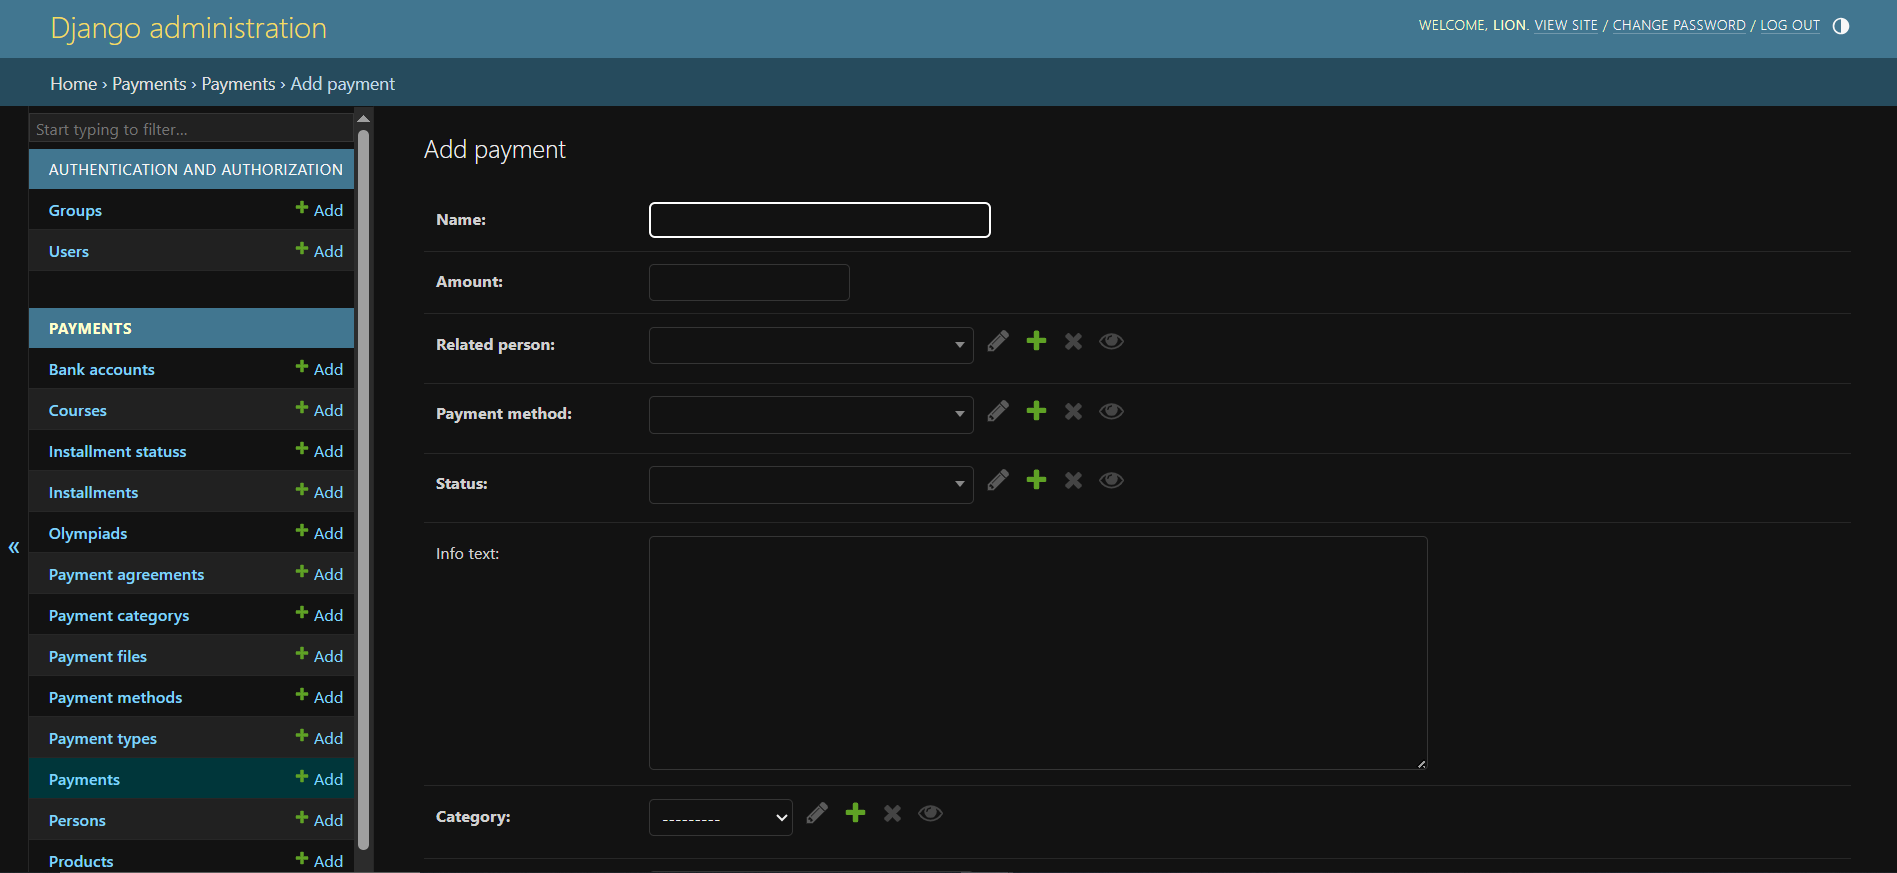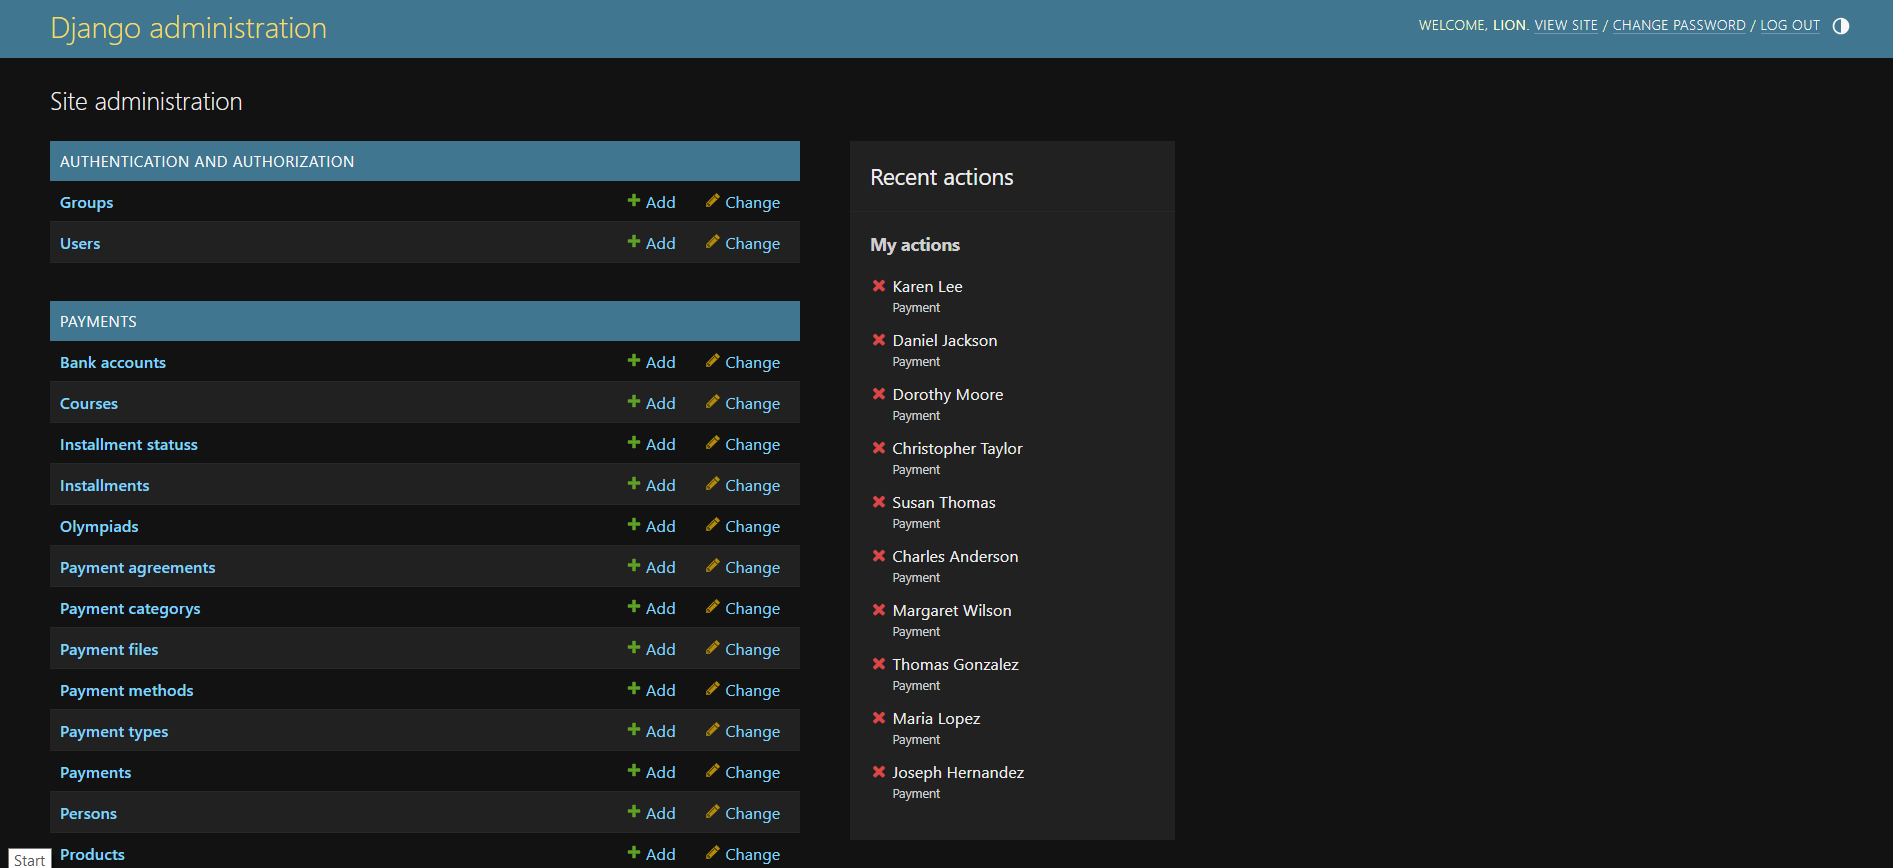

### 4.3 The Business Logic (`views.py`)

The `views.py` file is the brain of the application, containing the logic that handles web requests and returns responses. The views are neatly organized into two distinct categories:

* **Page-Rendering Views**: Functions like `dashboard_view` and `payment_list` are responsible for rendering the initial HTML pages. They perform minimal data handling and primarily serve as the entry point for the user to see a page.

* **API Views**: Most of the dynamic functionality is powered by API views, which are prefixed with `api_`. For example, `api_payments` fetches all payment records, converts them to a list of dictionaries using `.values()`, and returns the data as a JSON response. The JavaScript on the frontend then consumes this JSON to build the interactive tables.

* **Security**: Nearly every view is protected by the `@login_required` and `@user_passes_test(is_staff_or_superuser)` decorators. This ensures that only authenticated staff members can access the application's data, which is a critical security practice.

---

### 4.4 URL Routing (`payments/urls.py`)

The `urls.py` file acts as the table of contents for the `payments` application. It contains a list called `urlpatterns` that maps specific URL paths to their corresponding view functions from `views.py`.

* **URL Naming**: Each path is given a unique `name` (e.g., `name='payment_list'`). This is a Django best practice that allows us to refer to URLs by name in our templates (e.g., `{% url 'payment_list' %}`), rather than hardcoding the URL path. This makes the application easier to maintain.
* **Parameterized URLs**: URLs for detail pages, like `path('payment-detail/<int:payment_id>/', ...)` are designed to capture a value from the URL (in this case, an integer `payment_id`) and pass it as an argument to the view function.

---

### 4.5 The Presentation Layer (`templates/`)

The HTML files define the application's user interface. They use a combination of Django's template language for initial rendering and extensive client-side JavaScript for dynamic functionality.

* **The Dashboard (`dashboard.html`)**: This is the most complex template. Its JavaScript fetches data from the `/api/payments/` endpoint and uses the **Chart.js library** to render the line and pie charts. It also implements the filterable list of recent actions, providing a comprehensive visual summary of the application's data.

* **The List Page Pattern (`payment_list.html`, etc.)**: All list pages follow a consistent, powerful pattern. The JavaScript in each file:
    1.  Fetches the full dataset from its corresponding API endpoint (e.g., `/api/students/`).
    2.  Implements client-side logic for **searching, sorting, and pagination**, meaning the UI is fast and responsive without needing to reload the page.
    3.  Handles the "edit mode" for selecting rows and displaying a summary of selected items.

* **The Detail Page Pattern (`payment_detail.html`, etc.)**: These pages are simpler. They primarily display the detailed information for a single item, along with tables of related data, which is passed directly from the Django view during the initial page load.

---

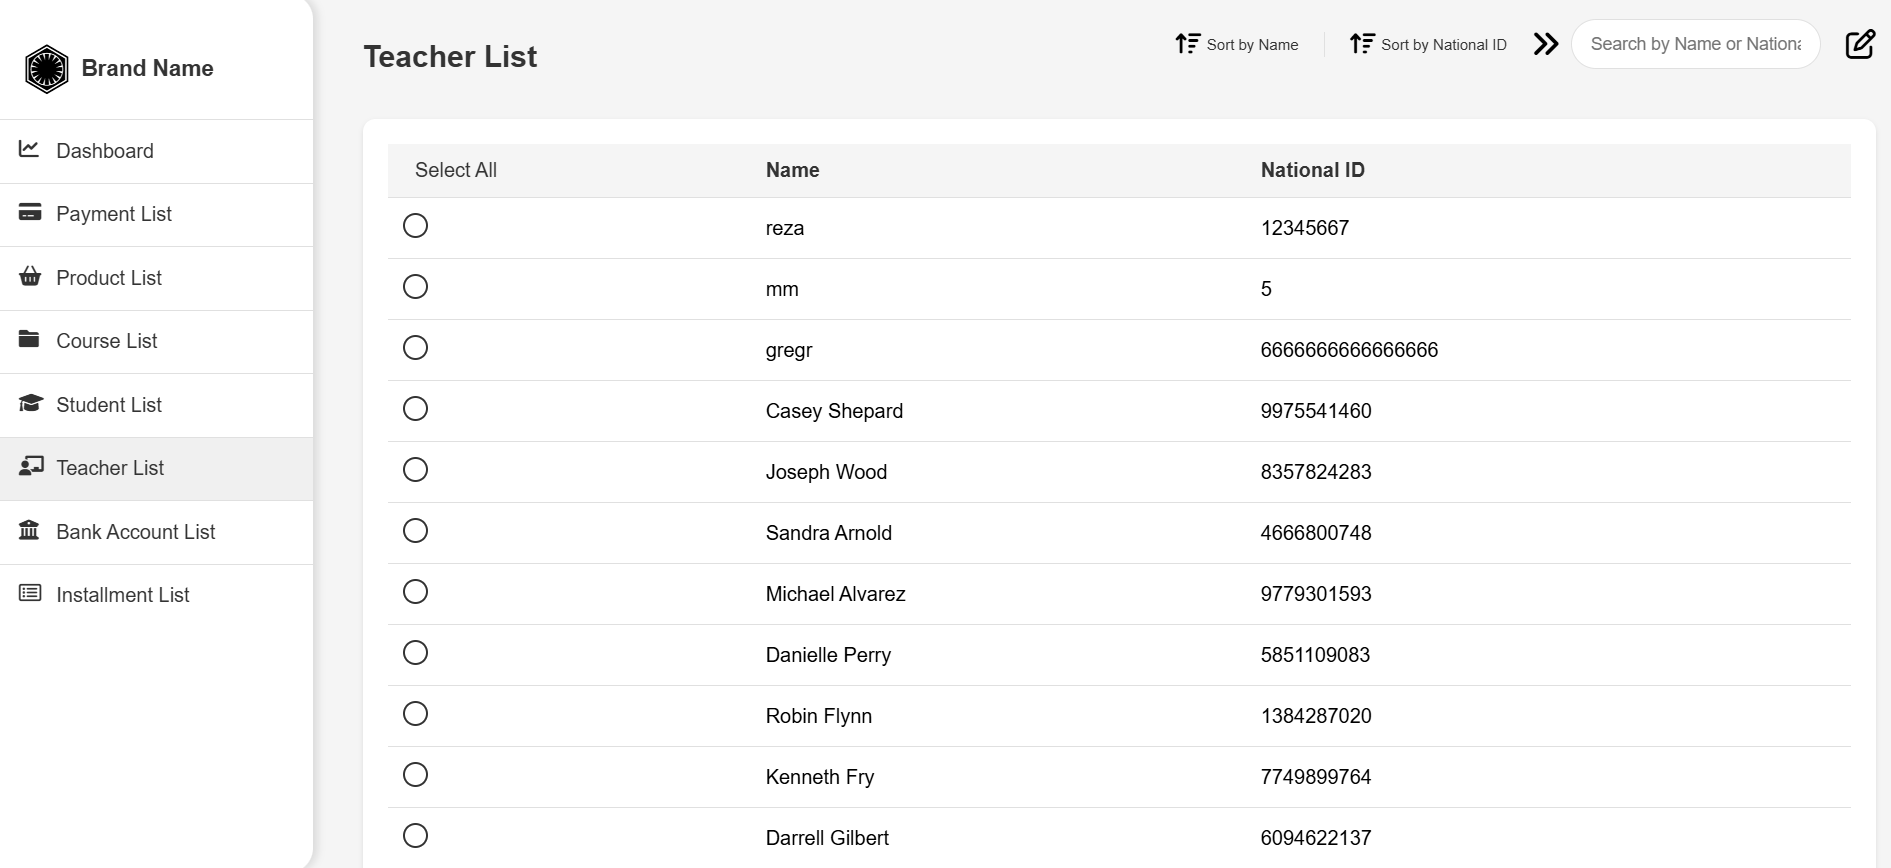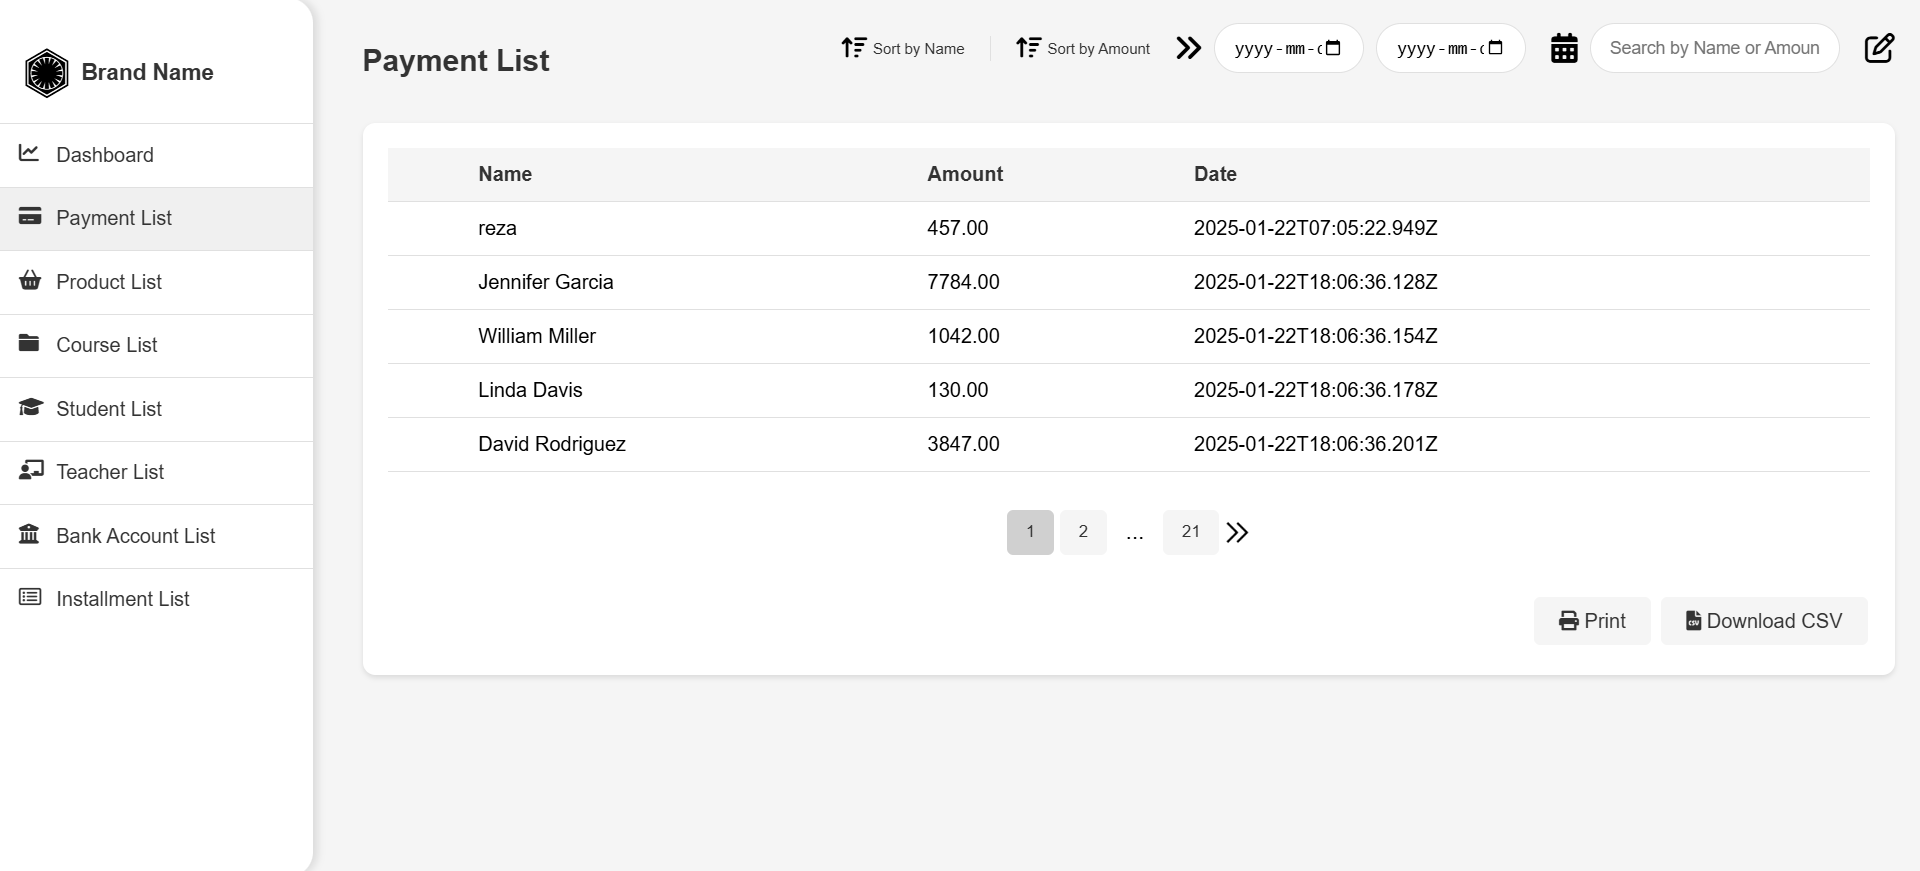

## Part 5: 🚀 Bringing the Application to Life

With all the code and templates in place, we're ready for the final step: launching the application. This involves initializing our database and starting the web server.

---

### 5.1 Initializing the Database

Before we can run the project, we need to create the database tables that correspond to our models. Django handles this with a powerful migration system.

* **`makemigrations`**: This command analyzes the models defined in `models.py` and creates a set of "instruction" files for how to build the database schema.
* **`migrate`**: This command reads those instruction files and executes them, building all the necessary tables in our `db.sqlite3` file.

Let's run these commands now.

---

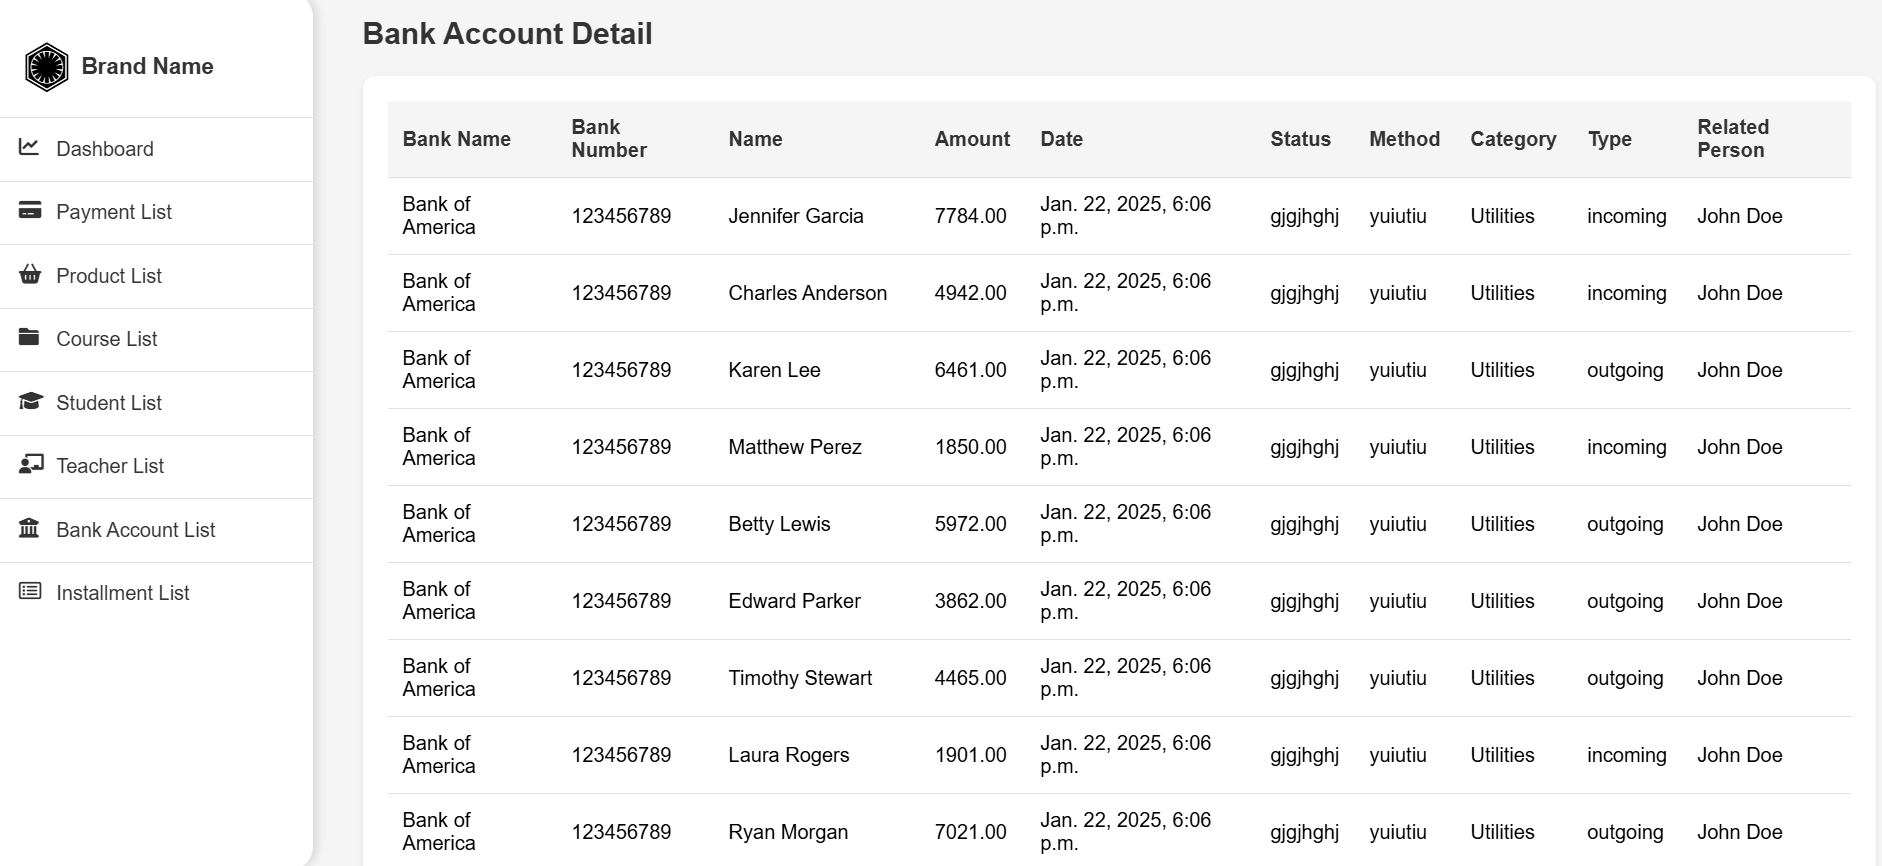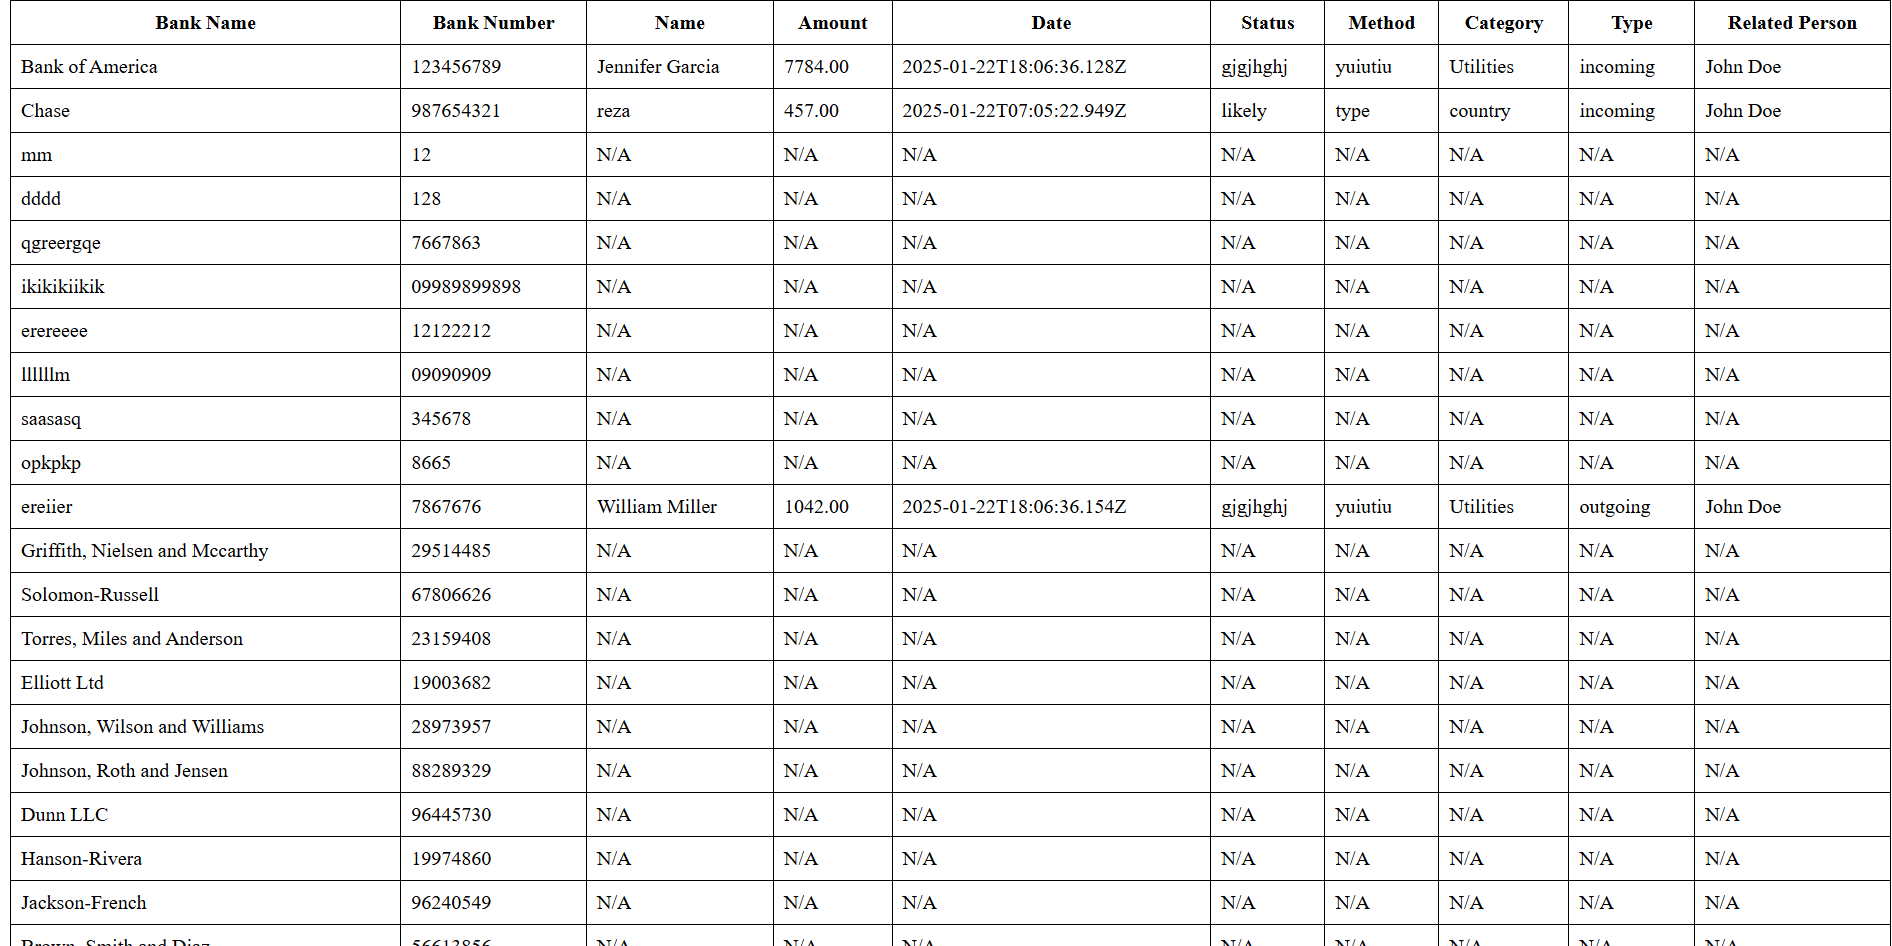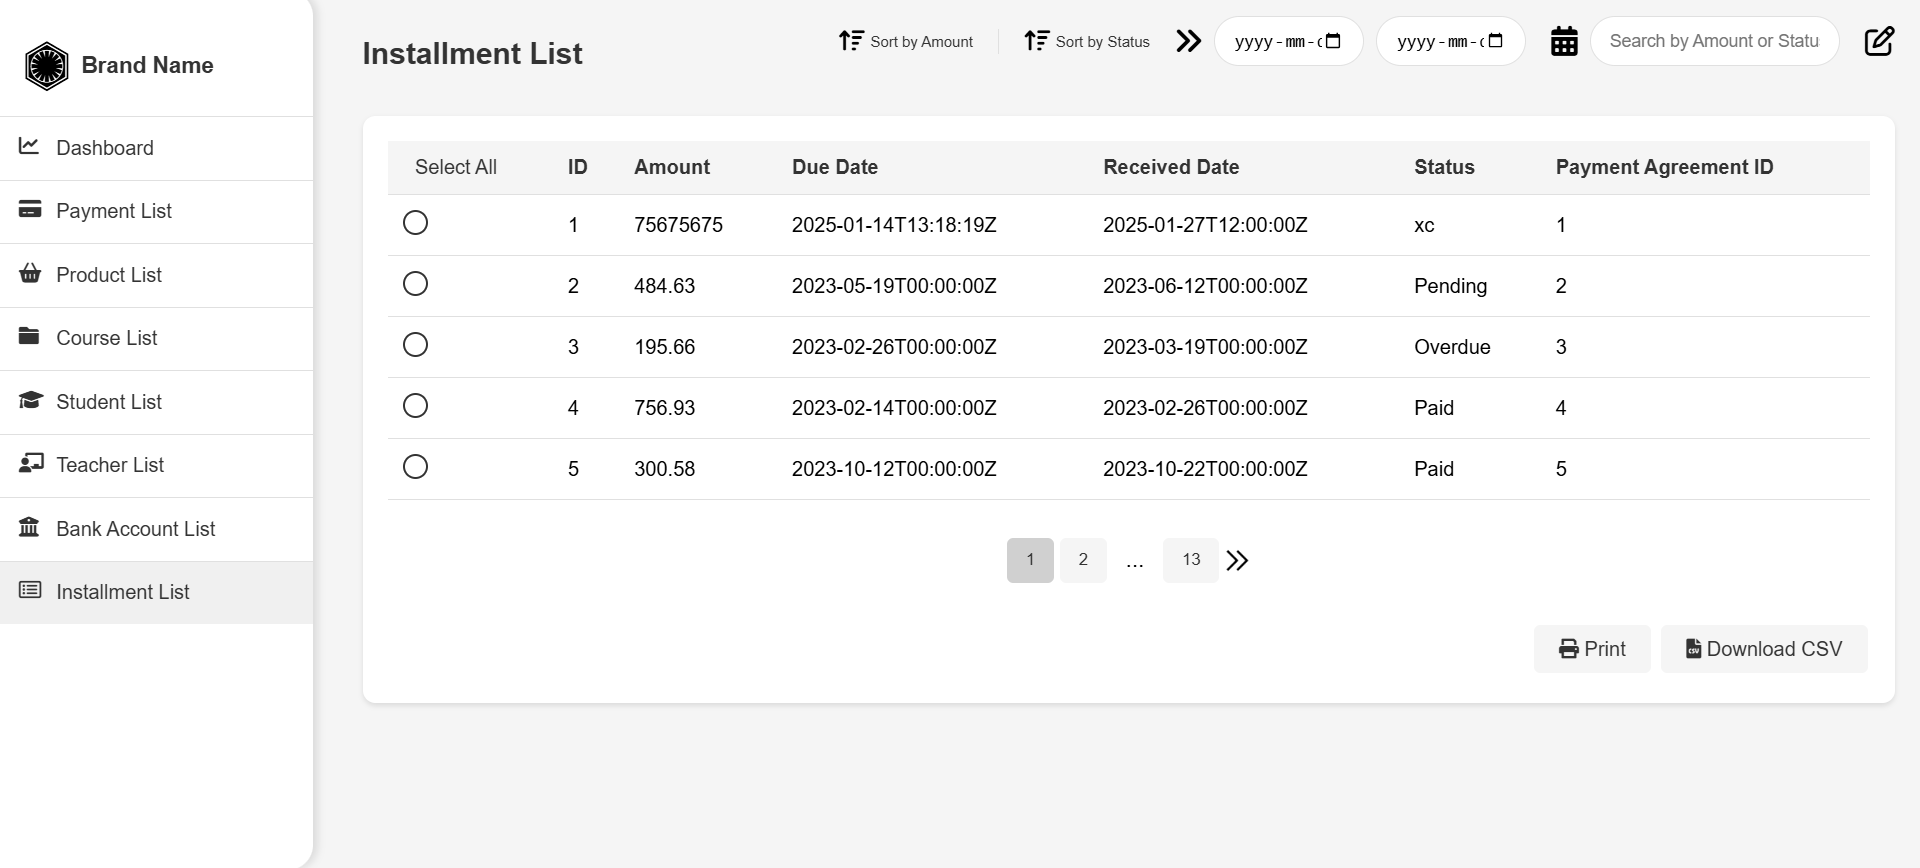

In [ ]:
!python manage.py makemigrations payments
!python manage.py migrate

### 5.2 Creating a Superuser

The application is secured and requires a staff account to log in. We need to create an administrator account to access both the main dashboard and the Django admin panel.

The next cell will run the `createsuperuser` command. You will be prompted to enter a **username**, **email address**, and **password** for your admin account.

---

In [ ]:
!python manage.py createsuperuser

### 5.3 Launching the Server for a Live Demo

This is the final step. We will now run the Django development server. Because we are in a Colab environment, we'll use a tool called `pyngrok` to create a secure tunnel to our server, making it accessible through a public URL.

**After you run the next cell, a URL will appear in the output. Click on it to open your live application in a new tab.**

---

In [ ]:
from pyngrok import ngrok
import os

# Terminate any existing tunnels to ensure a clean start
ngrok.kill()

# Set up the tunnel to our Django server on port 8000
public_url = ngrok.connect(8000)
print(f"🚀 Your Django application is live at: {public_url}")

# Run the Django development server
os.system("python manage.py runserver 8000")

## Part 6: ✅ Conclusion & Next Steps

We have successfully reconstructed, analyzed, and launched a complete Django financial dashboard from scratch in this notebook.

**To recap, we have:**
* Set up a complete Python environment with all necessary dependencies.
* Programmatically built the entire project's file and directory structure.
* Analyzed the project's architecture, from the database `models` and business logic in the `views` to the API-driven JavaScript `templates`.
* Launched the application for a live demonstration.

### Future Improvements

This project provides a fantastic foundation. For a production-ready application, the next steps would be:

1.  **Implement a Test Suite**: The project currently lacks tests. The top priority would be to write unit tests for the models and views to ensure the application is robust and reliable.
2.  **Refactor the Frontend**: The inline JavaScript and CSS in the templates could be moved to separate static files. For more complex features, migrating the frontend to a dedicated JavaScript framework like React or Vue would improve scalability and maintainability.
3.  **Enhance Features**: Build upon the existing features by adding more detailed financial reports, creating different user roles with specific permissions, or expanding the dashboard with more advanced data visualizations.

Thank you for following along with this deep dive!

---